<a href="https://colab.research.google.com/github/Ben-Judas/Capstone-s-Project/blob/main/Project_Test_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Factors explaining the intention to use a modern contraceptive Method**

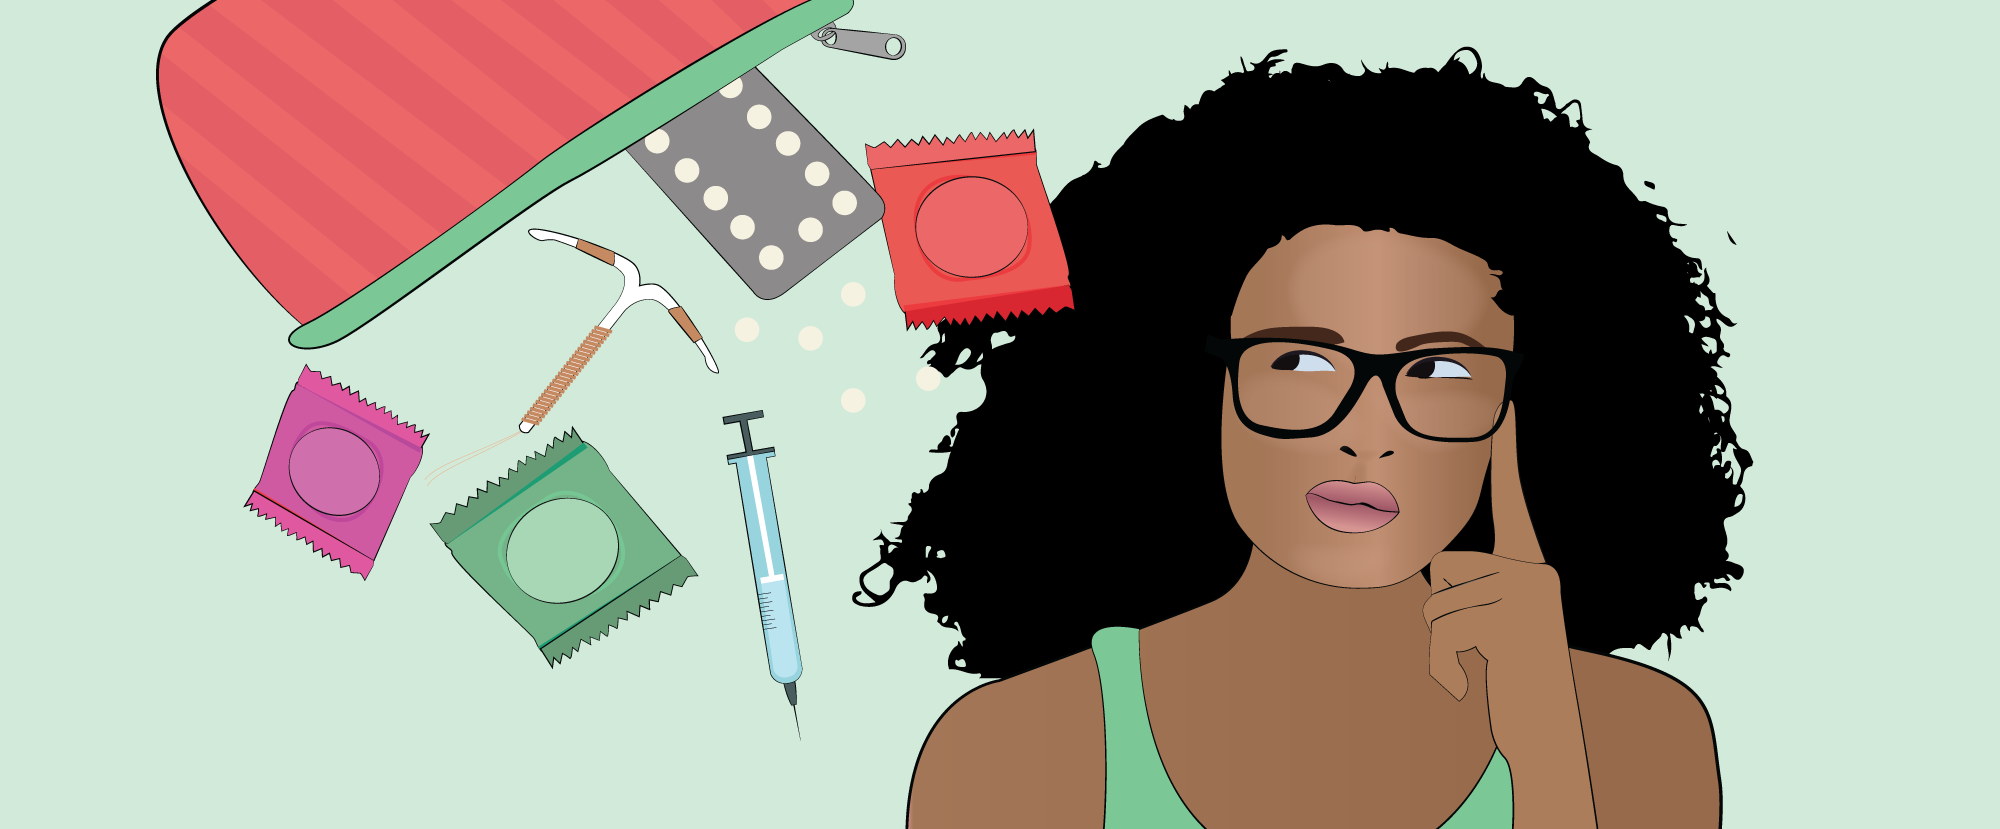

# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

**To highlight the determinants of modern contraceptive practice among married women who were not pregnant during 2016-2017**

**To identify the determinants of modern contraceptive practice among married women who are not pregnant during the period 2016-2017. The project starts from the observation that the contraceptive demand is unsatisfactory with a low satisfaction rate of 72%, exacerbated by the lack of access to health care. In particular, the proportion of women in union using contraception has increased from 22% in 2000 to 32% in 2016. Despite all this, Haiti remains the country with the highest level of unmet need for family planning and the lowest use of modern contraception in the Latin America and Caribbean region. For personal reasons, this project targets married women who were not expecting children at the time of the survey. In fact, only 35% of currently married women use any method, and of these, 31% use a modern method**.

# Hypothesis: Research Question ?
 What is the question that you would like to answer in order to make a decision.

**My project aims to question married women's choice to use modern contraceptive methods. In other words, does any socio-economic characteristics of the household influence the choice of women using modern contraceptive methods ?**

# Data Explication
**1878 0bservations and 24 variables has been choosen for in this process**


**The features variables are :**

* Region :


* Type_of_place_of_residence:



* Highest_educational_level:



* Religion:



* Wealth_index_combined:


* Knowledge_of_ovulatory_cycle:


* Current_contraceptive_method:


* Current_use_by_method_type:


* At_health_facility_told_of_family_planning:

* Contraception_is_woman_s_business_man_should_not_worry:


* Women_who_use_contraception_become_promiscuous:


 * Husband_partner_s_occupation:


 * Respondent_currently_working:


 * Respondent_earns_more_than_husband_partner:


 * Total_lifetime_number_of_sex_partners:


 * Years_since_first_cohabitation:


 * Age_at_first_cohabitation:


 * Number_of_living_children:


 * Age_of_respondent_at_1st_birth:


 * Husband_partner_s_age:


 * Respondent_s_current_age:


 * Number_of_household_members:


 * Number_of_children_5_and_under_in_household:


**The target variable is :**
 *  **Unmet need for contraception** :

 
 In terms of analysis, the objective is to verify the following hypotheses: The married woman’s choice of a modern contraceptive method (MCM) is characterized by:

* The educational level (+)
* Number of children (+)
* Number of partners (+)
* Woman's age (-)
* Husband's age (-)
* Professional activity (-)
* Sexual activity (+)
* Religion (Ca)
* Number of household members (+)
* Perception about contraception (+)
* Fertility preference (-)




# I. PACKAGES

In [ ]:
# for data analysis
import pandas as pd
# vector manipulation
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# import colorama
#from colorama import Fore

# statistic stest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import folium as f
import plotly as pl

# data modeling
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# data modeling II
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# python parameters
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')

# II. DATA CLEANING

## 1. LOAD DATA

In [ ]:
df = pd.read_excel("myproject.xlsx")

In [ ]:
# display fisrt five rows
df.head()

,Respondent's age,Age in 5-year groups,Region,Place of residence,Highest educational level,Religion,Number of household members,Number of children 5 and under in household,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Knowledge of ovulatory cycle,Number of living children,Total children ever born,Age of most recent child,Current contraceptive method,Method type,Contraceptive use and intention,Visited health facility last 12 months,"At health facility, told of family planning",On radio heard about Family Planning,On TV saw about Family Planning,Discussed Family Planning with health worker,Contraception is woman's business,Women who use contraception become promiscuous,Covered by health insurance,More than once unions,Age at first cohabitation,Years since first cohabitation,Age at first sex,Sexual activity,Fertility preference,Husband's desire for children,Raison for contraception,Husband/partner's education level,Husband/partner's occupation,Respondent's occupation,Husband/partner's age,Health care's decision-maker,Lifetime sex partners
0,31,30-34,Sud,Rural,Primary,Catholic,4,2,Middle,3,19.00,After period ended,3,3,1.00,Not using,No method,Non-user - intends to use later,Yes,No,No,No,No,Disagree,Disagree,No,0,27,4,15,1,No more,Husband wants more,Limiting,Primary,Professional/technical/managerial,Sales,31,Husband/partner alone,2
1,38,35-39,Sud,Rural,Higher,Catholic,5,1,Middle,1,31.00,Middle of the cycle,2,3,3.00,Injections,Modern method,Using modern method,Yes,No,Yes,No,No,Agree,Disagree,No,0,29,8,18,1,No more,Both want same,Limiting,Higher,Professional/technical/managerial,Professional/technical/managerial,39,Respondent and husband/partner,2
2,38,35-39,Sud,Rural,Secondary,Protestant,6,1,Middle,1,28.00,After period ended,4,4,1.00,Injections,Modern method,Using modern method,Yes,No,Yes,No,Yes,Disagree,Disagree,No,0,28,10,24,1,No more,Both want same,Limiting,Secondary,Professional/technical/managerial,Not working,36,Husband/partner alone,2
3,35,35-39,Sud,Rural,Secondary,Catholic,6,0,Middle,0,23.00,After period ended,2,4,7.00,Injections,Modern method,Using modern method,Yes,No,No,No,No,Disagree,Disagree,No,0,22,12,18,1,Have another,Husband wants more,Spacing,Secondary,Skilled manual,Sales,42,Husband/partner alone,2
4,37,35-39,Sud,Rural,Secondary,Catholic,7,1,Poorer,1,18.00,After period ended,5,5,3.00,Injections,Modern method,Using modern method,No,No,No,No,Yes,Agree,Agree,No,0,18,19,17,1,No more,Husband wants more,Limiting,No education,Agricultural - self employed,Sales,53,Respondent and husband/partner,2


In [ ]:
# transform variable name with separators '_'
df.columns = [column.replace(" ", "_").replace("/", "_").replace("'", "_").replace(",", "") for column in df.columns]
df.columns


Index(['Respondent_s_age', 'Age_in_5-year_groups', 'Region', 'Place_of_residence', 'Highest_educational_level', 'Religion',
       'Number_of_household_members', 'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Births_in_last_five_years',
       'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle', 'Number_of_living_children', 'Total_children_ever_born',
       'Age_of_most_recent_child', 'Current_contraceptive_method', 'Method_type', 'Contraceptive_use_and_intention',
       'Visited_health_facility_last_12_months', 'At_health_facility_told_of_family_planning', 'On_radio_heard_about_Family_Planning',
       'On_TV_saw_about_Family_Planning_', 'Discussed_Family_Planning_with_health_worker_', 'Contraception_is_woman_s_business',
       'Women_who_use_contraception_become_promiscuous', 'Covered_by_health_insurance', 'More_than_once_unions', 'Age_at_first_cohabitation',
       'Years_since_first_cohabitation', 'Age_at_first_sex', 'Sexual_activity', 'Fer

In [ ]:
# how they appear
df.head()

,Respondent_s_age,Age_in_5-year_groups,Region,Place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Number_of_living_children,Total_children_ever_born,Age_of_most_recent_child,Current_contraceptive_method,Method_type,Contraceptive_use_and_intention,Visited_health_facility_last_12_months,At_health_facility_told_of_family_planning,On_radio_heard_about_Family_Planning,On_TV_saw_about_Family_Planning_,Discussed_Family_Planning_with_health_worker_,Contraception_is_woman_s_business,Women_who_use_contraception_become_promiscuous,Covered_by_health_insurance,More_than_once_unions,Age_at_first_cohabitation,Years_since_first_cohabitation,Age_at_first_sex,Sexual_activity,Fertility_preference,Husband_s_desire_for_children,Raison_for_contraception,Husband_partner_s_education_level,Husband_partner_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Health_care_s_decision-maker,Lifetime_sex_partners
0,31,30-34,Sud,Rural,Primary,Catholic,4,2,Middle,3,19.00,After period ended,3,3,1.00,Not using,No method,Non-user - intends to use later,Yes,No,No,No,No,Disagree,Disagree,No,0,27,4,15,1,No more,Husband wants more,Limiting,Primary,Professional/technical/managerial,Sales,31,Husband/partner alone,2
1,38,35-39,Sud,Rural,Higher,Catholic,5,1,Middle,1,31.00,Middle of the cycle,2,3,3.00,Injections,Modern method,Using modern method,Yes,No,Yes,No,No,Agree,Disagree,No,0,29,8,18,1,No more,Both want same,Limiting,Higher,Professional/technical/managerial,Professional/technical/managerial,39,Respondent and husband/partner,2
2,38,35-39,Sud,Rural,Secondary,Protestant,6,1,Middle,1,28.00,After period ended,4,4,1.00,Injections,Modern method,Using modern method,Yes,No,Yes,No,Yes,Disagree,Disagree,No,0,28,10,24,1,No more,Both want same,Limiting,Secondary,Professional/technical/managerial,Not working,36,Husband/partner alone,2
3,35,35-39,Sud,Rural,Secondary,Catholic,6,0,Middle,0,23.00,After period ended,2,4,7.00,Injections,Modern method,Using modern method,Yes,No,No,No,No,Disagree,Disagree,No,0,22,12,18,1,Have another,Husband wants more,Spacing,Secondary,Skilled manual,Sales,42,Husband/partner alone,2
4,37,35-39,Sud,Rural,Secondary,Catholic,7,1,Poorer,1,18.00,After period ended,5,5,3.00,Injections,Modern method,Using modern method,No,No,No,No,Yes,Agree,Agree,No,0,18,19,17,1,No more,Husband wants more,Limiting,No education,Agricultural - self employed,Sales,53,Respondent and husband/partner,2


In [ ]:
# some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Respondent_s_age                                3057 non-null   int64  
 1   Age_in_5-year_groups                            3057 non-null   object 
 2   Region                                          3057 non-null   object 
 3   Place_of_residence                              3057 non-null   object 
 4   Highest_educational_level                       3057 non-null   object 
 5   Religion                                        3057 non-null   object 
 6   Number_of_household_members                     3057 non-null   int64  
 7   Number_of_children_5_and_under_in_household     3057 non-null   int64  
 8   Wealth_index_combined                           3057 non-null   object 
 9   Births_in_last_five_years                

## **2. OVERVIEW**

In [ ]:
    ''' this function help us to show overview from the dataset'''
    
    def dataoveriew(df, message):
     print(f'{message}:\n')
     print('Number of observations: ', df.shape[0])
     print("\nNumber of features:", df.shape[1])
     print("\nData Features:")
     print("\nMissing values:", df.isnull().sum().values.sum())
     print("\nUnique values:")
     print(df.nunique())

In [ ]:
# showing overview
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of observations:  3057

Number of features: 40

Data Features:

Missing values: 357

Unique values:
Respondent_s_age                35
Age_in_5-year_groups             7
Region                          10
Place_of_residence               2
Highest_educational_level        4
                                ..
Husband_partner_s_occupation     8
Respondent_s_occupation          8
Husband_partner_s_age           48
Health_care_s_decision-maker     4
Lifetime_sex_partners           13
Length: 40, dtype: int64


In [ ]:
# Check for duplicated columns
df[df.duplicated()].value_counts()

Series([], dtype: int64)

In [ ]:
# Let's see the data types
df.dtypes.value_counts()

object     25
int64      13
float64     2
dtype: int64

In [ ]:
# Display numeric variables
num_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]
num_cols

['Respondent_s_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Age_at_first_sex',
 'Sexual_activity',
 'Husband_partner_s_age',
 'Lifetime_sex_partners']

In [ ]:
# Show categoric variable
cat_cols = [col for col in df.columns if df[col].dtype=="object"]
cat_cols

['Age_in_5-year_groups',
 'Region',
 'Place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Knowledge_of_ovulatory_cycle',
 'Current_contraceptive_method',
 'Method_type',
 'Contraceptive_use_and_intention',
 'Visited_health_facility_last_12_months',
 'At_health_facility_told_of_family_planning',
 'On_radio_heard_about_Family_Planning',
 'On_TV_saw_about_Family_Planning_',
 'Discussed_Family_Planning_with_health_worker_',
 'Contraception_is_woman_s_business',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'Fertility_preference',
 'Husband_s_desire_for_children',
 'Raison_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation',
 'Health_care_s_decision-maker']

In [ ]:
# univariate Analysis
# Calculate absolute frequency and relative frequency for each cateorigal variabl

def prob_category(data,col="Col", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(13,10))
     return result

def generate_barchart(data=None, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,10)):
  
  """ Function who generate  a barchat for  cateorigal variable"""

  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  color ="black"
  for tot, perc in zip(data[abs_value],data[rel_value]):
    if tot/2 <= 50:
      tot=100
      color ="black"

    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color=color,fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

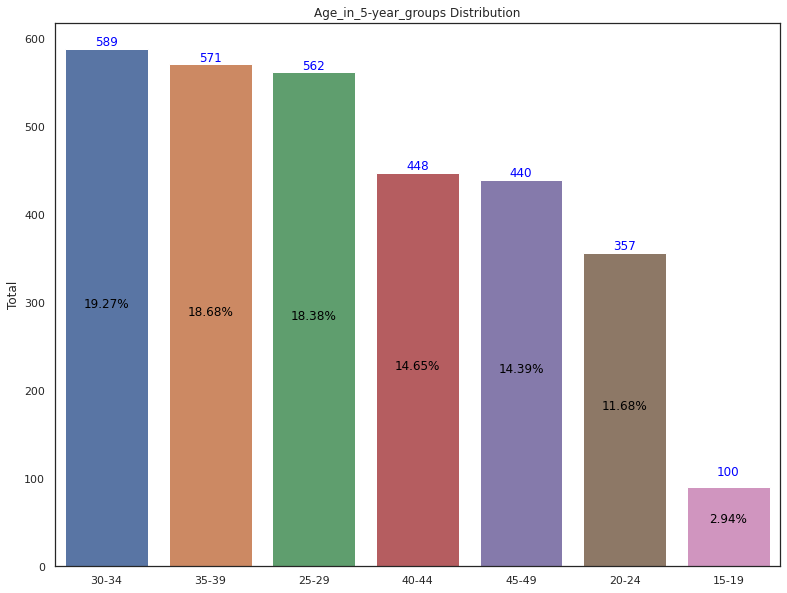

,Total,Percent
30-34,589,0.19
35-39,571,0.19
25-29,562,0.18
40-44,448,0.15
45-49,440,0.14
20-24,357,0.12
15-19,90,0.03


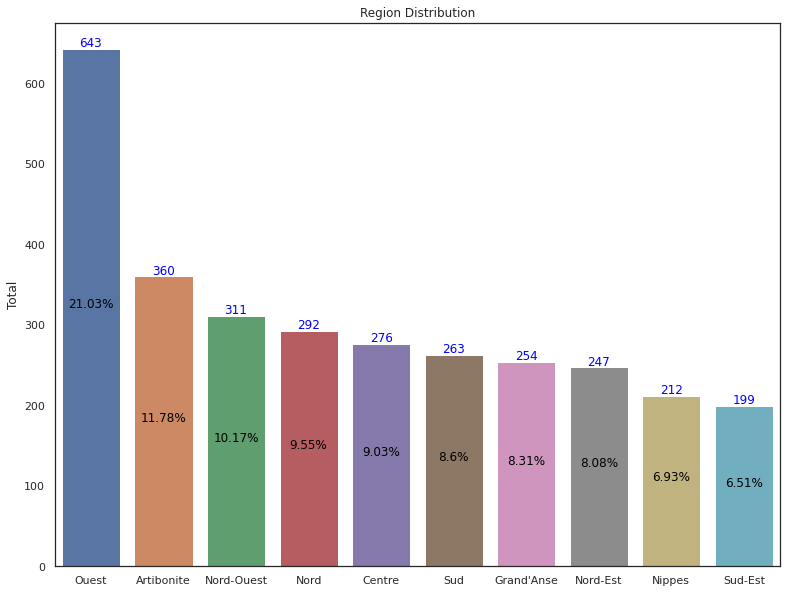

,Total,Percent
Ouest,643,0.21
Artibonite,360,0.12
Nord-Ouest,311,0.10
Nord,292,0.10
Centre,276,0.09
Sud,263,0.09
Grand'Anse,254,0.08
Nord-Est,247,0.08
Nippes,212,0.07
Sud-Est,199,0.07


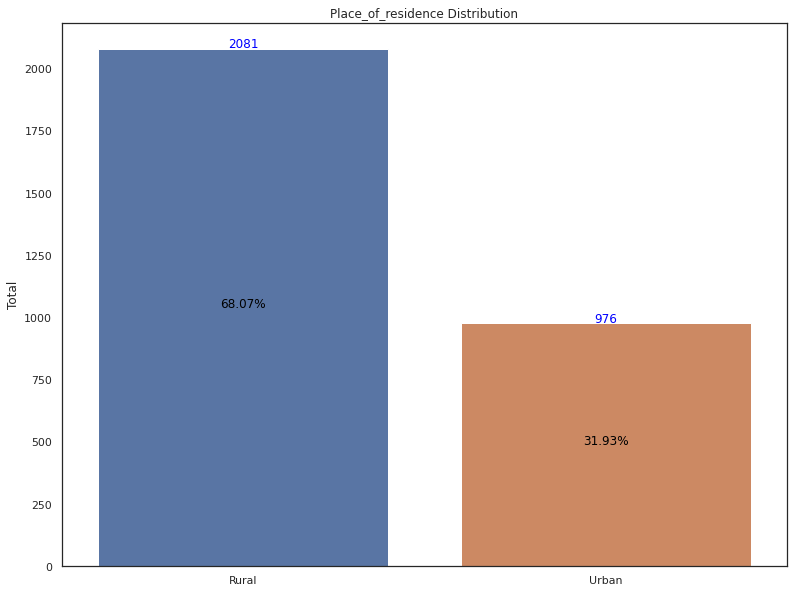

,Total,Percent
Rural,2081,0.68
Urban,976,0.32


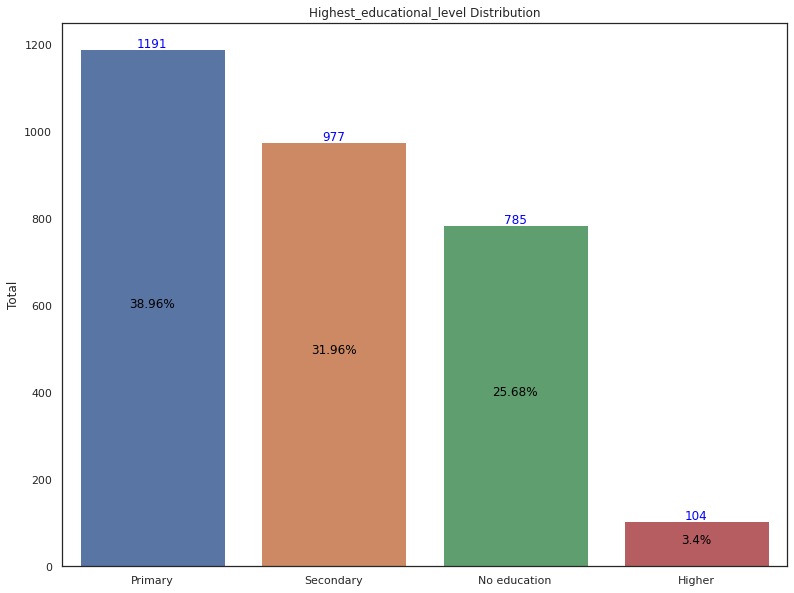

,Total,Percent
Primary,1191,0.39
Secondary,977,0.32
No education,785,0.26
Higher,104,0.03


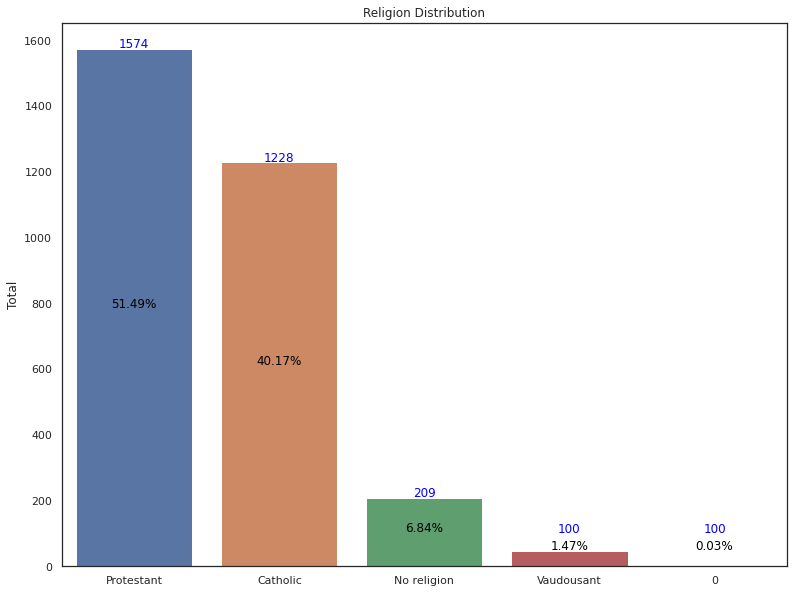

,Total,Percent
Protestant,1574,0.51
Catholic,1228,0.40
No religion,209,0.07
Vaudousant,45,0.01
0,1,0.00


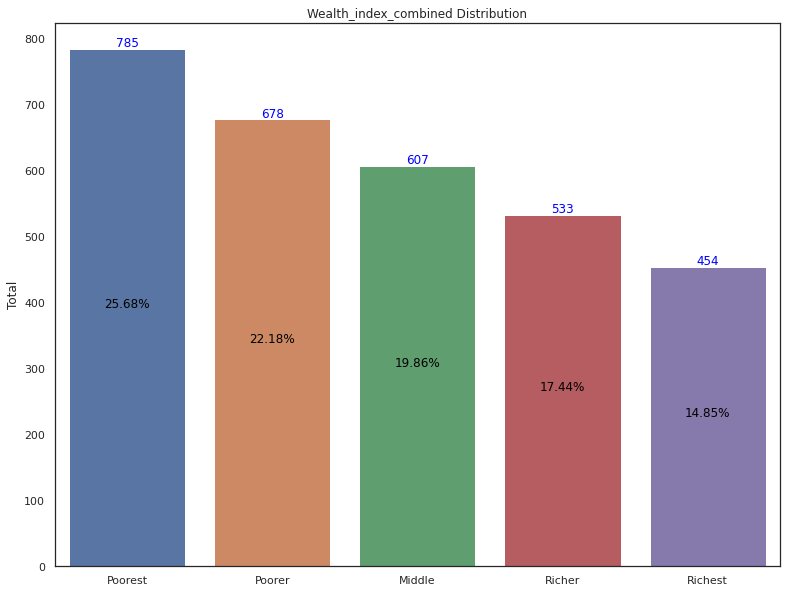

,Total,Percent
Poorest,785,0.26
Poorer,678,0.22
Middle,607,0.20
Richer,533,0.17
Richest,454,0.15


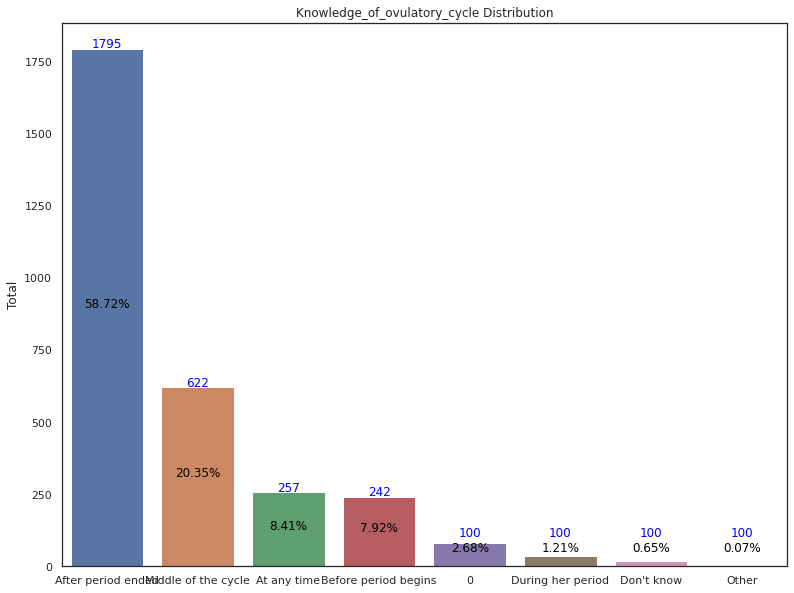

,Total,Percent
After period ended,1795,0.59
Middle of the cycle,622,0.20
At any time,257,0.08
Before period begins,242,0.08
0,82,0.03
During her period,37,0.01
Don't know,20,0.01
Other,2,0.00


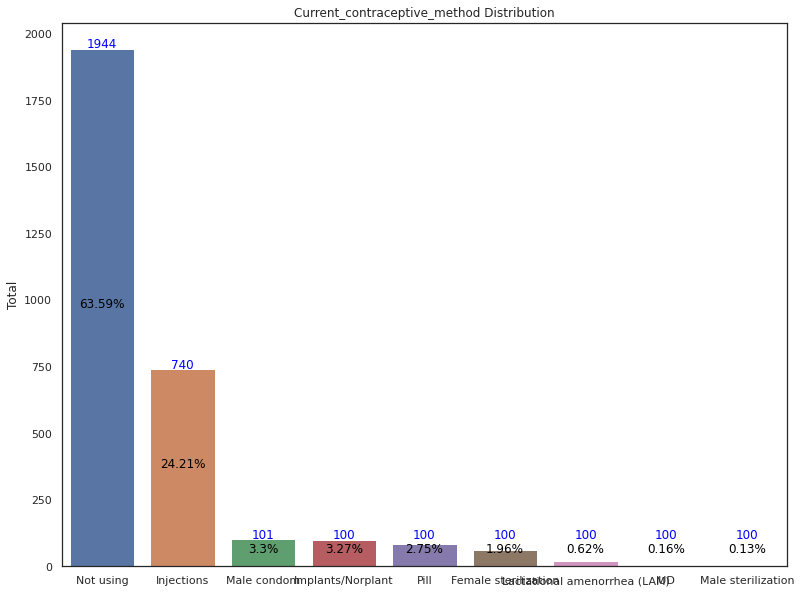

,Total,Percent
Not using,1944,0.64
Injections,740,0.24
Male condom,101,0.03
Implants/Norplant,100,0.03
Pill,84,0.03
Female sterilization,60,0.02
Lactational amenorrhea (LAM),19,0.01
IUD,5,0.00
Male sterilization,4,0.00


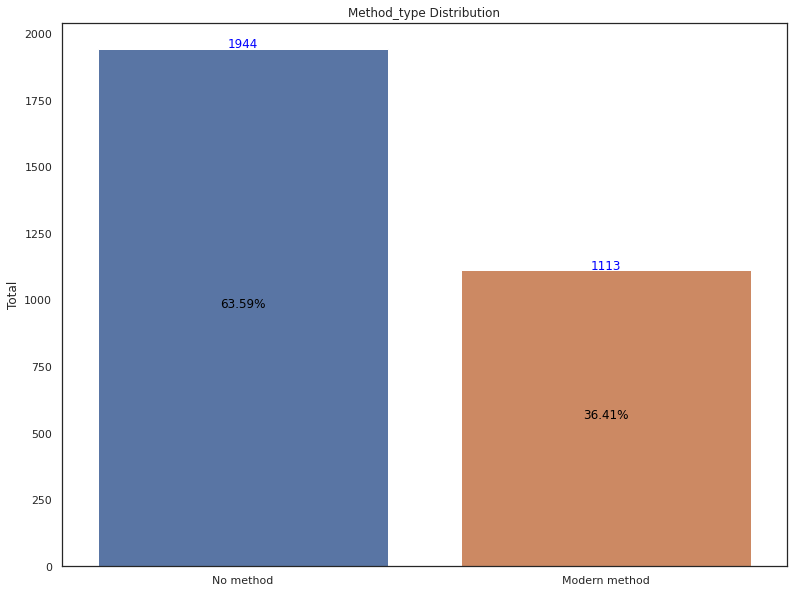

,Total,Percent
No method,1944,0.64
Modern method,1113,0.36


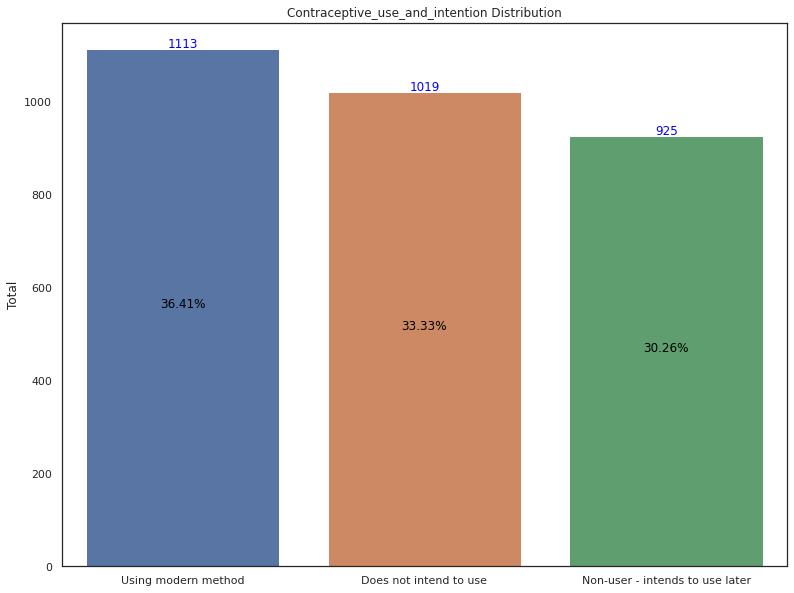

,Total,Percent
Using modern method,1113,0.36
Does not intend to use,1019,0.33
Non-user - intends to use later,925,0.30


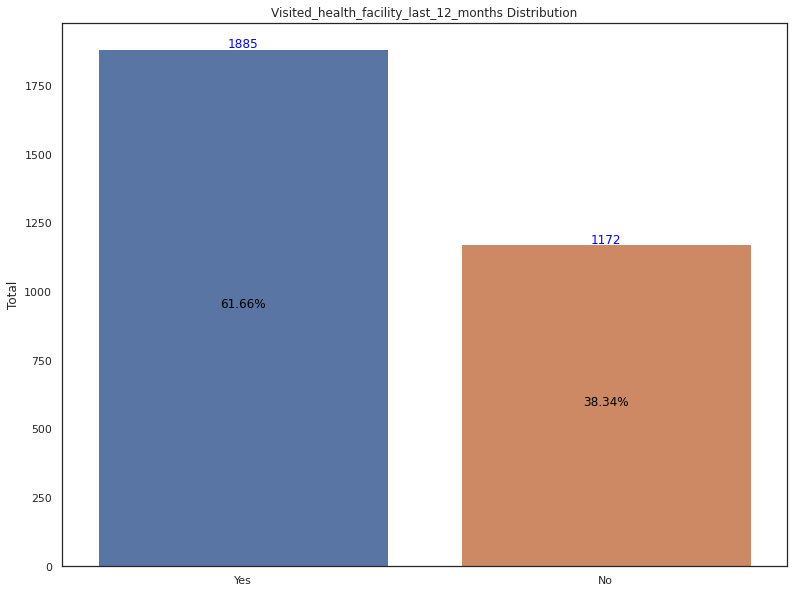

,Total,Percent
Yes,1885,0.62
No,1172,0.38


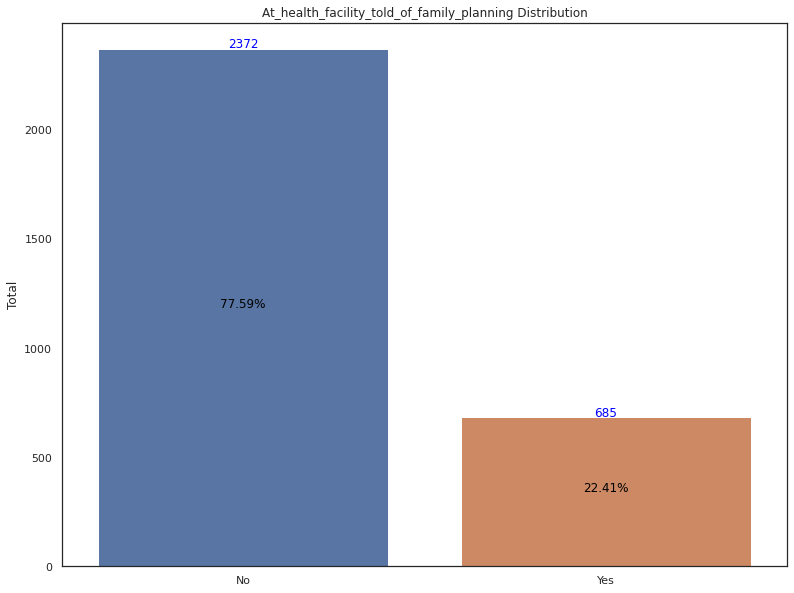

,Total,Percent
No,2372,0.78
Yes,685,0.22


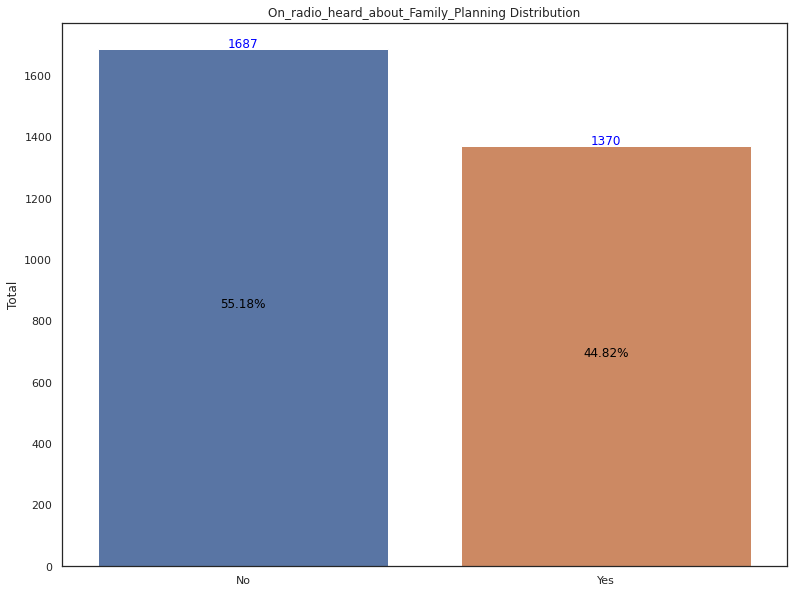

,Total,Percent
No,1687,0.55
Yes,1370,0.45


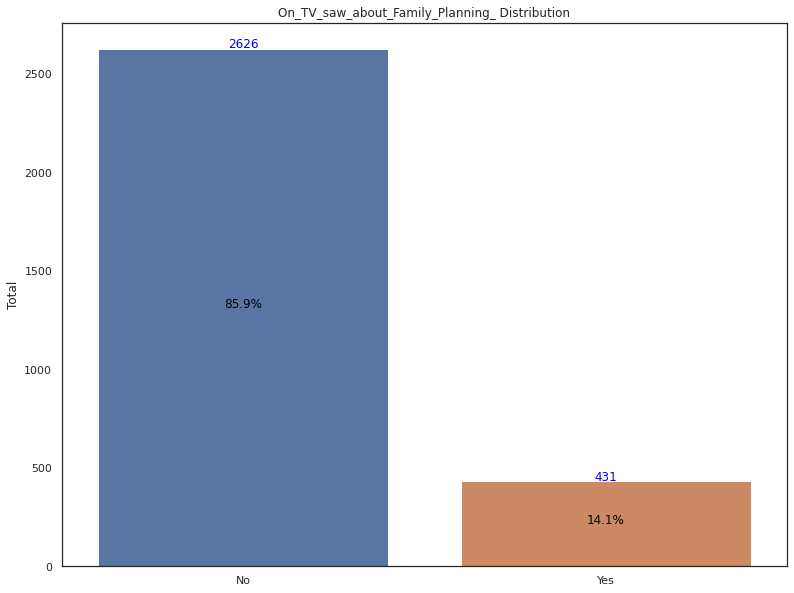

,Total,Percent
No,2626,0.86
Yes,431,0.14


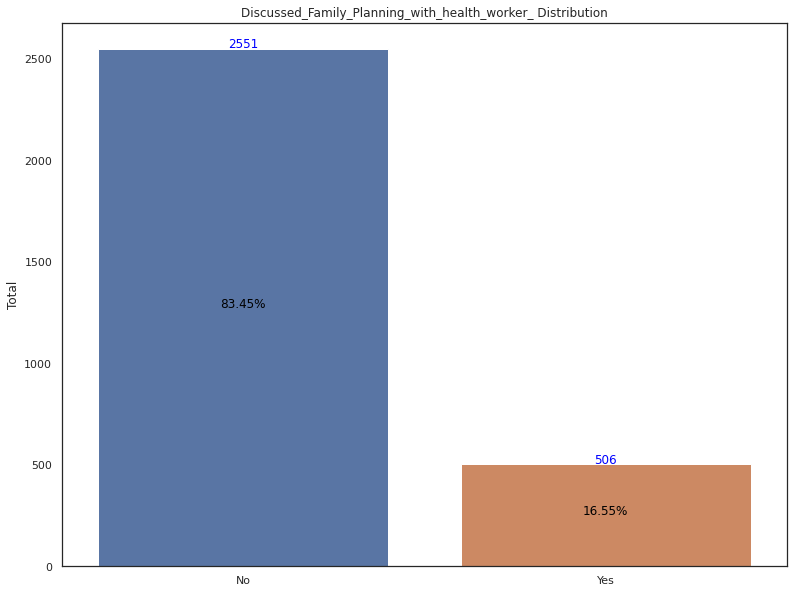

,Total,Percent
No,2551,0.83
Yes,506,0.17


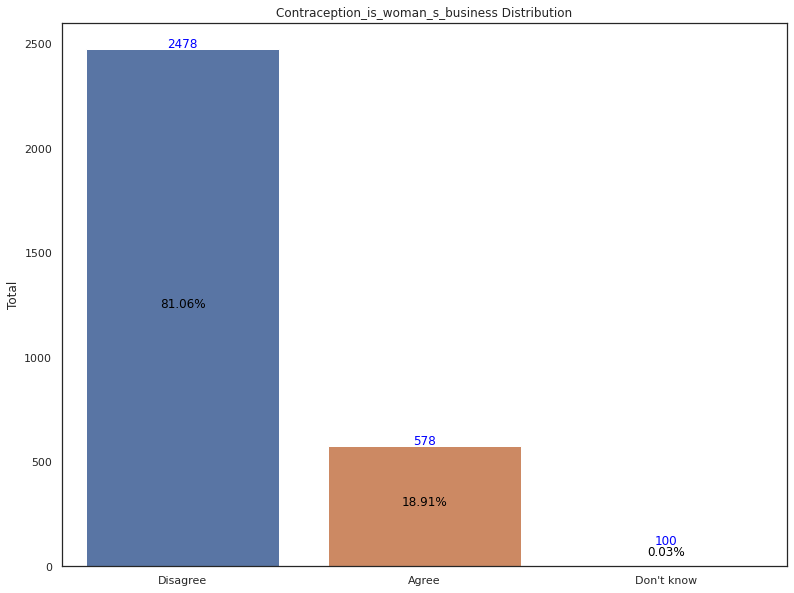

,Total,Percent
Disagree,2478,0.81
Agree,578,0.19
Don't know,1,0.00


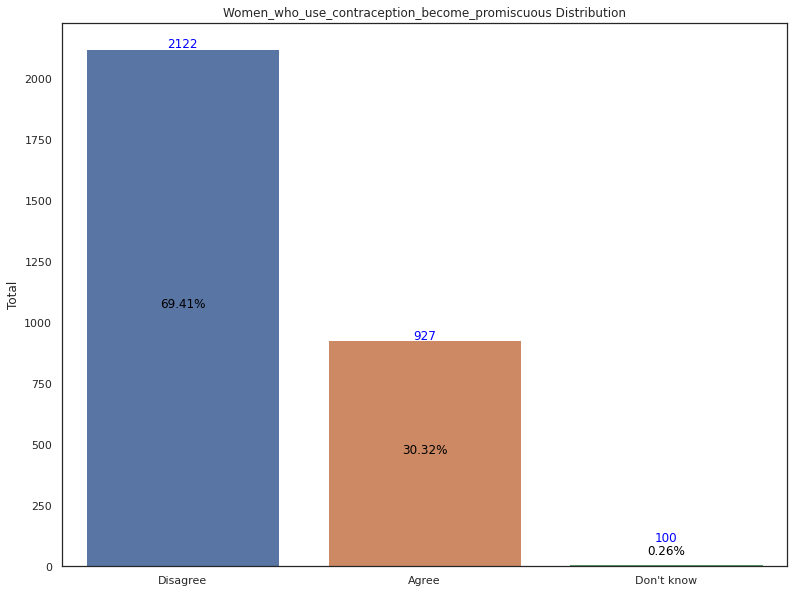

,Total,Percent
Disagree,2122,0.69
Agree,927,0.30
Don't know,8,0.00


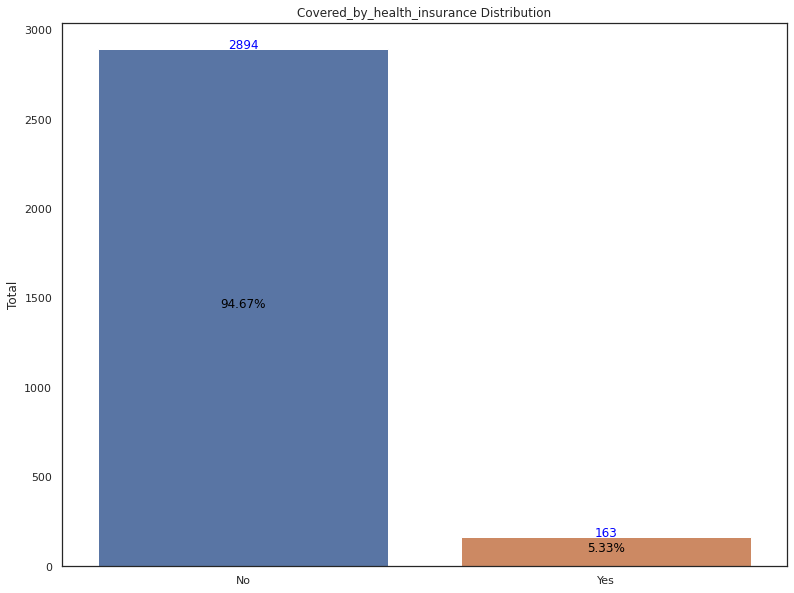

,Total,Percent
No,2894,0.95
Yes,163,0.05


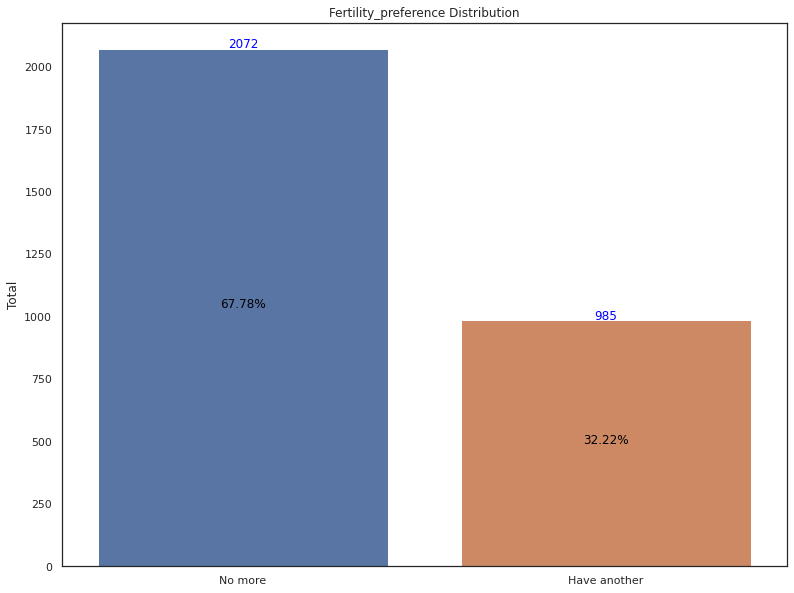

,Total,Percent
No more,2072,0.68
Have another,985,0.32


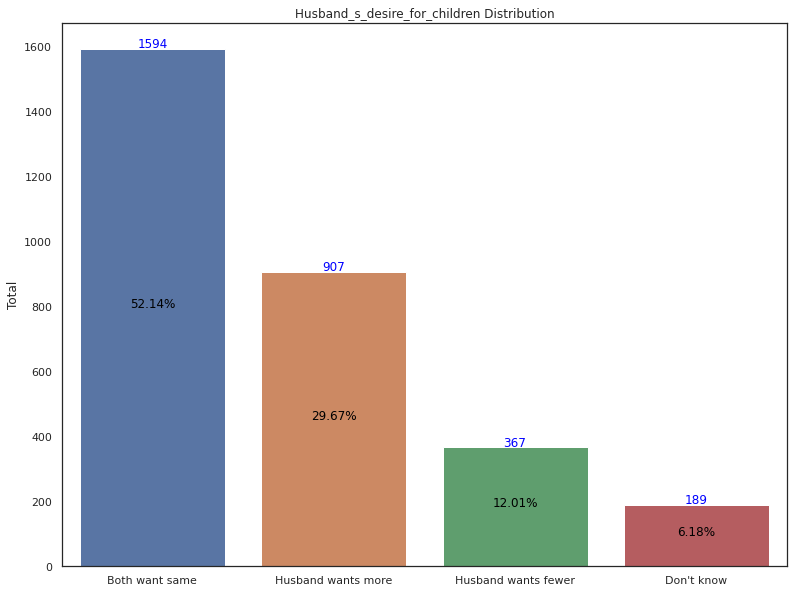

,Total,Percent
Both want same,1594,0.52
Husband wants more,907,0.30
Husband wants fewer,367,0.12
Don't know,189,0.06


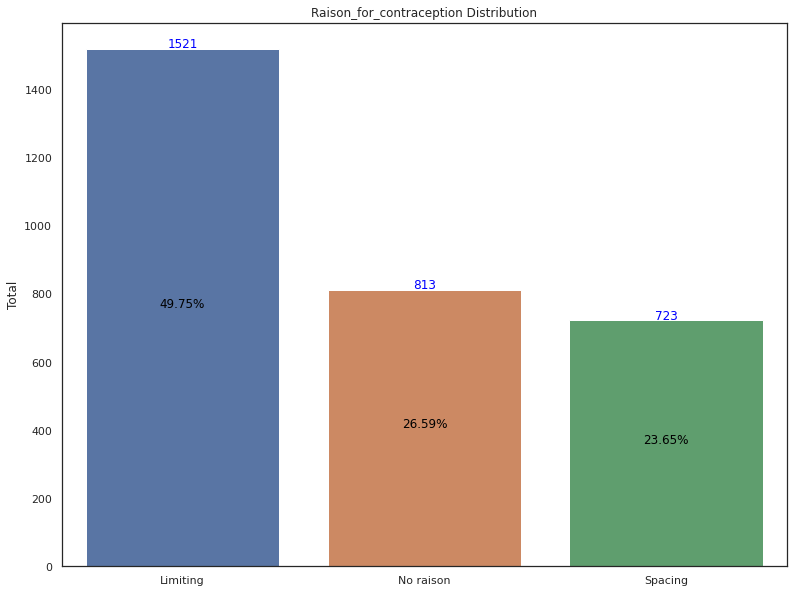

,Total,Percent
Limiting,1521,0.50
No raison,813,0.27
Spacing,723,0.24


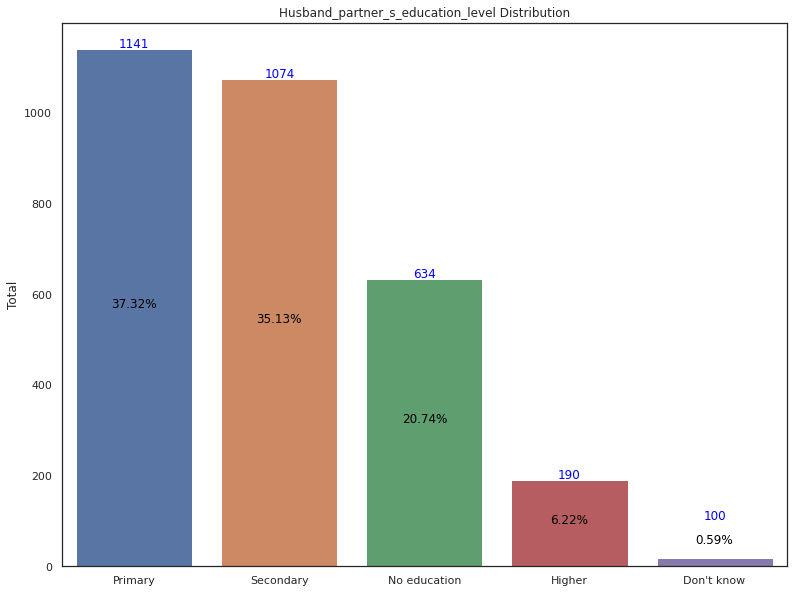

,Total,Percent
Primary,1141,0.37
Secondary,1074,0.35
No education,634,0.21
Higher,190,0.06
Don't know,18,0.01


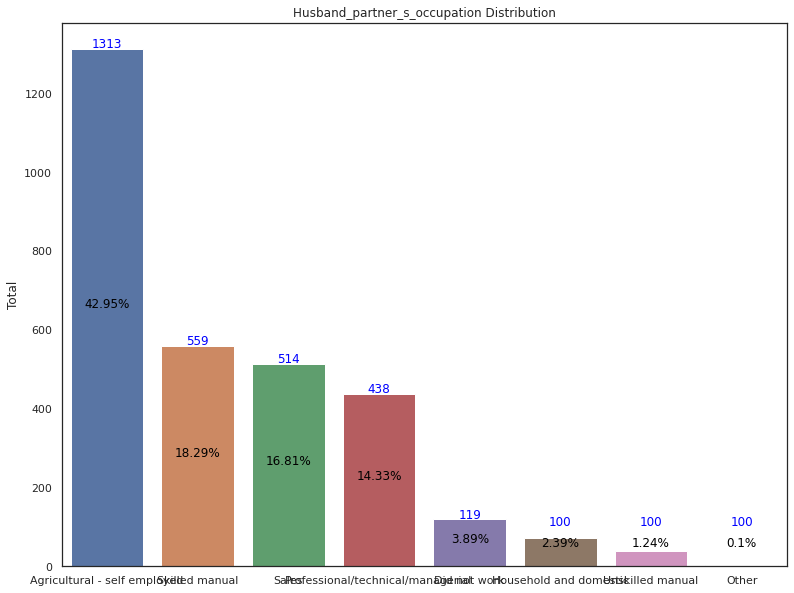

,Total,Percent
Agricultural - self employed,1313,0.43
Skilled manual,559,0.18
Sales,514,0.17
Professional/technical/managerial,438,0.14
Did not work,119,0.04
Household and domestic,73,0.02
Unskilled manual,38,0.01
Other,3,0.00


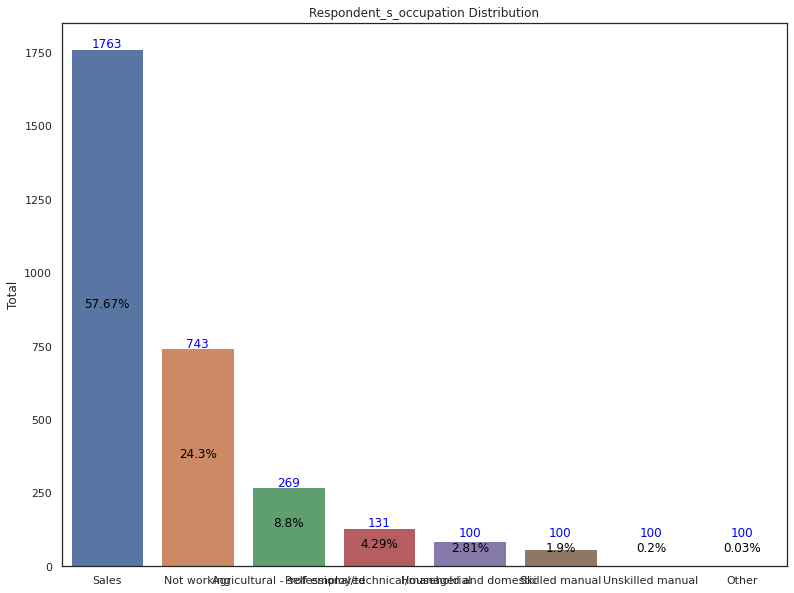

,Total,Percent
Sales,1763,0.58
Not working,743,0.24
Agricultural - self employed,269,0.09
Professional/technical/managerial,131,0.04
Household and domestic,86,0.03
Skilled manual,58,0.02
Unskilled manual,6,0.00
Other,1,0.00


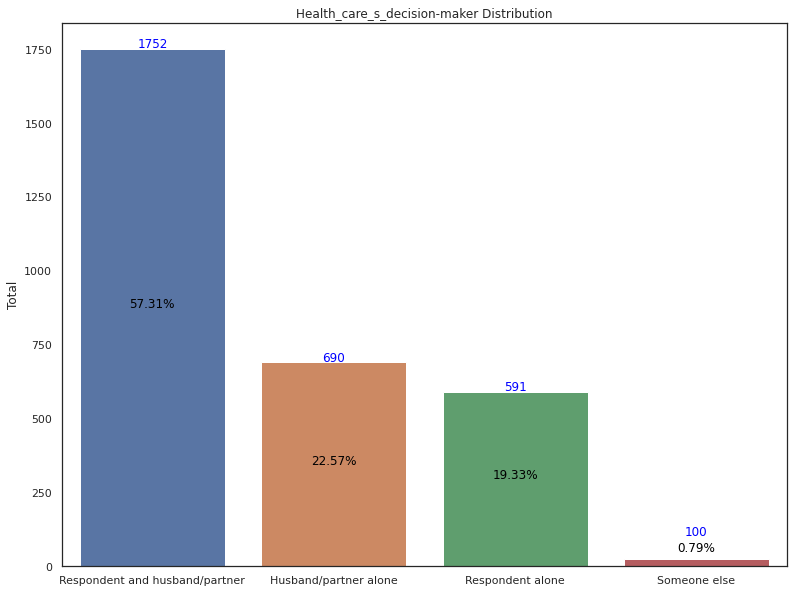

,Total,Percent
Respondent and husband/partner,1752,0.57
Husband/partner alone,690,0.23
Respondent alone,591,0.19
Someone else,24,0.01


In [ ]:
#Show aplot for  categoric succesively
for col in cat_cols:
  result = prob_category(data=df,col=col, abs_value ="Total",rel_value ="Percent", show_plot=True,title=f"{col} Distribution")
  display(result)

###**Deal with NaN value**

In [ ]:
import missingno as msno_plot

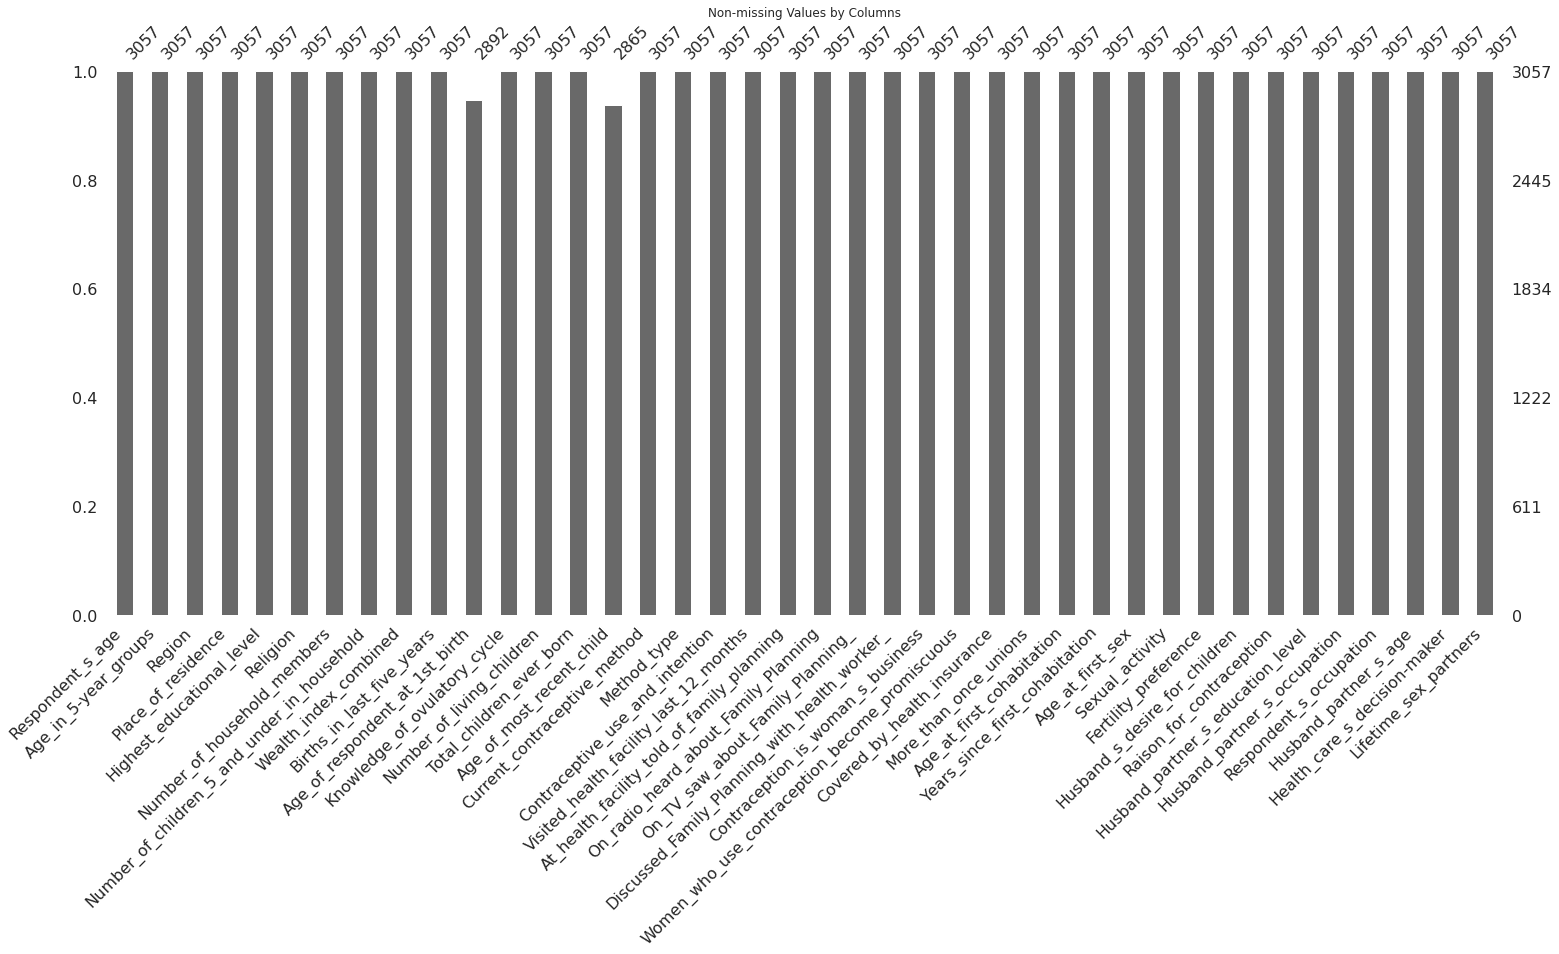

In [ ]:
# Barplot of non-missing values
plt.title('Non-missing Values by Columns')
msno_plot.bar(df)

In [ ]:
#Function to find missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
# Check missing values
missing = missing_values_table(df)
missing

Your selected dataframe has 40 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Age_of_most_recent_child,192,6.30
Age_of_respondent_at_1st_birth,165,5.40


In [ ]:
# replacing na values in Age_of_most_recent_child
df["Age_of_most_recent_child"].fillna(df['Age_of_most_recent_child'].mean(), inplace = True)

In [ ]:
# replacing na values in Age_of_respondent_at_1st_birth
df["Age_of_respondent_at_1st_birth"].fillna(df['Age_of_respondent_at_1st_birth'].mean(), inplace = True)

In [ ]:
df['At_health_facility_told_of_family_planning'].mode()

0    No
dtype: object

In [ ]:
missing_values_table(df)

Your selected dataframe has 40 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
num_cols

['Respondent_s_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Age_at_first_sex',
 'Sexual_activity',
 'Husband_partner_s_age',
 'Lifetime_sex_partners']

##**DEALING WITH OUTLIERS**

In [ ]:
num=['Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Age_at_first_sex',
 'Husband_partner_s_age',
 'Lifetime_sex_partners']

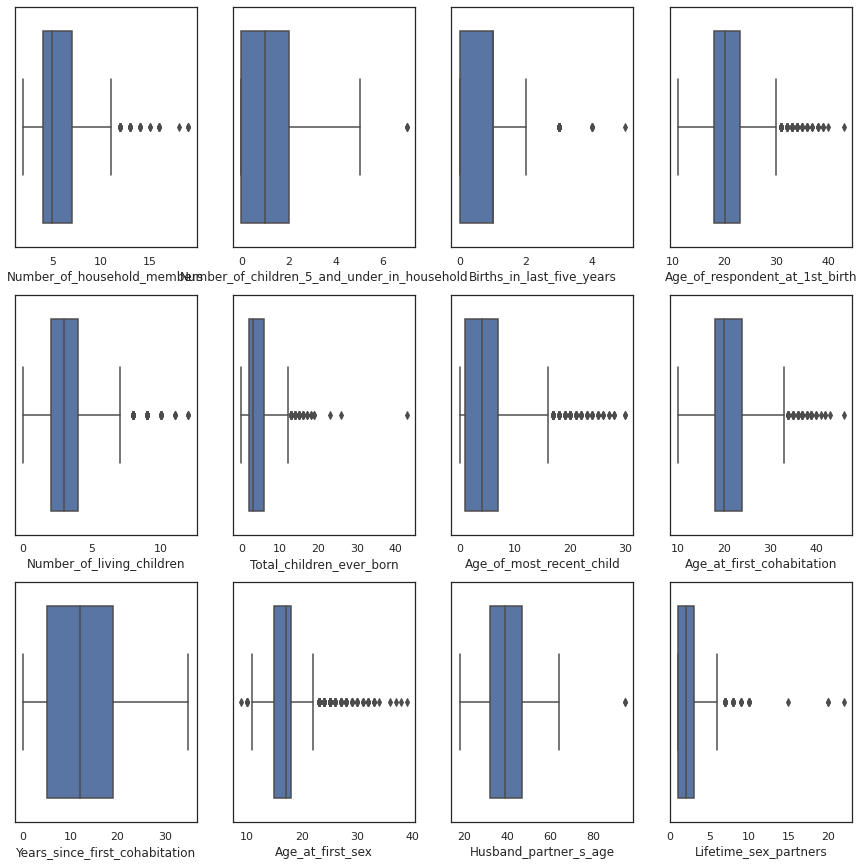

In [ ]:
#--Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in df[num]:
    plt.subplot(3, 4, pos)
    sns.boxplot(df[i])
    pos += 1

In [ ]:
for i in num:
    q1, q2, q3 = df[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    lower_cap=q1-1.5*IQR
    upper_cap=q3+1.5*IQR
    df[i]=df[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

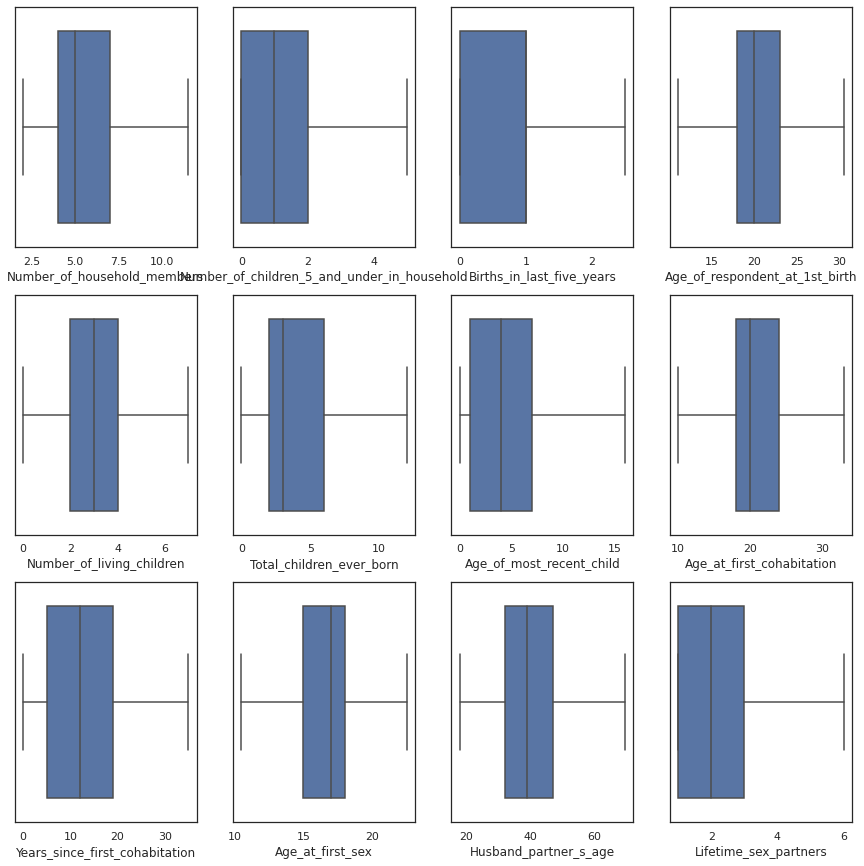

In [ ]:
#--Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in df[num]:
    plt.subplot(3, 4, pos)
    sns.boxplot(df[i])
    pos += 1

  * **There are 3033 observations and 33 features in this dataset**

**There is :**
  * **No Null values**
  * **No Missing values**
  * **No Duplicated values**

In [ ]:
# Plot Pie Chart
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)

##**ANALYSIS**
**As we can see, This dataset is dominated by the following characteristics:** 


* **The most representative regions of the dataset are**

  * **West (20%) with 50% from the air metropolitan area**
  * **Artibonite (11%)**
  * **Northwest (11%)**

* **Geographics** 
  * **2/3 are from rural areas** 


* **Education**

**97% don't get higher than secondary level**
  * **Primary school (39%)**
  * **Secondary school (32)**
  * **No education (26%)**
  * **Higher (3%)**

* **Type Of Contraceptive Method Used**
  * **About 1/3 used injections contraceptive method**

* **Wealth index**
  * **48% are indexed in a poor household class**

* **Religion**

  * **52% are Prostestant**
  * **42% are Catholic**
  * **6% No Religion**

* **Profession**
  * **46% have their husbands working in agriculture**

In [ ]:
# plot the contraceptive prevalence of the dataset
pie_plot(df["Contraceptive_use_and_intention"].value_counts(), plot_title="Distribution by modern contraceptive method")

###**Target Transformation**

In [ ]:
df['Contraceptive_use_and_intention'].unique()

array(['Non-user - intends to use later', 'Using modern method',
       'Does not intend to use'], dtype=object)

In [ ]:
df['Contraceptive_use_and_intention'].replace({'Does not intend to use': 'No', 'Using modern method': 'Yes', 'Non-user - intends to use later': 'Yes'}, inplace=True)

In [ ]:
bootcamp=df.copy(deep=True)

##**Comments I**

###**DESCRIPTIVE ANALYSIS**

In [ ]:
# Descriptive of numeric variable
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Respondent_s_age,3057.00,34.08,8.36,15.00,27.00,34.00,41.00,49.00
Number_of_household_members,3057.00,5.56,2.17,2.00,4.00,5.00,7.00,11.50
Number_of_children_5_and_under_in_household,3057.00,1.00,0.94,0.00,0.00,1.00,2.00,5.00
Births_in_last_five_years,3057.00,0.76,0.77,0.00,0.00,1.00,1.00,2.50
Age_of_respondent_at_1st_birth,3057.00,20.73,4.02,11.00,18.00,20.00,23.00,30.50
Number_of_living_children,3057.00,3.06,1.99,0.00,2.00,3.00,4.00,7.00
Total_children_ever_born,3057.00,3.93,2.89,0.00,2.00,3.00,6.00,12.00
Age_of_most_recent_child,3057.00,4.72,4.29,0.00,1.00,4.00,7.00,16.00
More_than_once_unions,3057.00,0.22,0.41,0.00,0.00,0.00,0.00,1.00
Age_at_first_cohabitation,3057.00,21.00,4.67,10.00,18.00,20.00,24.00,33.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe17ed00c10>,
      dtype=object)

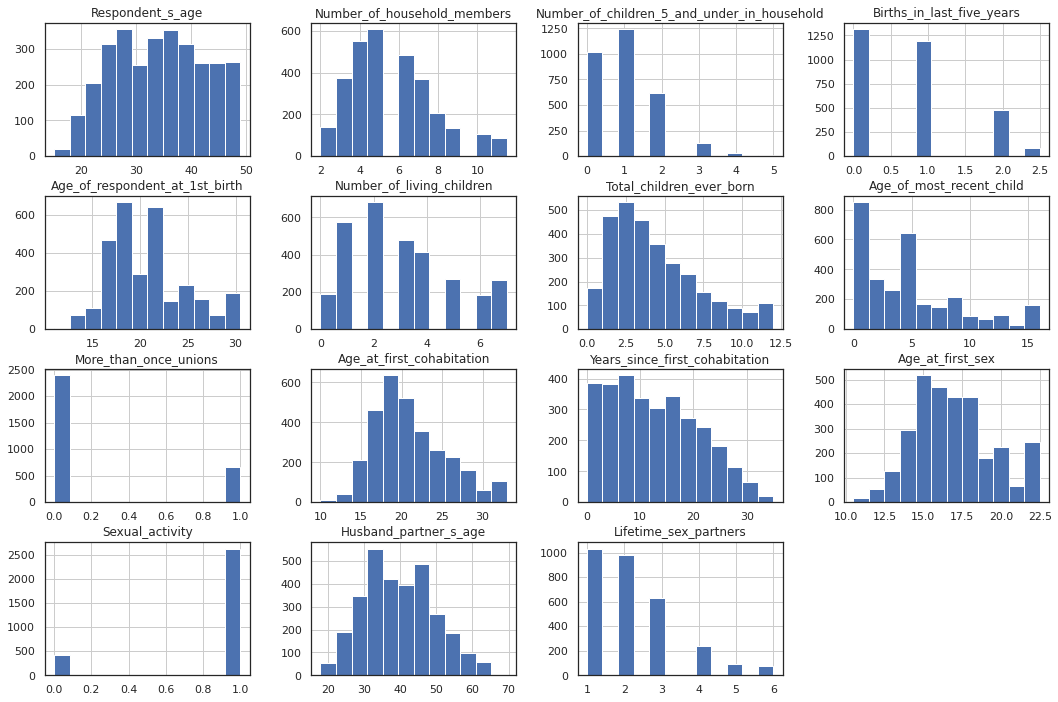

In [ ]:
# Let's plot numeric variable
df[num_cols].hist(figsize = (18,12), bins=12)

##**Numeric variable Analysis**
**Apart from the variable Total_lifetime_number_of_sex_partners**.

**The variables:**
* Respondent_s_current_age
* Number_of_household_members
* Number_of_children_5_and_under_in_household',
* Age_of_respondent_at_1st_birth
* Number_of_living_children
* Age_at_first_cohabitation
* Years_since_first_cohabitation
* Husband_partner_s_age
 
**appear to be normally distributed but a chapiro test is required to better assess this assumption**.

In [ ]:
# describe of non numeric variables
include =['object'] 
df.describe( include = include).T

,count,unique,top,freq
Age_in_5-year_groups,3057,7,30-34,589
Region,3057,10,Ouest,643
Place_of_residence,3057,2,Rural,2081
Highest_educational_level,3057,4,Primary,1191
Religion,3057,5,Protestant,1574
...,...,...,...,...
Raison_for_contraception,3057,3,Limiting,1521
Husband_partner_s_education_level,3057,5,Primary,1141
Husband_partner_s_occupation,3057,8,Agricultural - self employed,1313
Respondent_s_occupation,3057,8,Sales,1763


##**DATA TRANSFORMATION**

In [ ]:
# categorical function to transform numeric columns

''' This function is for age numeric transformation'''
def cat_age(x, errors = "coerce"):
  if 0 <= x <= 3:
    return '0-3' 
  if 4 <= x <= 7:
    return '4-7' 
  if 8 <= x <= 14:
    return '8-14'
  if 15 <= x <= 19:
    return '15-19'
  if 20 <= x <= 24:
    return '20-24' 
  if 25 <= x <= 29:
    return '25-29'
  if 30 <= x <= 34:
    return '30-34'
  if 34 <= x <= 39:
    return '34-39'
  if 40 <= x <= 44:
    return '40-44'
  if 45 <= x <= 49:
    return '45-49'
  if 50 <= x <= 54:
    return '50-54'
  if 55 <= x <= 60:
    return '55-60'
  if 64 <= x <= 69:
    return '64-69'

In [ ]:
df['Respondent_s_occupation'].replace({'Sales': 'Sales/Agricultural/self_employed','Agricultural - self employed': 'Sales/Agricultural/self_employed', 'Skilled manual': 'Other', 'Unskilled manual': 'Other', 'Household and domestic':'Other'}, inplace=True)

In [ ]:
df['Husband_partner_s_occupation'].replace({'Sales': 'Sales/Agricultural/self_employed', 'Agricultural - self employed':'Sales/Agricultural/self_employed','Skilled manual':'Professional/technical/managerial', 'Unskilled manual': 'Other', 'Did not work': 'Not working', 'Household and domestic':'Other'}, inplace=True)

In [ ]:
df['Knowledge_of_ovulatory_cycle'] = np.where(df['Knowledge_of_ovulatory_cycle'] == 'Middle of the cycle', 1, 0)

In [ ]:
df['Health_care_s_decision-maker'].replace({'Husband/partner alone': 0, 'Respondent and husband/partner':1,'Respondent alone':1, 'Someone else': 0}, inplace=True)

In [ ]:
df['Household_members']=df['Number_of_household_members'].apply(cat_age)
df['Lifetime_sex']=df['Lifetime_sex_partners'].apply(cat_age)
df['Children_5_and_under_in_household']=df['Number_of_children_5_and_under_in_household'].apply(cat_age)
df['Age_at_1st_birth']=df['Age_of_respondent_at_1st_birth'].apply(cat_age)
df['Total_children']=df['Total_children_ever_born'].apply(cat_age)
df['Births_in_five_years']=df['Births_in_last_five_years'].apply(cat_age)
df['Age_recent_child']=df['Age_of_most_recent_child'].apply(cat_age)
df['Age_first_cohabitation']=df['Age_at_first_cohabitation'].apply(cat_age)
df['Age_first_sex']=df['Age_at_first_sex'].apply(cat_age)
df['Husband_s_age']=df['Husband_partner_s_age'].apply(cat_age)
df.head()

,Respondent_s_age,Age_in_5-year_groups,Region,Place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Wealth_index_combined,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Number_of_living_children,Total_children_ever_born,Age_of_most_recent_child,Current_contraceptive_method,Method_type,Contraceptive_use_and_intention,Visited_health_facility_last_12_months,At_health_facility_told_of_family_planning,On_radio_heard_about_Family_Planning,On_TV_saw_about_Family_Planning_,Discussed_Family_Planning_with_health_worker_,Contraception_is_woman_s_business,Women_who_use_contraception_become_promiscuous,Covered_by_health_insurance,More_than_once_unions,Age_at_first_cohabitation,Years_since_first_cohabitation,Age_at_first_sex,Sexual_activity,Fertility_preference,Husband_s_desire_for_children,Raison_for_contraception,Husband_partner_s_education_level,Husband_partner_s_occupation,Respondent_s_occupation,Husband_partner_s_age,Health_care_s_decision-maker,Lifetime_sex_partners,Household_members,Lifetime_sex,Children_5_and_under_in_household,Age_at_1st_birth,Total_children,Births_in_five_years,Age_recent_child,Age_first_cohabitation,Age_first_sex,Husband_s_age
0,31,30-34,Sud,Rural,Primary,Catholic,4.00,2.00,Middle,2.50,19.00,0,3.00,3.00,1.00,Not using,No method,Yes,Yes,No,No,No,No,Disagree,Disagree,No,0,27.00,4,15.00,1,No more,Husband wants more,Limiting,Primary,Professional/technical/managerial,Sales/Agricultural/self_employed,31.00,0,2.00,4-7,0-3,0-3,15-19,0-3,0-3,0-3,25-29,15-19,30-34
1,38,35-39,Sud,Rural,Higher,Catholic,5.00,1.00,Middle,1.00,30.50,1,2.00,3.00,3.00,Injections,Modern method,Yes,Yes,No,Yes,No,No,Agree,Disagree,No,0,29.00,8,18.00,1,No more,Both want same,Limiting,Higher,Professional/technical/managerial,Professional/technical/managerial,39.00,1,2.00,4-7,0-3,0-3,30-34,0-3,0-3,0-3,25-29,15-19,34-39
2,38,35-39,Sud,Rural,Secondary,Protestant,6.00,1.00,Middle,1.00,28.00,0,4.00,4.00,1.00,Injections,Modern method,Yes,Yes,No,Yes,No,Yes,Disagree,Disagree,No,0,28.00,10,22.50,1,No more,Both want same,Limiting,Secondary,Professional/technical/managerial,Not working,36.00,0,2.00,4-7,0-3,0-3,25-29,4-7,0-3,0-3,25-29,20-24,34-39
3,35,35-39,Sud,Rural,Secondary,Catholic,6.00,0.00,Middle,0.00,23.00,0,2.00,4.00,7.00,Injections,Modern method,Yes,Yes,No,No,No,No,Disagree,Disagree,No,0,22.00,12,18.00,1,Have another,Husband wants more,Spacing,Secondary,Professional/technical/managerial,Sales/Agricultural/self_employed,42.00,0,2.00,4-7,0-3,0-3,20-24,4-7,0-3,4-7,20-24,15-19,40-44
4,37,35-39,Sud,Rural,Secondary,Catholic,7.00,1.00,Poorer,1.00,18.00,0,5.00,5.00,3.00,Injections,Modern method,Yes,No,No,No,No,Yes,Agree,Agree,No,0,18.00,19,17.00,1,No more,Husband wants more,Limiting,No education,Sales/Agricultural/self_employed,Sales/Agricultural/self_employed,53.00,1,2.00,4-7,0-3,0-3,15-19,4-7,0-3,0-3,15-19,15-19,50-54


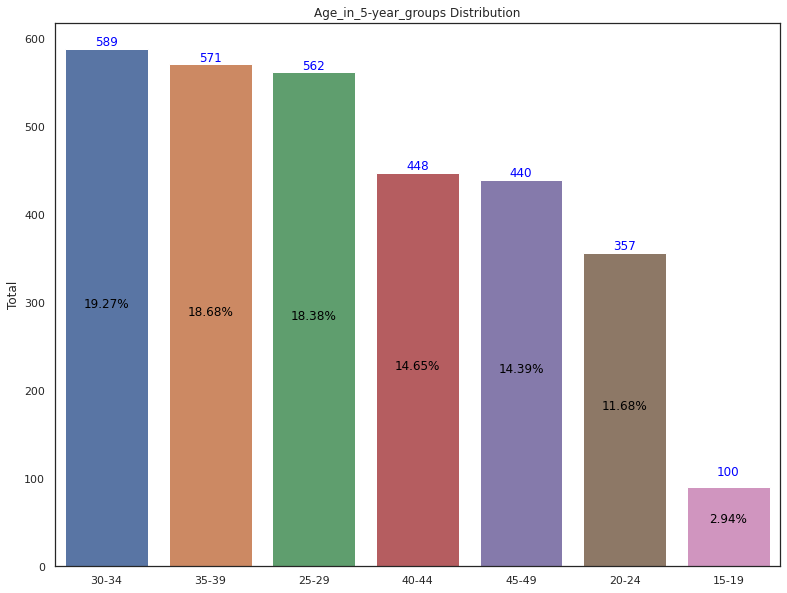

,Total,Percent
30-34,589,0.19
35-39,571,0.19
25-29,562,0.18
40-44,448,0.15
45-49,440,0.14
20-24,357,0.12
15-19,90,0.03


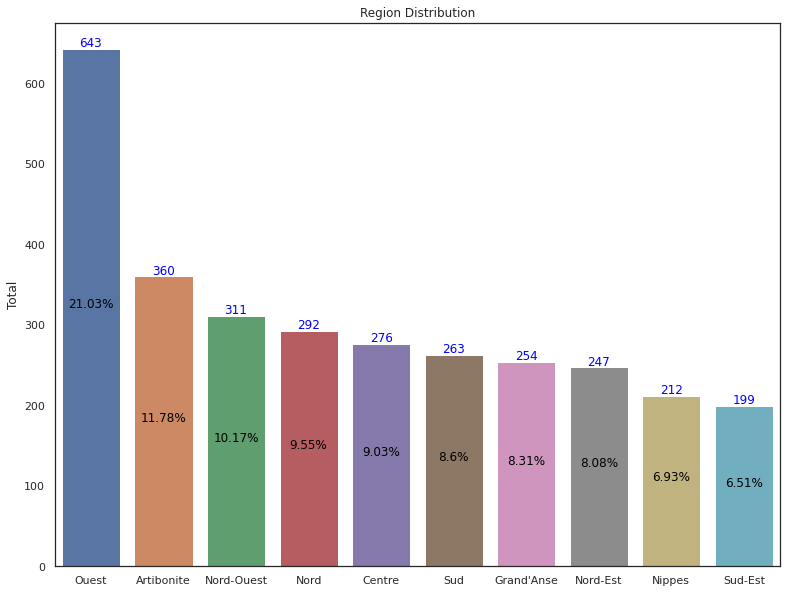

,Total,Percent
Ouest,643,0.21
Artibonite,360,0.12
Nord-Ouest,311,0.10
Nord,292,0.10
Centre,276,0.09
Sud,263,0.09
Grand'Anse,254,0.08
Nord-Est,247,0.08
Nippes,212,0.07
Sud-Est,199,0.07


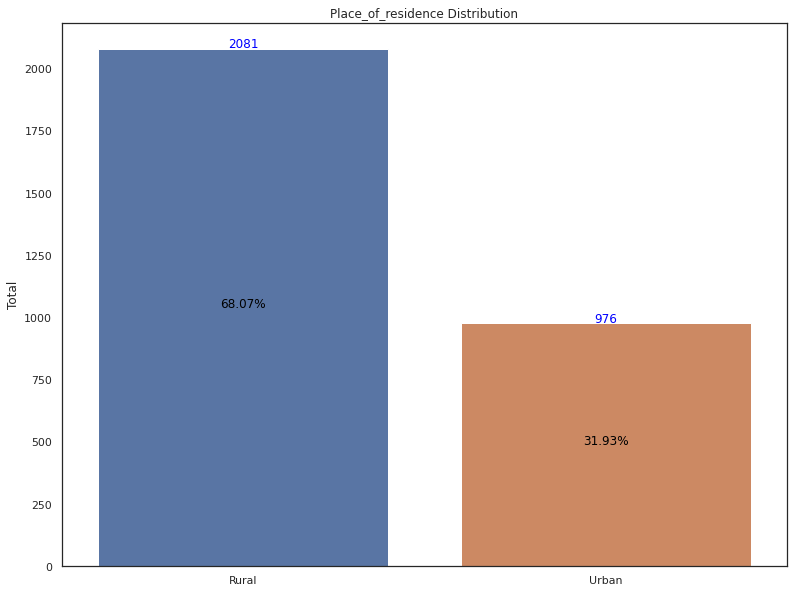

,Total,Percent
Rural,2081,0.68
Urban,976,0.32


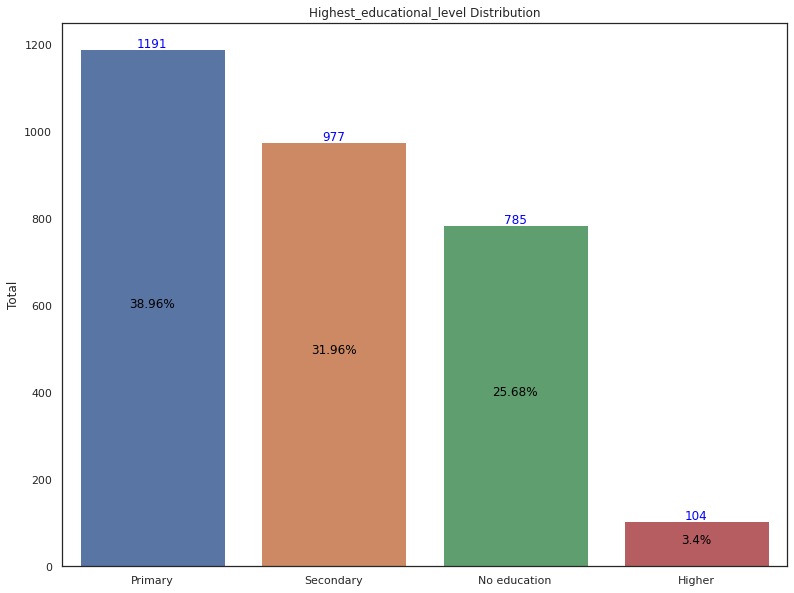

,Total,Percent
Primary,1191,0.39
Secondary,977,0.32
No education,785,0.26
Higher,104,0.03


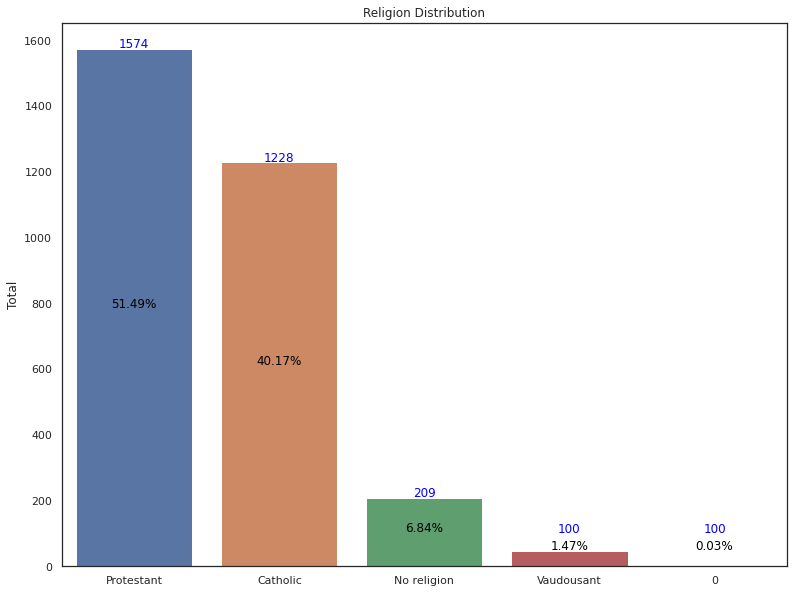

,Total,Percent
Protestant,1574,0.51
Catholic,1228,0.40
No religion,209,0.07
Vaudousant,45,0.01
0,1,0.00


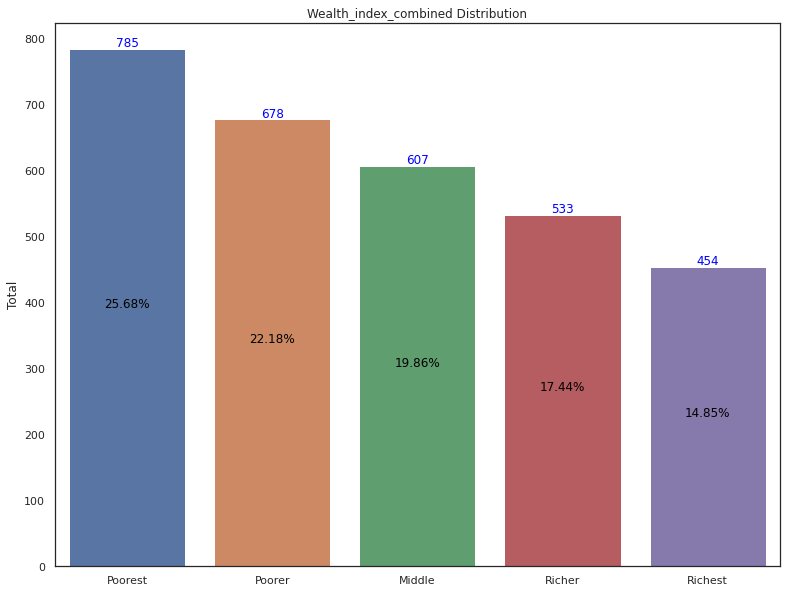

,Total,Percent
Poorest,785,0.26
Poorer,678,0.22
Middle,607,0.20
Richer,533,0.17
Richest,454,0.15


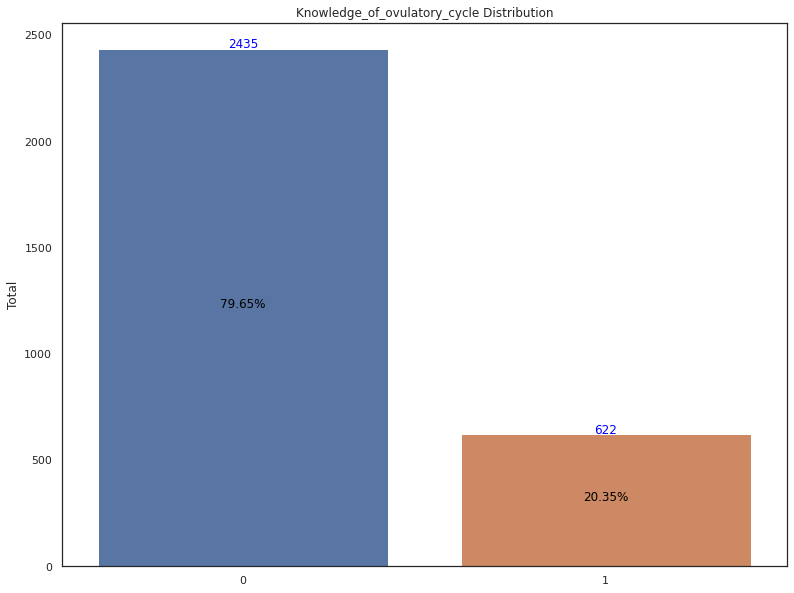

,Total,Percent
0,2435,0.80
1,622,0.20


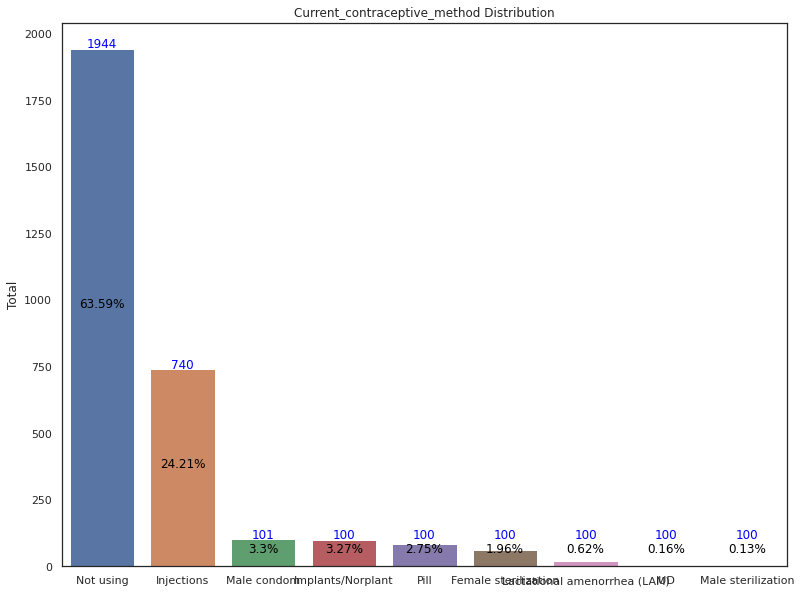

,Total,Percent
Not using,1944,0.64
Injections,740,0.24
Male condom,101,0.03
Implants/Norplant,100,0.03
Pill,84,0.03
Female sterilization,60,0.02
Lactational amenorrhea (LAM),19,0.01
IUD,5,0.00
Male sterilization,4,0.00


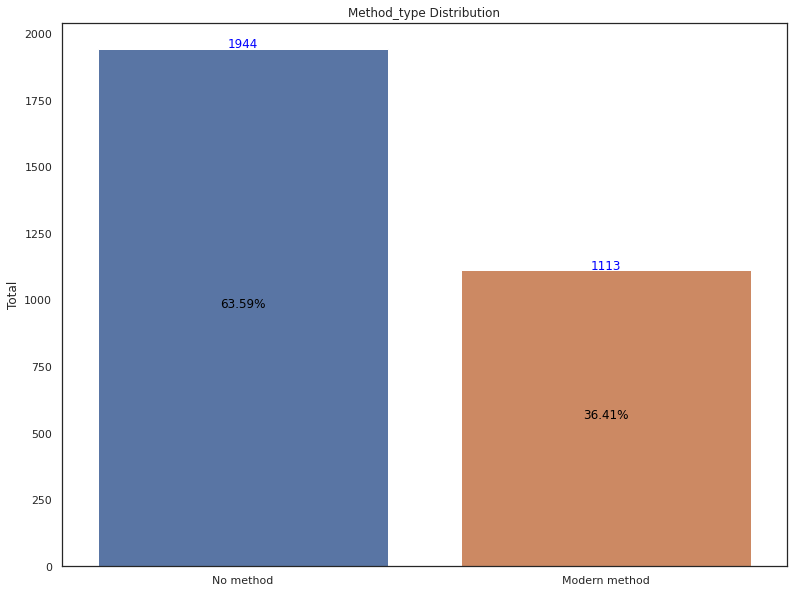

,Total,Percent
No method,1944,0.64
Modern method,1113,0.36


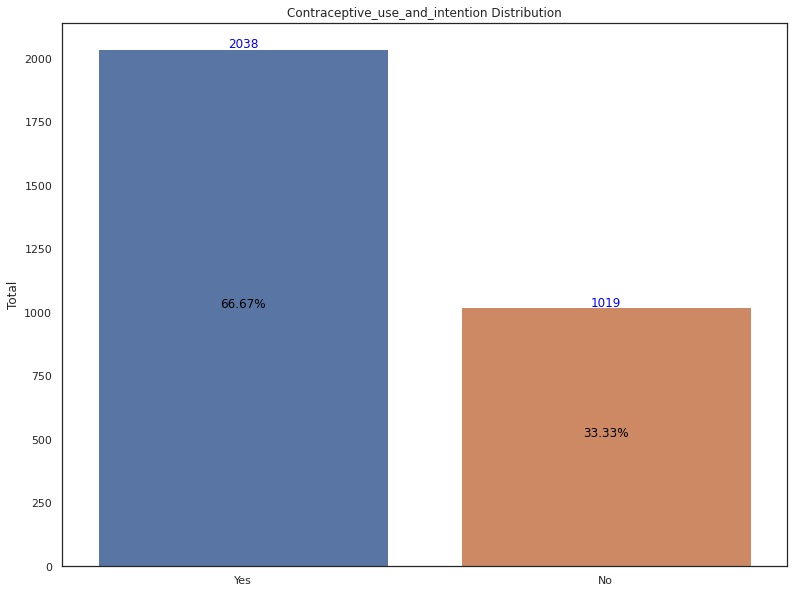

,Total,Percent
Yes,2038,0.67
No,1019,0.33


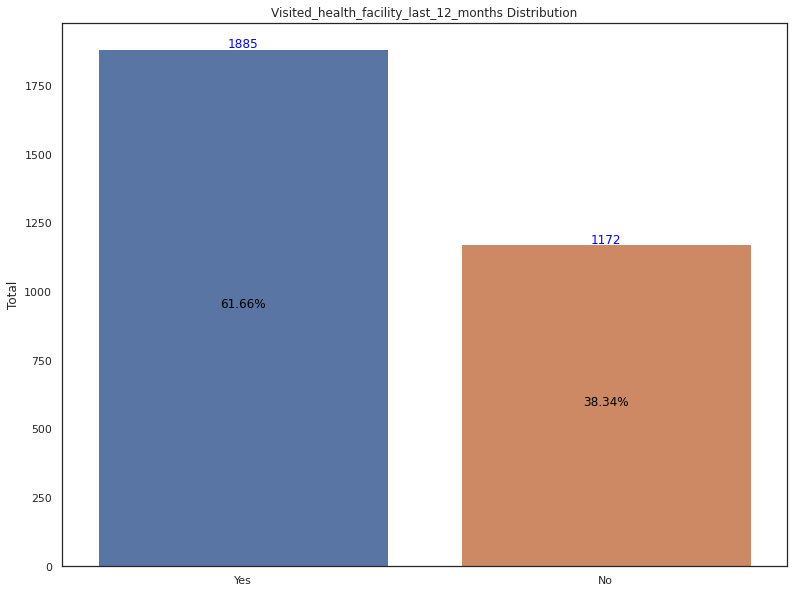

,Total,Percent
Yes,1885,0.62
No,1172,0.38


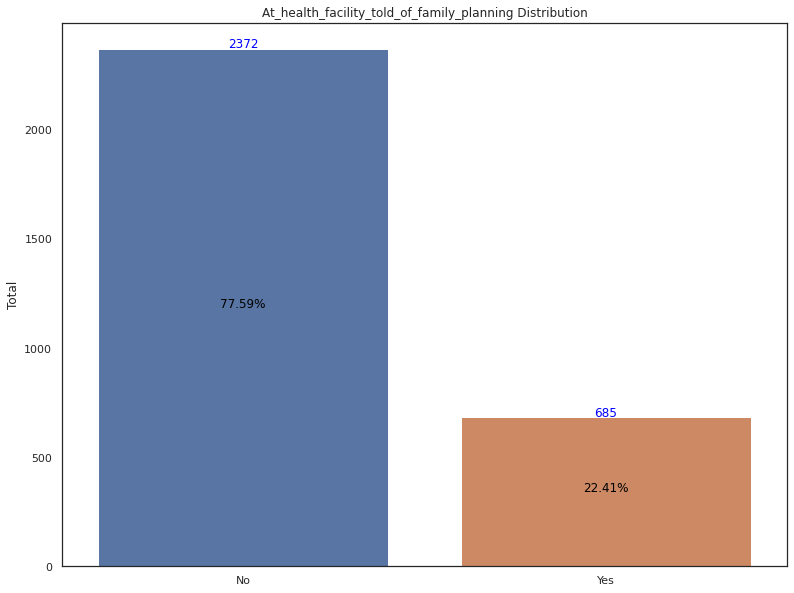

,Total,Percent
No,2372,0.78
Yes,685,0.22


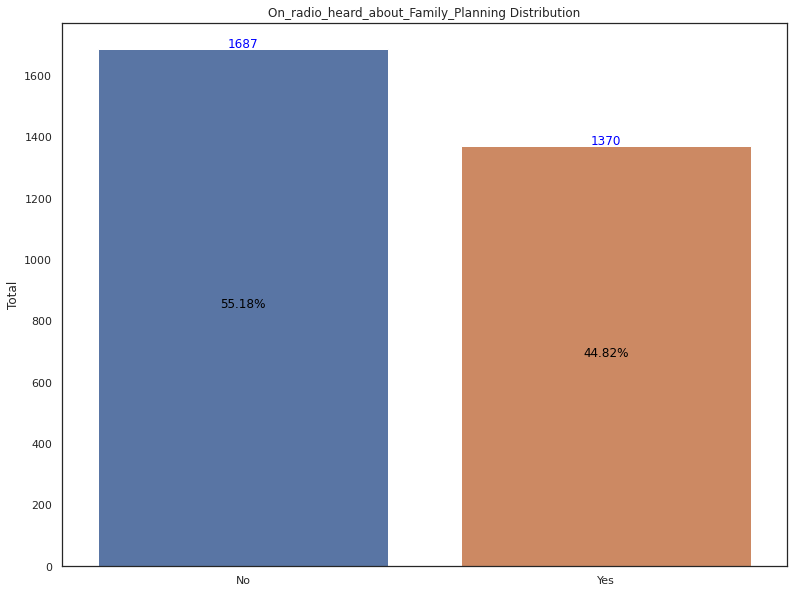

,Total,Percent
No,1687,0.55
Yes,1370,0.45


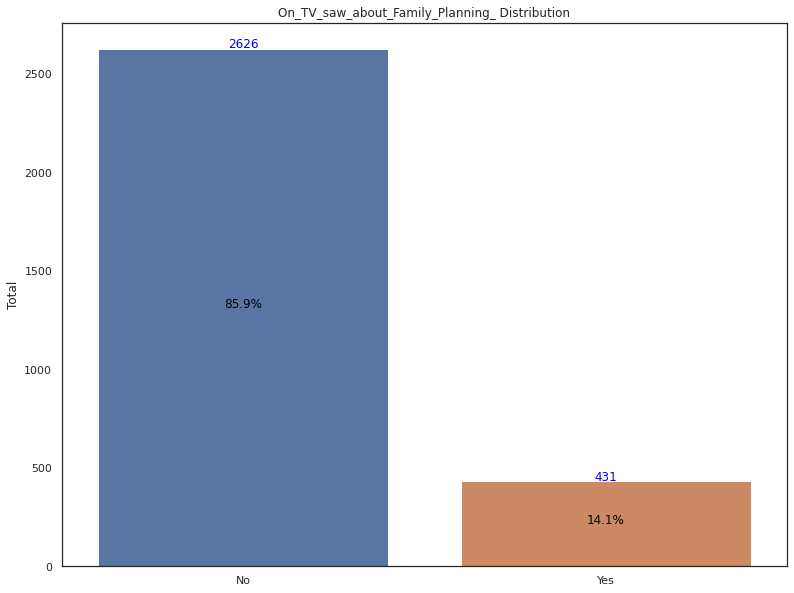

,Total,Percent
No,2626,0.86
Yes,431,0.14


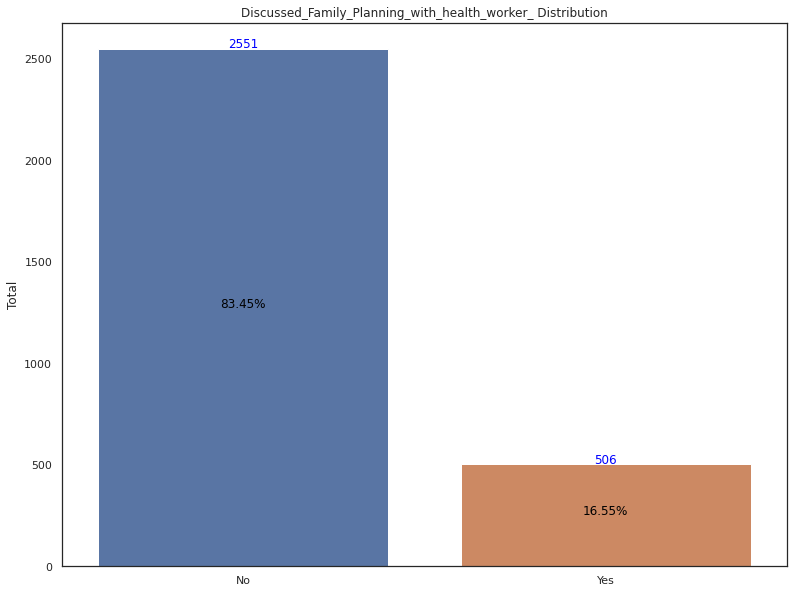

,Total,Percent
No,2551,0.83
Yes,506,0.17


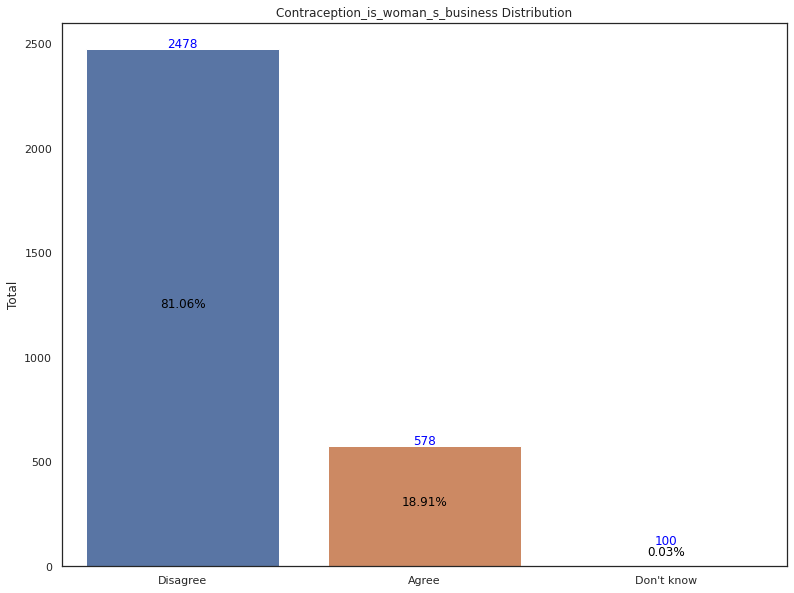

,Total,Percent
Disagree,2478,0.81
Agree,578,0.19
Don't know,1,0.00


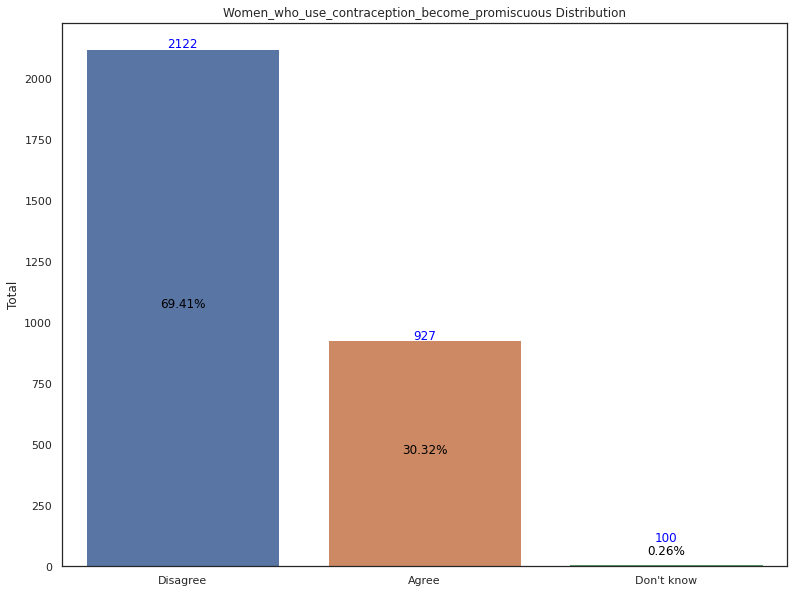

,Total,Percent
Disagree,2122,0.69
Agree,927,0.30
Don't know,8,0.00


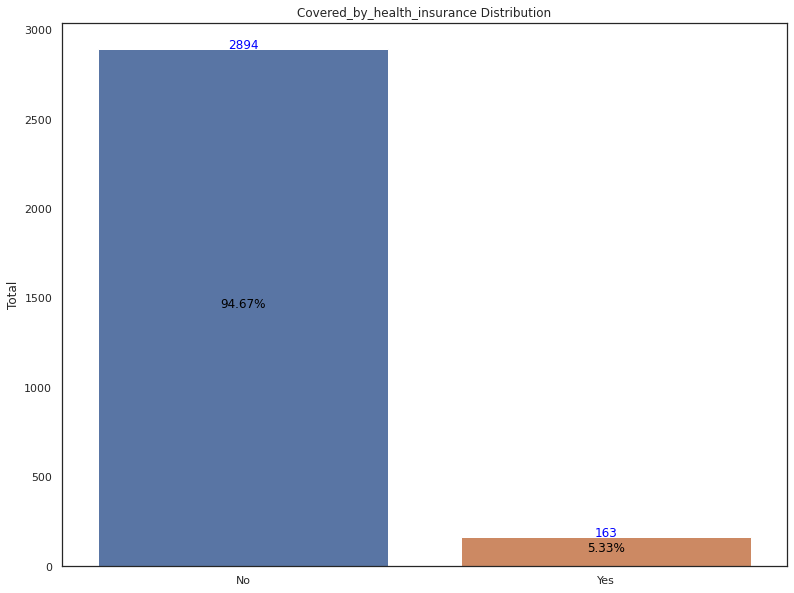

,Total,Percent
No,2894,0.95
Yes,163,0.05


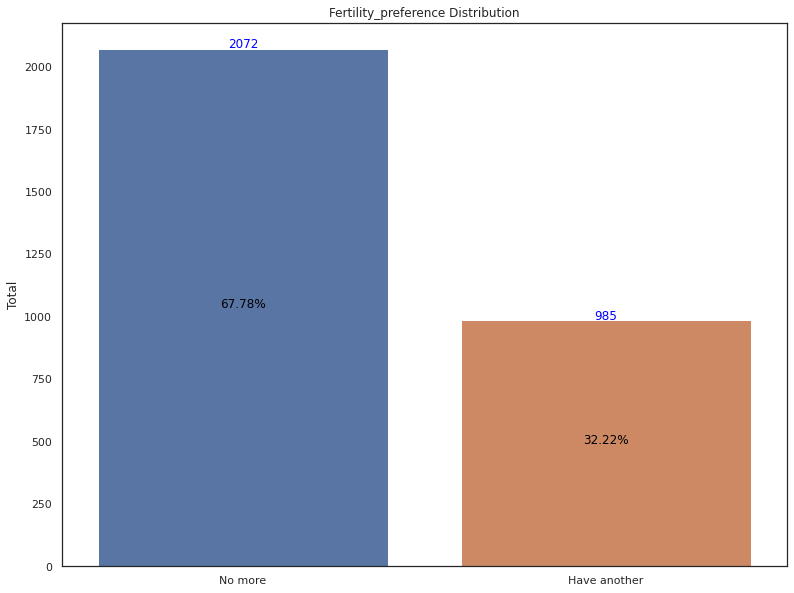

,Total,Percent
No more,2072,0.68
Have another,985,0.32


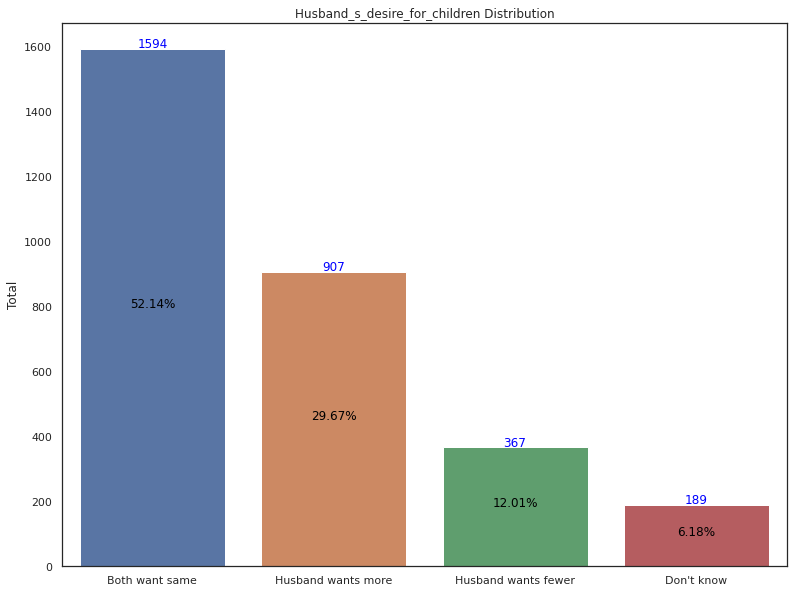

,Total,Percent
Both want same,1594,0.52
Husband wants more,907,0.30
Husband wants fewer,367,0.12
Don't know,189,0.06


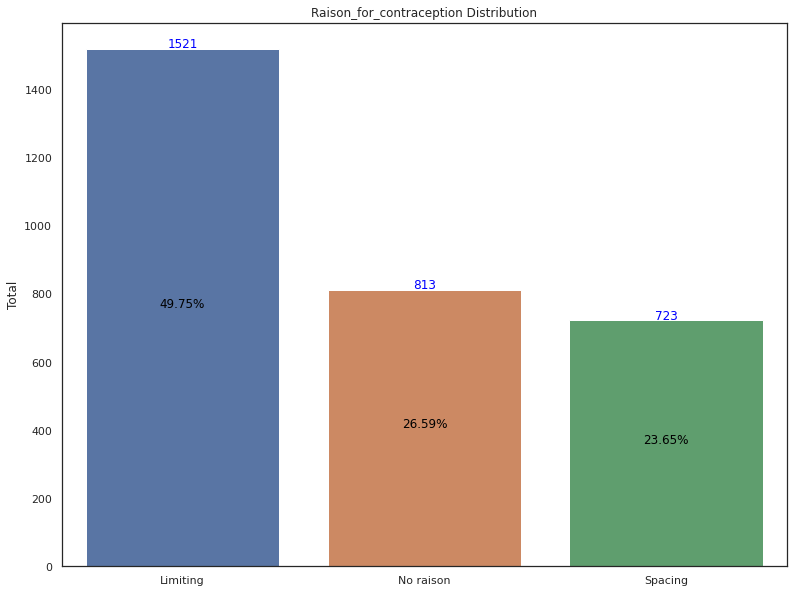

,Total,Percent
Limiting,1521,0.50
No raison,813,0.27
Spacing,723,0.24


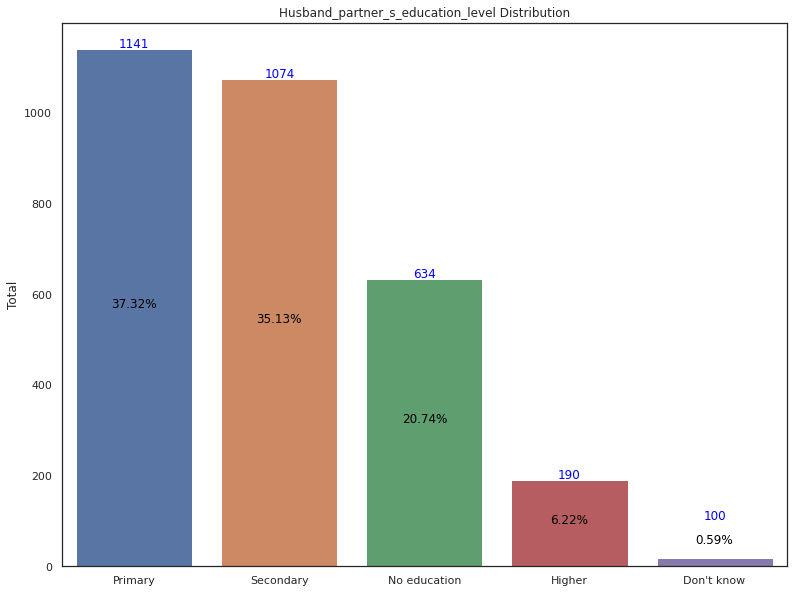

,Total,Percent
Primary,1141,0.37
Secondary,1074,0.35
No education,634,0.21
Higher,190,0.06
Don't know,18,0.01


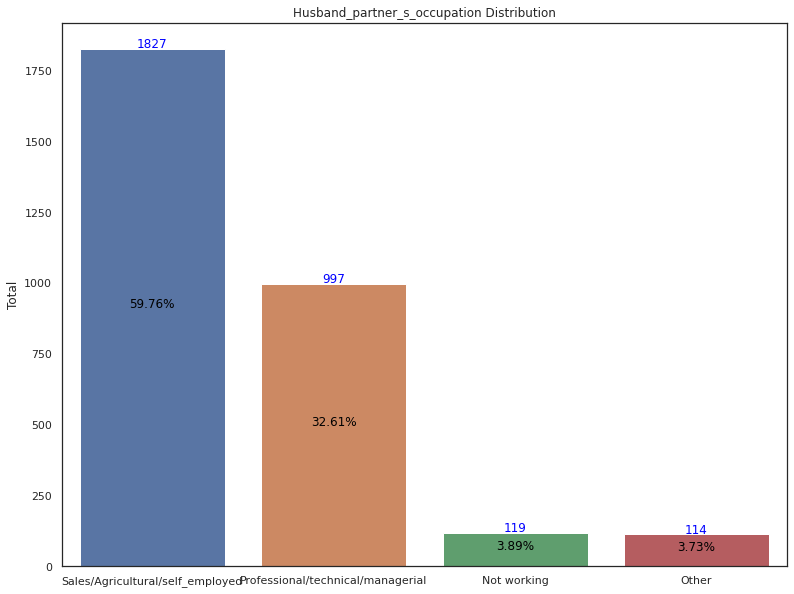

,Total,Percent
Sales/Agricultural/self_employed,1827,0.60
Professional/technical/managerial,997,0.33
Not working,119,0.04
Other,114,0.04


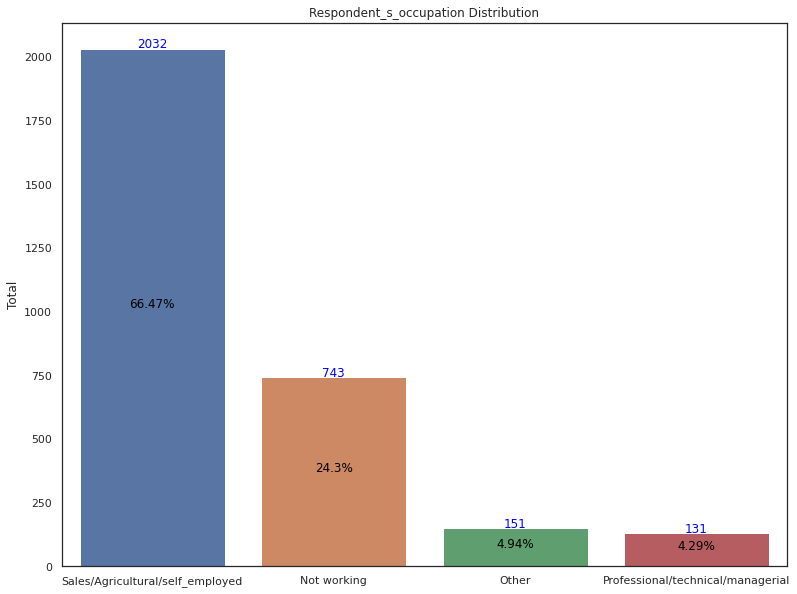

,Total,Percent
Sales/Agricultural/self_employed,2032,0.66
Not working,743,0.24
Other,151,0.05
Professional/technical/managerial,131,0.04


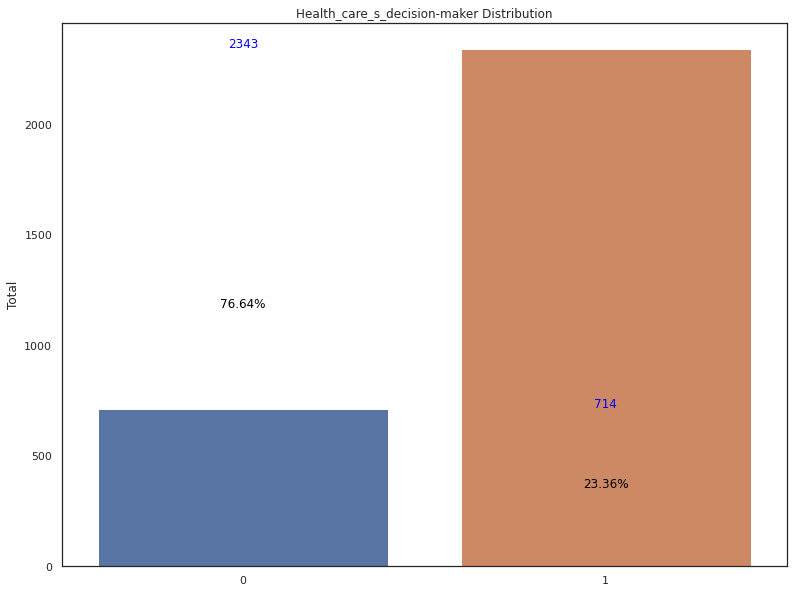

,Total,Percent
1,2343,0.77
0,714,0.23


In [ ]:
#Show aplot for  categoric succesively
for col in cat_cols:
  res_cat = prob_category(data=df,col=col, abs_value ="Total",rel_value ="Percent", show_plot=True,title=f"{col} Distribution")
  display(res_cat)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Respondent_s_age                                3057 non-null   int64  
 1   Age_in_5-year_groups                            3057 non-null   object 
 2   Region                                          3057 non-null   object 
 3   Place_of_residence                              3057 non-null   object 
 4   Highest_educational_level                       3057 non-null   object 
 5   Religion                                        3057 non-null   object 
 6   Number_of_household_members                     3057 non-null   float64
 7   Number_of_children_5_and_under_in_household     3057 non-null   float64
 8   Wealth_index_combined                           3057 non-null   object 
 9   Births_in_last_five_years                

In [ ]:
# Display numeric variables
num_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]

In [ ]:
def grab_cols(dataframe, cat_th=10, car_th=20):
    cats_col = [col for col in dataframe.columns  # Categorical
                if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns
                   if dataframe[col].nunique() < cat_th and  # Numeric but categorical
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns
                   if dataframe[col].nunique() > car_th and  # Categorical but high cardinal
                   dataframe[col].dtypes == "O"]
    nums_col = [col for col in dataframe.columns if dataframe[col].dtypes not in ['O', 'datetime64[ns]'] and
                dataframe[col].nunique() > 10]  # Numeric
    return cats_col, num_but_cat, cat_but_car, nums_col

In [ ]:
cats_col, num_but_cat, cat_but_car, nums_col = grab_cols(df)

In [ ]:
cats_col

['Age_in_5-year_groups',
 'Region',
 'Place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Current_contraceptive_method',
 'Method_type',
 'Contraceptive_use_and_intention',
 'Visited_health_facility_last_12_months',
 'At_health_facility_told_of_family_planning',
 'On_radio_heard_about_Family_Planning',
 'On_TV_saw_about_Family_Planning_',
 'Discussed_Family_Planning_with_health_worker_',
 'Contraception_is_woman_s_business',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'Fertility_preference',
 'Husband_s_desire_for_children',
 'Raison_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation',
 'Household_members',
 'Lifetime_sex',
 'Children_5_and_under_in_household',
 'Age_at_1st_birth',
 'Total_children',
 'Births_in_five_years',
 'Age_recent_child',
 'Age_first_cohabitation',
 'Age_first_sex',
 'Husband_s_age']

In [ ]:
num_but_cat

['Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years',
 'Knowledge_of_ovulatory_cycle',
 'Number_of_living_children',
 'More_than_once_unions',
 'Sexual_activity',
 'Health_care_s_decision-maker',
 'Lifetime_sex_partners']

In [ ]:
cat_but_car

[]

In [ ]:
nums_col

['Respondent_s_age',
 'Number_of_household_members',
 'Age_of_respondent_at_1st_birth',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Age_at_first_sex',
 'Husband_partner_s_age']

In [ ]:
df.columns.tolist()

['Respondent_s_age',
 'Age_in_5-year_groups',
 'Region',
 'Place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Wealth_index_combined',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Number_of_living_children',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Current_contraceptive_method',
 'Method_type',
 'Contraceptive_use_and_intention',
 'Visited_health_facility_last_12_months',
 'At_health_facility_told_of_family_planning',
 'On_radio_heard_about_Family_Planning',
 'On_TV_saw_about_Family_Planning_',
 'Discussed_Family_Planning_with_health_worker_',
 'Contraception_is_woman_s_business',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Age_at_first_sex',
 'Sexual_activity',
 'Fertility_preference',
 'Hu

In [ ]:
# plot the contraceptive prevalence of the dataset
pie_plot(df["Contraceptive_use_and_intention"].value_counts(), plot_title="Demand for contraceptive method")

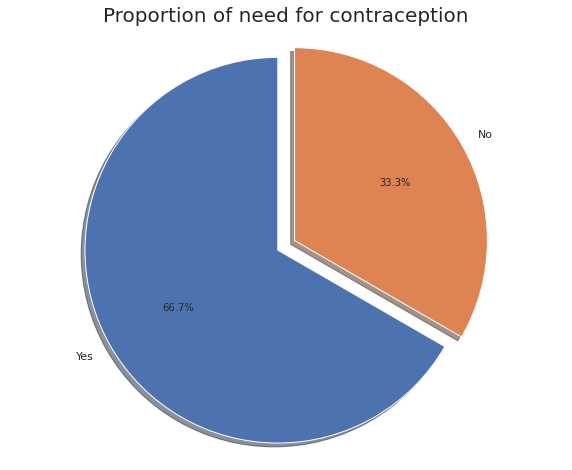

In [ ]:
labels = 'Yes', 'No'
sizes = [df.Contraceptive_use_and_intention[df['Contraceptive_use_and_intention']=='Yes'].count(), df.Contraceptive_use_and_intention[df['Contraceptive_use_and_intention']=='No'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of need for contraception", size = 20)
plt.show()

In [ ]:
# plot the contraceptive prevalence of the dataset
pie_plot(df["Raison_for_contraception"].value_counts(), plot_title="Distribution by modern contraceptive method")

In [ ]:
# plot the contraceptive prevalence of the dataset
pie_plot(df["Sexual_activity"].value_counts(), plot_title="Sexaul activity Distribution")

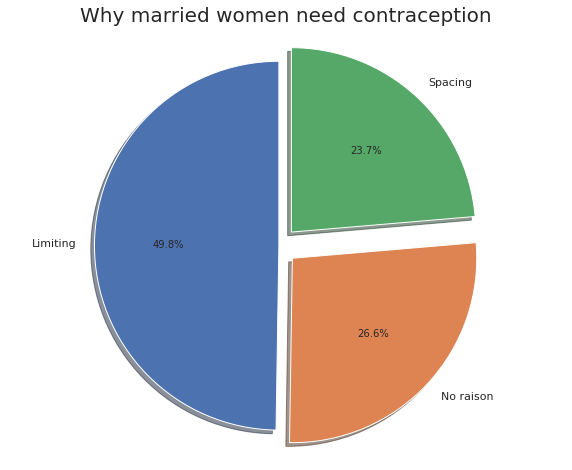

In [ ]:
labels = 'Limiting', 'No raison', 'Spacing'
sizes = [df.Raison_for_contraception[df['Raison_for_contraception']=='Limiting'].count(), df.Raison_for_contraception[df['Raison_for_contraception']=='No raison'].count(), df.Raison_for_contraception[df['Raison_for_contraception']=='Spacing'].count()]
explode = (0, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Why married women need contraception", size = 20)
plt.show()

In [ ]:
df['Method_type'].unique()

array(['No method', 'Modern method'], dtype=object)

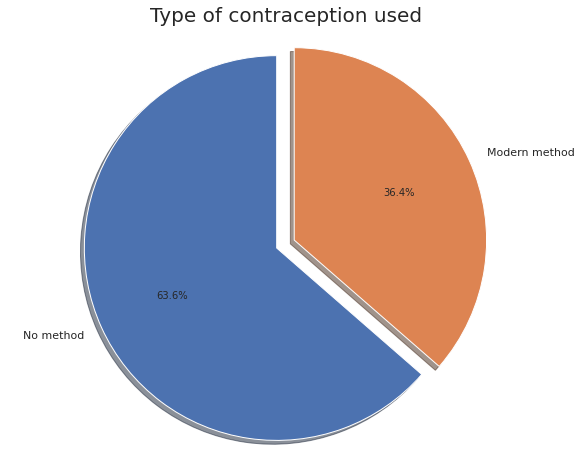

In [ ]:
labels = 'No method', 'Modern method'
sizes = [df.Method_type[df['Method_type']=='No method'].count(), df.Method_type[df['Method_type']=='Modern method'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',  shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Type of contraception used", size = 20)
plt.show()

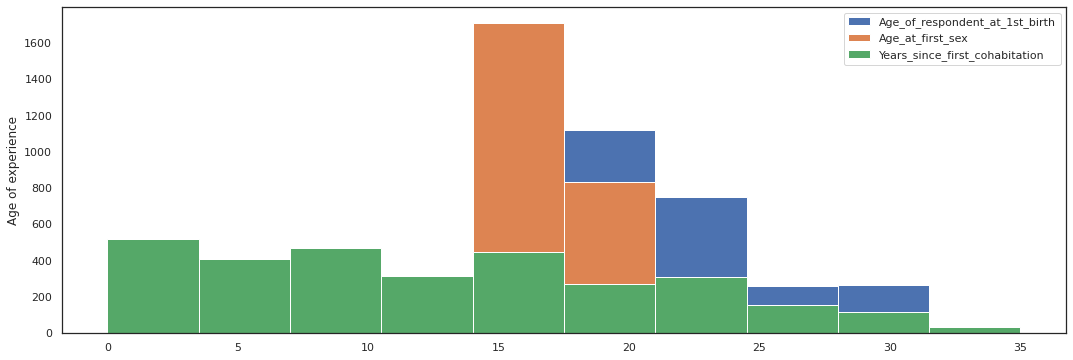

In [ ]:
df.plot(kind='hist', y=['Age_of_respondent_at_1st_birth', 'Age_at_first_sex','Years_since_first_cohabitation'], x='Respondent_s_age',figsize=(18, 6)).set_ylabel('Age of experience')
plt.show()


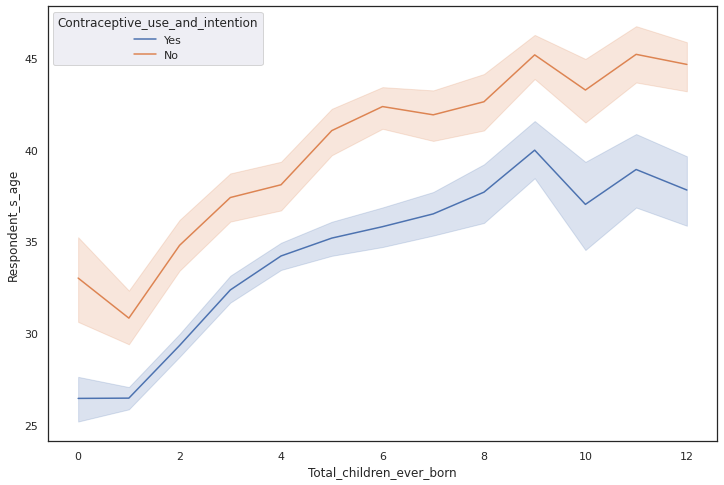

In [ ]:
# Plot the responses for different events and regions
f, ax = plt.subplots(figsize=(12, 8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Total_children_ever_born", y="Respondent_s_age",
             hue="Contraceptive_use_and_intention", data=df)

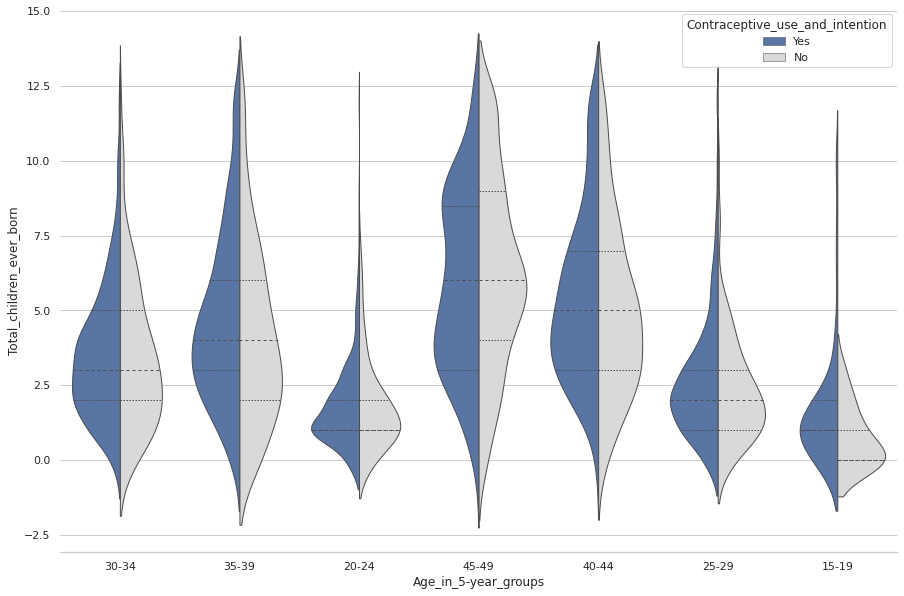

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="Age_in_5-year_groups", y="Total_children_ever_born", hue="Contraceptive_use_and_intention",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

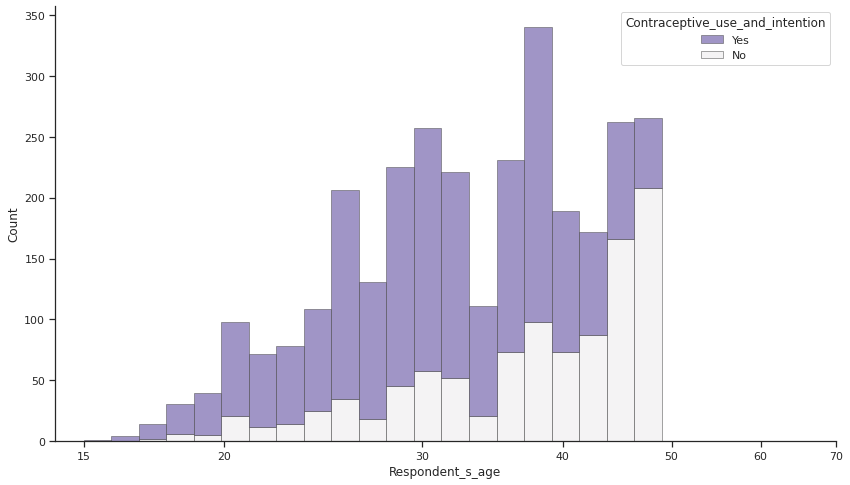

In [ ]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(14, 8))
sns.despine(f)

sns.histplot(
    df,
    x="Respondent_s_age", hue="Contraceptive_use_and_intention", 
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([15, 20, 30, 40, 50,60, 70])

[Text(0, 0.5, '')]

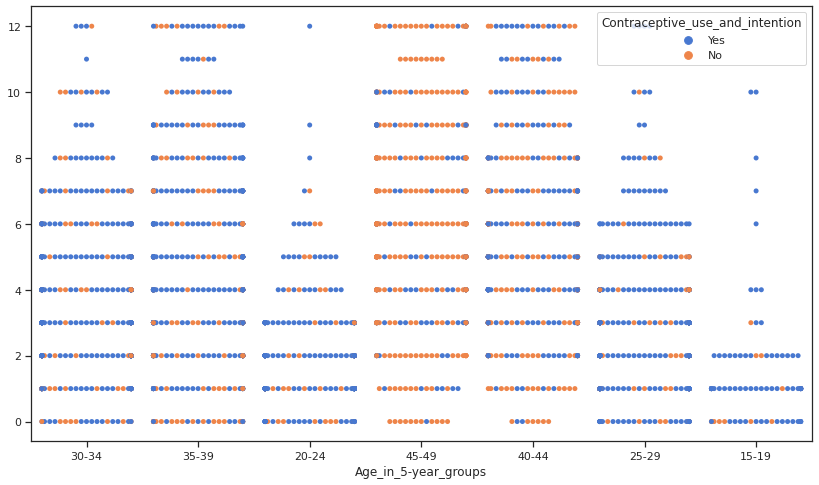

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(14, 8))
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="Age_in_5-year_groups", y="Total_children_ever_born", hue="Contraceptive_use_and_intention")
ax.set(ylabel="")

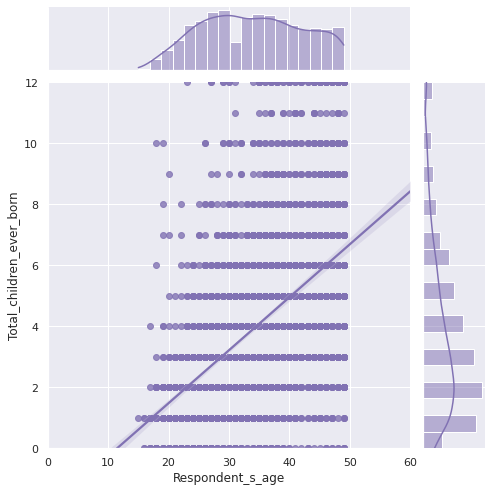

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="Respondent_s_age", y="Total_children_ever_born", data=df,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

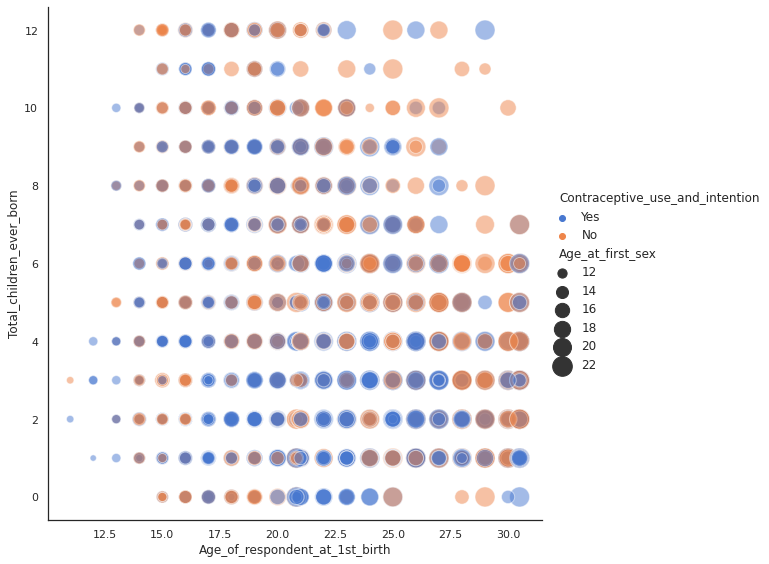

In [ ]:
sns.set_theme(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Age_of_respondent_at_1st_birth", y="Total_children_ever_born", hue="Contraceptive_use_and_intention",size="Age_at_first_sex",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=8, data=df)

Text(0, 0.5, 'Age group')

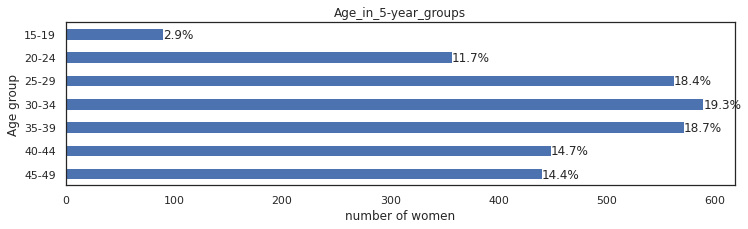

In [ ]:
# Let's see what the distribution of the quality column looks like:
ax = df['Age_in_5-year_groups'].value_counts().sort_index(ascending=False).plot.barh(title='Age_in_5-year_groups', figsize=(12, 3))
for bar in ax.patches:
  ax.text(bar.get_width(),bar.get_y() + bar.get_height()/6,f'{bar.get_width()/df.shape[0]:.1%}')
plt.xlabel('number of women')
plt.ylabel('Age group')


In [ ]:
# Summarise dataframe using pivot table
groupman=pd.pivot_table(df,values='Contraceptive_use_and_intention', index=['Age_in_5-year_groups'],columns=['Age_first_sex'], aggfunc='count', fill_value=0, margins=True)/df.shape[0]*100
groupman

Age_first_sex,15-19,20-24,8-14,All
Age_in_5-year_groups,,,,
15-19,1.57,0.00,1.37,2.94
20-24,8.34,0.43,2.91,11.68
25-29,13.64,2.16,2.58,18.38
30-34,12.33,3.73,3.21,19.27
35-39,12.01,3.89,2.78,18.68
40-44,9.19,3.70,1.77,14.65
45-49,9.22,3.66,1.50,14.39
All,66.31,17.57,16.13,100.00


In [ ]:
# Summarise dataframe using pivot table
groman=pd.pivot_table(df,values='Method_type', index=['Age_in_5-year_groups'],columns=['Age_first_sex'], aggfunc='count', fill_value=0, margins=True)/df.shape[0]*100
groman

Age_first_sex,15-19,20-24,8-14,All
Age_in_5-year_groups,,,,
15-19,1.57,0.00,1.37,2.94
20-24,8.34,0.43,2.91,11.68
25-29,13.64,2.16,2.58,18.38
30-34,12.33,3.73,3.21,19.27
35-39,12.01,3.89,2.78,18.68
40-44,9.19,3.70,1.77,14.65
45-49,9.22,3.66,1.50,14.39
All,66.31,17.57,16.13,100.00


In [ ]:
# Summarise dataframe using pivot table
group=pd.pivot_table(df,values='Contraceptive_use_and_intention', index=['Age_first_sex'],columns=['Age_first_cohabitation'], aggfunc='count', fill_value=0, margins=True)/df.shape[0]*100
group

Age_first_cohabitation,15-19,20-24,25-29,30-34,8-14,All
Age_first_sex,,,,,,
15-19,31.08,22.87,9.16,2.32,0.88,66.31
20-24,0.36,7.82,6.54,2.81,0.03,17.57
8-14,8.93,2.68,0.92,0.46,3.14,16.13
All,40.37,33.37,16.62,5.59,4.06,100.00


In [ ]:
df.columns.tolist()

['Respondent_s_age',
 'Age_in_5-year_groups',
 'Region',
 'Place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Wealth_index_combined',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Number_of_living_children',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Current_contraceptive_method',
 'Method_type',
 'Contraceptive_use_and_intention',
 'Visited_health_facility_last_12_months',
 'At_health_facility_told_of_family_planning',
 'On_radio_heard_about_Family_Planning',
 'On_TV_saw_about_Family_Planning_',
 'Discussed_Family_Planning_with_health_worker_',
 'Contraception_is_woman_s_business',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Age_at_first_sex',
 'Sexual_activity',
 'Fertility_preference',
 'Hu

In [ ]:
grouped=['Age_in_5-year_groups',
 'Number_of_household_members',
 'Total_children_ever_born',
 'Household_members',
 'Lifetime_sex',
 'Children_5_and_under_in_household',
 'Age_at_1st_birth',
 'Total_children',
 'Births_in_five_years',
 'Age_recent_child',
 'Age_first_cohabitation',
 'Age_first_sex',
 'Husband_s_age']

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
data = df.copy(deep=True)
data=pd.get_dummies(data, drop_first=True)
cols=data.columns
scaler = preprocessing.MinMaxScaler()
scaler.fit(data[cols])
datascale=scaler.fit_transform(data[cols])
datascale=pd.DataFrame(datascale, columns=cols)
datascale.head()

,Respondent_s_age,Number_of_household_members,Number_of_children_5_and_under_in_household,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Number_of_living_children,Total_children_ever_born,Age_of_most_recent_child,More_than_once_unions,Age_at_first_cohabitation,Years_since_first_cohabitation,Age_at_first_sex,Sexual_activity,Husband_partner_s_age,Health_care_s_decision-maker,Lifetime_sex_partners,Age_in_5-year_groups_20-24,Age_in_5-year_groups_25-29,Age_in_5-year_groups_30-34,Age_in_5-year_groups_35-39,Age_in_5-year_groups_40-44,Age_in_5-year_groups_45-49,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Ouest,Region_Sud,Region_Sud-Est,Place_of_residence_Urban,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Protestant,Religion_Vaudousant,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Current_contraceptive_method_IUD,Current_contraceptive_method_Implants/Norplant,Current_contraceptive_method_Injections,Current_contraceptive_method_Lactational amenorrhea (LAM),Current_contraceptive_method_Male condom,Current_contraceptive_method_Male sterilization,Current_contraceptive_method_Not using,Current_contraceptive_method_Pill,Method_type_No method,Contraceptive_use_and_intention_Yes,Visited_health_facility_last_12_months_Yes,At_health_facility_told_of_family_planning_Yes,On_radio_heard_about_Family_Planning_Yes,On_TV_saw_about_Family_Planning__Yes,Discussed_Family_Planning_with_health_worker__Yes,Contraception_is_woman_s_business_Disagree,Contraception_is_woman_s_business_Don't know,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Covered_by_health_insurance_Yes,Fertility_preference_No more,Husband_s_desire_for_children_Don't know,Husband_s_desire_for_children_Husband wants fewer,Husband_s_desire_for_children_Husband wants more,Raison_for_contraception_No raison,Raison_for_contraception_Spacing,Husband_partner_s_education_level_Higher,Husband_partner_s_education_level_No education,Husband_partner_s_education_level_Primary,Husband_partner_s_education_level_Secondary,Husband_partner_s_occupation_Other,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales/Agricultural/self_employed,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_s_occupation_Sales/Agricultural/self_employed,Household_members_4-7,Household_members_8-14,Lifetime_sex_4-7,Children_5_and_under_in_household_4-7,Age_at_1st_birth_20-24,Age_at_1st_birth_25-29,Age_at_1st_birth_30-34,Age_at_1st_birth_8-14,Total_children_4-7,Total_children_8-14,Age_recent_child_15-19,Age_recent_child_4-7,Age_recent_child_8-14,Age_first_cohabitation_20-24,Age_first_cohabitation_25-29,Age_first_cohabitation_30-34,Age_first_cohabitation_8-14,Age_first_sex_20-24,Age_first_sex_8-14,Husband_s_age_20-24,Husband_s_age_25-29,Husband_s_age_30-34,Husband_s_age_34-39,Husband_s_age_40-44,Husband_s_age_45-49,Husband_s_age_50-54,Husband_s_age_55-60,Husband_s_age_64-69
0,0.47,0.21,0.40,1.00,0.41,0.00,0.43,0.25,0.06,0.00,0.74,0.11,0.38,1.00,0.25,0.00,0.20,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.68,0.32,0.20,0.40,1.00,1.00,0.29,0.25,0.19,0.00,0.83,0.23,0.62,1.00,0.41,1.00,0.20,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00

In [ ]:
'Contraceptive_use_and_intention_Yes' in data.columns

True

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# VIF dataframe
def factors(data='data'):
  vif_data = pd.DataFrame()
  vif_data["feature"] = data.columns
  
# calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  features_selected =list(vif_data[vif_data.VIF <=4]['feature'])
  data=data[features_selected]
  return data.head()

In [ ]:
factors(data)

,Knowledge_of_ovulatory_cycle,More_than_once_unions,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Ouest,Region_Sud,Region_Sud-Est,Place_of_residence_Urban,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Current_contraceptive_method_IUD,Current_contraceptive_method_Implants/Norplant,Current_contraceptive_method_Lactational amenorrhea (LAM),Current_contraceptive_method_Male condom,Current_contraceptive_method_Male sterilization,Current_contraceptive_method_Pill,Visited_health_facility_last_12_months_Yes,At_health_facility_told_of_family_planning_Yes,On_radio_heard_about_Family_Planning_Yes,On_TV_saw_about_Family_Planning__Yes,Discussed_Family_Planning_with_health_worker__Yes,Contraception_is_woman_s_business_Don't know,Women_who_use_contraception_become_promiscuous_Don't know,Covered_by_health_insurance_Yes,Husband_s_desire_for_children_Don't know,Husband_s_desire_for_children_Husband wants fewer,Husband_s_desire_for_children_Husband wants more,Raison_for_contraception_No raison,Raison_for_contraception_Spacing,Husband_partner_s_occupation_Other,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Lifetime_sex_4-7,Children_5_and_under_in_household_4-7,Age_at_1st_birth_8-14,Age_first_cohabitation_8-14,Age_first_sex_20-24,Age_first_sex_8-14,Husband_s_age_64-69
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns.tolist()

['Respondent_s_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Number_of_living_children',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Age_at_first_sex',
 'Sexual_activity',
 'Husband_partner_s_age',
 'Health_care_s_decision-maker',
 'Lifetime_sex_partners',
 'Age_in_5-year_groups_20-24',
 'Age_in_5-year_groups_25-29',
 'Age_in_5-year_groups_30-34',
 'Age_in_5-year_groups_35-39',
 'Age_in_5-year_groups_40-44',
 'Age_in_5-year_groups_45-49',
 'Region_Centre',
 "Region_Grand'Anse",
 'Region_Nippes',
 'Region_Nord',
 'Region_Nord-Est',
 'Region_Nord-Ouest',
 'Region_Ouest',
 'Region_Sud',
 'Region_Sud-Est',
 'Place_of_residence_Urban',
 'Highest_educational_level_No education',
 'Highest_educational_level_Primary',
 'Highest_educational_level_Secon

In [ ]:
seldata=['Contraceptive_use_and_intention_Yes','Respondent_s_age',
 'Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Number_of_living_children',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Age_at_first_sex',
 'Sexual_activity',
 'Husband_partner_s_age',
 'Health_care_s_decision-maker',
 'Place_of_residence_Urban',
 'Highest_educational_level_No education',
 'Highest_educational_level_Primary',
 'Highest_educational_level_Secondary',
 'Religion_Catholic',
 'Religion_No religion',
 'Religion_Protestant',
 'Religion_Vaudousant',
 'Wealth_index_combined_Poorer',
 'Wealth_index_combined_Poorest',
 'Wealth_index_combined_Richer',
 'Wealth_index_combined_Richest',
 'Visited_health_facility_last_12_months_Yes',
 'At_health_facility_told_of_family_planning_Yes',
 'On_radio_heard_about_Family_Planning_Yes',
 'On_TV_saw_about_Family_Planning__Yes',
 'Discussed_Family_Planning_with_health_worker__Yes',
 'Contraception_is_woman_s_business_Disagree',
 "Contraception_is_woman_s_business_Don't know",
 'Women_who_use_contraception_become_promiscuous_Disagree',
 "Women_who_use_contraception_become_promiscuous_Don't know",
 'Covered_by_health_insurance_Yes',
 'Fertility_preference_No more',
 'Raison_for_contraception_No raison',
 'Raison_for_contraception_Spacing',
 'Husband_partner_s_education_level_Higher',
 'Husband_partner_s_education_level_No education',
 'Husband_partner_s_education_level_Primary',
 'Husband_partner_s_education_level_Secondary',
 'Husband_partner_s_occupation_Other',
 'Husband_partner_s_occupation_Professional/technical/managerial',
 'Husband_partner_s_occupation_Sales/Agricultural/self_employed',
 'Respondent_s_occupation_Other',
 'Respondent_s_occupation_Professional/technical/managerial',
 'Respondent_s_occupation_Sales/Agricultural/self_employed']

In [ ]:
selsave=['Contraceptive_use_and_intention','Respondent_s_age',
 'Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Number_of_living_children',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Age_at_first_sex',
 'Sexual_activity',
 'Husband_partner_s_age',
 'Health_care_s_decision-maker',
 'Place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Visited_health_facility_last_12_months',
 'At_health_facility_told_of_family_planning',
 'On_radio_heard_about_Family_Planning',
 'On_TV_saw_about_Family_Planning_',
 'Discussed_Family_Planning_with_health_worker_',
 'Contraception_is_woman_s_business',
 "Women_who_use_contraception_become_promiscuous",
 'Covered_by_health_insurance',
 'Fertility_preference',
 'Raison_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation']

In [ ]:
df=df[selsave]
df.head()

,Contraceptive_use_and_intention,Respondent_s_age,Number_of_children_5_and_under_in_household,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Number_of_living_children,Total_children_ever_born,Age_of_most_recent_child,More_than_once_unions,Age_at_first_cohabitation,Years_since_first_cohabitation,Age_at_first_sex,Sexual_activity,Husband_partner_s_age,Health_care_s_decision-maker,Place_of_residence,Highest_educational_level,Religion,Wealth_index_combined,Visited_health_facility_last_12_months,At_health_facility_told_of_family_planning,On_radio_heard_about_Family_Planning,On_TV_saw_about_Family_Planning_,Discussed_Family_Planning_with_health_worker_,Contraception_is_woman_s_business,Women_who_use_contraception_become_promiscuous,Covered_by_health_insurance,Fertility_preference,Raison_for_contraception,Husband_partner_s_education_level,Husband_partner_s_occupation,Respondent_s_occupation
0,Yes,31,2.00,2.50,19.00,0,3.00,3.00,1.00,0,27.00,4,15.00,1,31.00,0,Rural,Primary,Catholic,Middle,Yes,No,No,No,No,Disagree,Disagree,No,No more,Limiting,Primary,Professional/technical/managerial,Sales/Agricultural/self_employed
1,Yes,38,1.00,1.00,30.50,1,2.00,3.00,3.00,0,29.00,8,18.00,1,39.00,1,Rural,Higher,Catholic,Middle,Yes,No,Yes,No,No,Agree,Disagree,No,No more,Limiting,Higher,Professional/technical/managerial,Professional/technical/managerial
2,Yes,38,1.00,1.00,28.00,0,4.00,4.00,1.00,0,28.00,10,22.50,1,36.00,0,Rural,Secondary,Protestant,Middle,Yes,No,Yes,No,Yes,Disagree,Disagree,No,No more,Limiting,Secondary,Professional/technical/managerial,Not working
3,Yes,35,0.00,0.00,23.00,0,2.00,4.00,7.00,0,22.00,12,18.00,1,42.00,0,Rural,Secondary,Catholic,Middle,Yes,No,No,No,No,Disagree,Disagree,No,Have another,Spacing,Secondary,Professional/technical/managerial,Sales/Agricultural/self_employed
4,Yes,37,1.00,1.00,18.00,0,5.00,5.00,3.00,0,18.00,19,17.00,1,53.00,1,Rural,Secondary,Catholic,Poorer,No,No,No,No,Yes,Agree,Agree,No,No more,Limiting,No education,Sales/Agricultural/self_employed,Sales/Agricultural/self_employed


In [ ]:
# cols=df.columns.difference(['Contraceptive_use_and_intention'])
df=pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Respondent_s_age,Number_of_children_5_and_under_in_household,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Number_of_living_children,Total_children_ever_born,Age_of_most_recent_child,More_than_once_unions,Age_at_first_cohabitation,Years_since_first_cohabitation,Age_at_first_sex,Sexual_activity,Husband_partner_s_age,Health_care_s_decision-maker,Contraceptive_use_and_intention_Yes,Place_of_residence_Urban,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Protestant,Religion_Vaudousant,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Visited_health_facility_last_12_months_Yes,At_health_facility_told_of_family_planning_Yes,On_radio_heard_about_Family_Planning_Yes,On_TV_saw_about_Family_Planning__Yes,Discussed_Family_Planning_with_health_worker__Yes,Contraception_is_woman_s_business_Disagree,Contraception_is_woman_s_business_Don't know,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Covered_by_health_insurance_Yes,Fertility_preference_No more,Raison_for_contraception_No raison,Raison_for_contraception_Spacing,Husband_partner_s_education_level_Higher,Husband_partner_s_education_level_No education,Husband_partner_s_education_level_Primary,Husband_partner_s_education_level_Secondary,Husband_partner_s_occupation_Other,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales/Agricultural/self_employed,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_s_occupation_Sales/Agricultural/self_employed
0,31,2.00,2.50,19.00,0,3.00,3.00,1.00,0,27.00,4,15.00,1,31.00,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1,38,1.00,1.00,30.50,1,2.00,3.00,3.00,0,29.00,8,18.00,1,39.00,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,38,1.00,1.00,28.00,0,4.00,4.00,1.00,0,28.00,10,22.50,1,36.00,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,35,0.00,0.00,23.00,0,2.00,4.00,7.00,0,22.00,12,18.00,1,42.00,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
4,37,1.00,1.00,18.00,0,5.00,5.00,3.00,0,18.00,19,17.00,1,53.00,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
factors(df)

,Knowledge_of_ovulatory_cycle,More_than_once_unions,Contraceptive_use_and_intention_Yes,Place_of_residence_Urban,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Visited_health_facility_last_12_months_Yes,At_health_facility_told_of_family_planning_Yes,On_radio_heard_about_Family_Planning_Yes,On_TV_saw_about_Family_Planning__Yes,Discussed_Family_Planning_with_health_worker__Yes,Contraception_is_woman_s_business_Don't know,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Covered_by_health_insurance_Yes,Raison_for_contraception_No raison,Raison_for_contraception_Spacing,Husband_partner_s_occupation_Other,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Features and target
X = df.drop('Contraceptive_use_and_intention_Yes', axis=1) # features
y = df['Contraceptive_use_and_intention_Yes'] # target

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 51.243296
         Iterations: 35
                                    Logit Regression Results                                   
Dep. Variable:     Contraceptive_use_and_intention_Yes   No. Observations:                 3057
Model:                                           Logit   Df Residuals:                     3007
Method:                                            MLE   Df Model:                           49
Date:                                 Thu, 07 Oct 2021   Pseudo R-squ.:                     inf
Time:                                         08:57:46   Log-Likelihood:            -1.5665e+05
converged:                                       False   LL-Null:                        0.0000
Covariance Type:                             nonrobust   LLR p-value:                     1.000
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

In [ ]:
data=data[seldata]
data.head()

,Contraceptive_use_and_intention_Yes,Respondent_s_age,Number_of_children_5_and_under_in_household,Births_in_last_five_years,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Number_of_living_children,Total_children_ever_born,Age_of_most_recent_child,More_than_once_unions,Age_at_first_cohabitation,Years_since_first_cohabitation,Age_at_first_sex,Sexual_activity,Husband_partner_s_age,Health_care_s_decision-maker,Place_of_residence_Urban,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Protestant,Religion_Vaudousant,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Visited_health_facility_last_12_months_Yes,At_health_facility_told_of_family_planning_Yes,On_radio_heard_about_Family_Planning_Yes,On_TV_saw_about_Family_Planning__Yes,Discussed_Family_Planning_with_health_worker__Yes,Contraception_is_woman_s_business_Disagree,Contraception_is_woman_s_business_Don't know,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Covered_by_health_insurance_Yes,Fertility_preference_No more,Raison_for_contraception_No raison,Raison_for_contraception_Spacing,Husband_partner_s_education_level_Higher,Husband_partner_s_education_level_No education,Husband_partner_s_education_level_Primary,Husband_partner_s_education_level_Secondary,Husband_partner_s_occupation_Other,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales/Agricultural/self_employed,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial,Respondent_s_occupation_Sales/Agricultural/self_employed
0,1,31,2.00,2.50,19.00,0,3.00,3.00,1.00,0,27.00,4,15.00,1,31.00,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1,1,38,1.00,1.00,30.50,1,2.00,3.00,3.00,0,29.00,8,18.00,1,39.00,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,1,38,1.00,1.00,28.00,0,4.00,4.00,1.00,0,28.00,10,22.50,1,36.00,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,1,35,0.00,0.00,23.00,0,2.00,4.00,7.00,0,22.00,12,18.00,1,42.00,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
4,1,37,1.00,1.00,18.00,0,5.00,5.00,3.00,0,18.00,19,17.00,1,53.00,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
factors(data[seldata])

,Contraceptive_use_and_intention_Yes,Knowledge_of_ovulatory_cycle,More_than_once_unions,Place_of_residence_Urban,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Visited_health_facility_last_12_months_Yes,At_health_facility_told_of_family_planning_Yes,On_radio_heard_about_Family_Planning_Yes,On_TV_saw_about_Family_Planning__Yes,Discussed_Family_Planning_with_health_worker__Yes,Contraception_is_woman_s_business_Don't know,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Covered_by_health_insurance_Yes,Raison_for_contraception_No raison,Raison_for_contraception_Spacing,Husband_partner_s_occupation_Other,Respondent_s_occupation_Other,Respondent_s_occupation_Professional/technical/managerial
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns.tolist()

['Contraceptive_use_and_intention_Yes',
 'Respondent_s_age',
 'Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Number_of_living_children',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Age_at_first_sex',
 'Sexual_activity',
 'Husband_partner_s_age',
 'Health_care_s_decision-maker',
 'Place_of_residence_Urban',
 'Highest_educational_level_No education',
 'Highest_educational_level_Primary',
 'Highest_educational_level_Secondary',
 'Religion_Catholic',
 'Religion_No religion',
 'Religion_Protestant',
 'Religion_Vaudousant',
 'Wealth_index_combined_Poorer',
 'Wealth_index_combined_Poorest',
 'Wealth_index_combined_Richer',
 'Wealth_index_combined_Richest',
 'Visited_health_facility_last_12_months_Yes',
 'At_health_facility_told_of_family_planning_Yes',
 'On_radio_heard_about_Family_Plannin

In [ ]:
# Features and target
X = data.drop('Contraceptive_use_and_intention_Yes', axis=1) # features
y = data['Contraceptive_use_and_intention_Yes'] # target

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 51.243296
         Iterations: 35
                                    Logit Regression Results                                   
Dep. Variable:     Contraceptive_use_and_intention_Yes   No. Observations:                 3057
Model:                                           Logit   Df Residuals:                     3007
Method:                                            MLE   Df Model:                           49
Date:                                 Thu, 07 Oct 2021   Pseudo R-squ.:                     inf
Time:                                         08:04:23   Log-Likelihood:            -1.5665e+05
converged:                                       False   LL-Null:                        0.0000
Covariance Type:                             nonrobust   LLR p-value:                     1.000
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

In [ ]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

X_train: (2139, 50) 
X_test: (918, 50) 
y_train: (2139,) 
y_test: (918,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print('After OverSampling : the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling : the shape of train_y: {} \n'.format(y_train_smote.shape))
 
print("After OverSampling : counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling : counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, counts of label '1': 1414
Before OverSampling, counts of label '0': 725 

After OverSampling : the shape of train_X: (2828, 50)
After OverSampling : the shape of train_y: (2828,) 

After OverSampling : counts of label '1': 1414
After OverSampling : counts of label '0': 1414


In [ ]:
seed=2
X_train_smote,X_test,y_train_smote,y_test = train_test_split(X,y,test_size =0.3,random_state=seed)

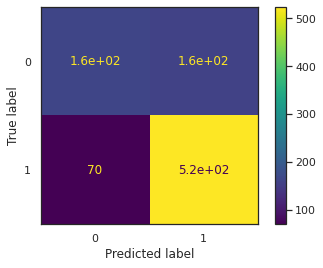

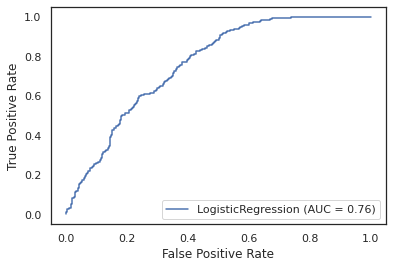

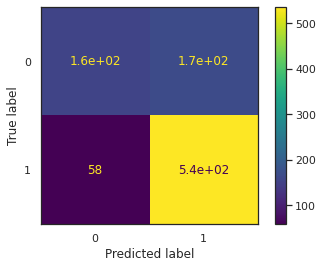

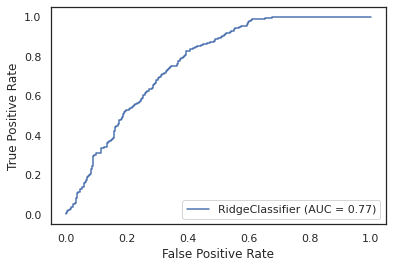

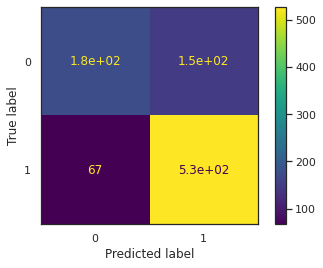

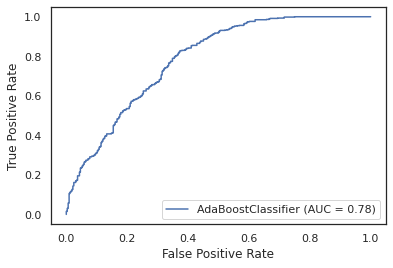

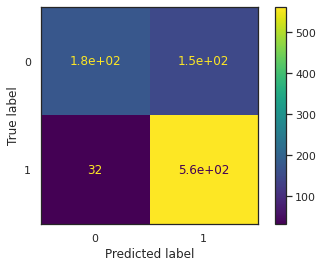

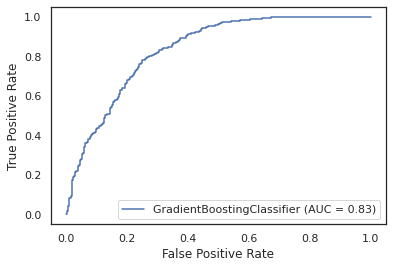

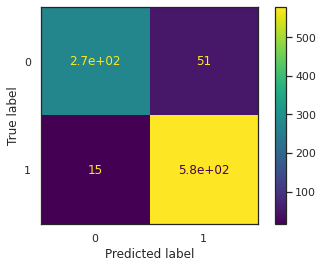

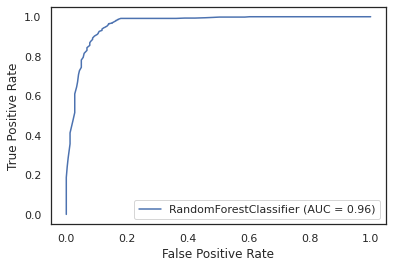

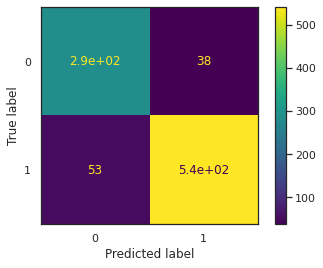

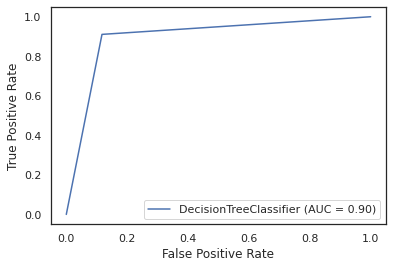

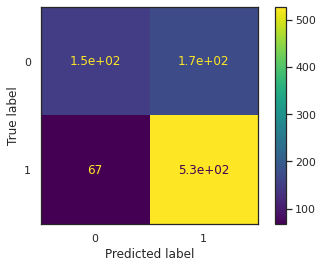

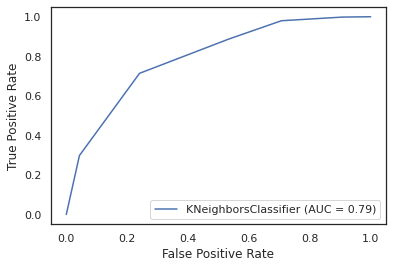

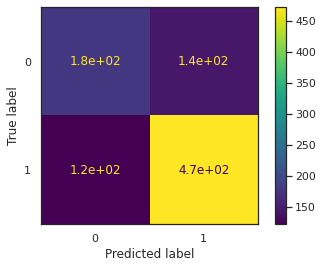

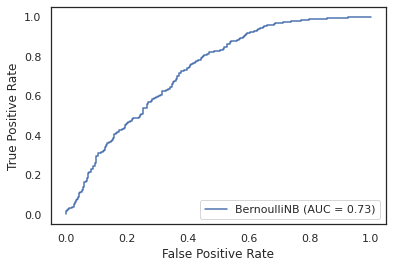

In [ ]:
# Let's a machine leraning model that fit the data
import time
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","NaiveBayes"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),BernoulliNB()]
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)

unmethod = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [ ]:
unmethod.sort_values(by='scores', ascending=False)

,names,scores,times
4,RandomForestClassifier,0.93,0.40
5,DecisionTreeClassifier,0.90,0.02
3,GradientBoostingClassifier,0.80,0.57
2,AdaBoostClassifier,0.76,0.22
1,RidgeClassifier,0.75,0.02
0,LogisticRegression,0.75,0.08
6,KNeighborsClassifier,0.74,0.01
7,NaiveBayes,0.71,0.00


In [ ]:
for model,name in zip(models[:],model_names[:]):
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test,y_pred))

LogisticRegression
              precision    recall  f1-score   support

           0       0.70      0.51      0.59       324
           1       0.77      0.88      0.82       594

    accuracy                           0.75       918
   macro avg       0.73      0.69      0.70       918
weighted avg       0.74      0.75      0.74       918

RidgeClassifier
              precision    recall  f1-score   support

           0       0.73      0.48      0.58       324
           1       0.76      0.90      0.83       594

    accuracy                           0.75       918
   macro avg       0.75      0.69      0.70       918
weighted avg       0.75      0.75      0.74       918

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.72      0.54      0.62       324
           1       0.78      0.89      0.83       594

    accuracy                           0.76       918
   macro avg       0.75      0.71      0.72       918
weighted avg       0

##**Copy of the Dataset**

In [ ]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

X_train: (2139, 50) 
X_test: (918, 50) 
y_train: (2139,) 
y_test: (918,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print('After OverSampling : the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling : the shape of train_y: {} \n'.format(y_train_smote.shape))
 
print("After OverSampling : counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling : counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, counts of label '1': 1414
Before OverSampling, counts of label '0': 725 

After OverSampling : the shape of train_X: (2828, 50)
After OverSampling : the shape of train_y: (2828,) 

After OverSampling : counts of label '1': 1414
After OverSampling : counts of label '0': 1414


In [ ]:
seed=2
X_train_smote,X_test,y_train_smote,y_test = train_test_split(X,y,test_size =0.3,random_state=seed)

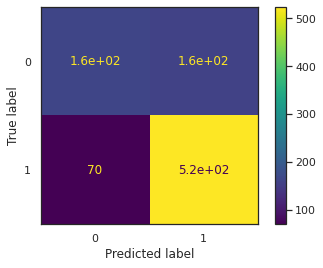

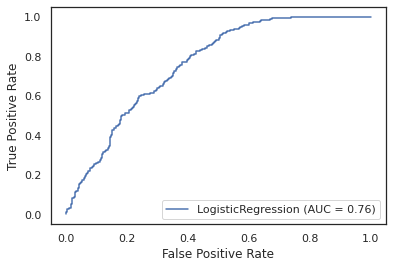

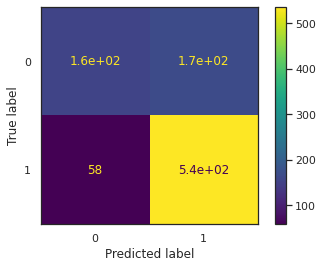

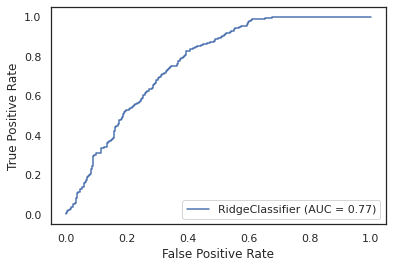

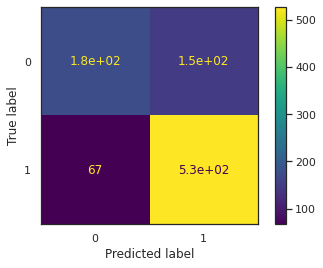

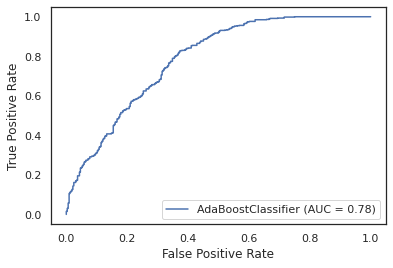

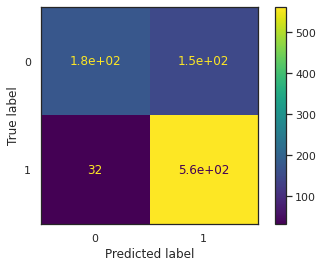

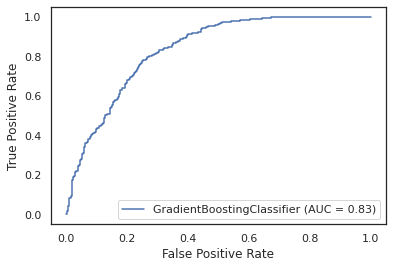

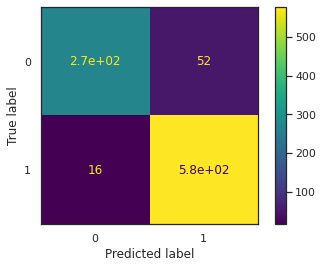

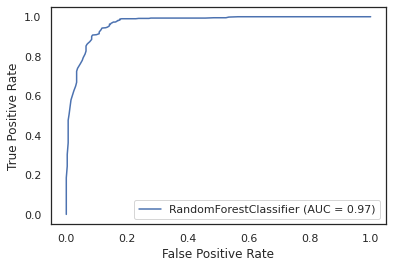

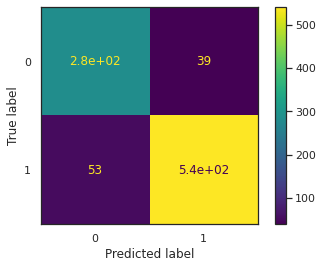

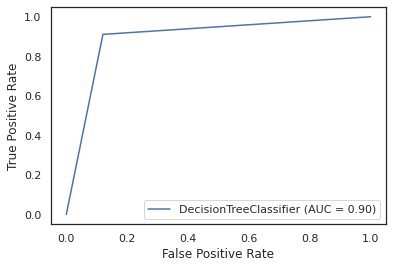

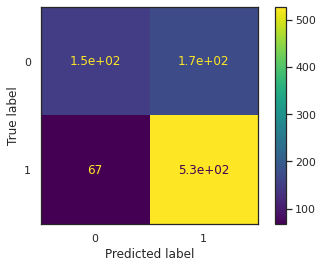

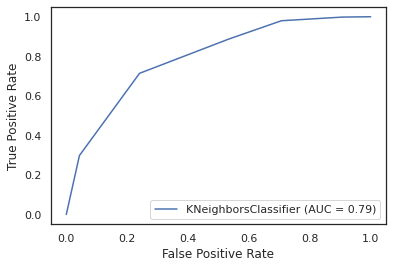

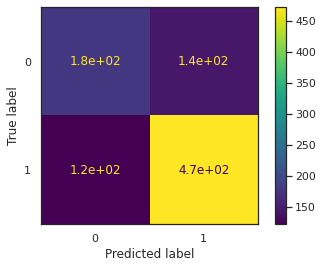

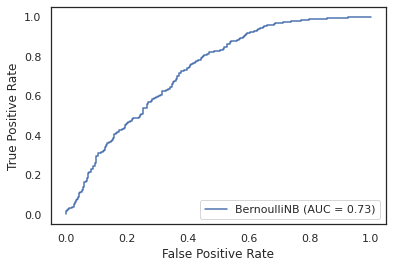

In [ ]:
# Let's a machine leraning model that fit the data
import time
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","NaiveBayes"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),BernoulliNB()]
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)

unmethod = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [ ]:
unmethod.sort_values(by='scores', ascending=False)

,names,scores,times
4,RandomForestClassifier,0.93,0.39
5,DecisionTreeClassifier,0.90,0.02
3,GradientBoostingClassifier,0.80,0.56
2,AdaBoostClassifier,0.76,0.24
1,RidgeClassifier,0.75,0.01
0,LogisticRegression,0.75,0.08
6,KNeighborsClassifier,0.74,0.01
7,NaiveBayes,0.71,0.00


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])

In [ ]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]

In [ ]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=3)

In [ ]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search]
for pipe in grids:
    pipe.fit(X_train_smote,y_train_smote)

In [ ]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

Logistic Regression Test Accuracy: 0.7570806100217865
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.7167755991285403
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 4, 'DT__min_samples_leaf': 6, 'DT__min_samples_split': 2}
Random Forest Test Accuracy: 0.775599128540305
Random Forest Best Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 6, 'RF__min_samples_split': 2}
K-Nearest Neighbors Test Accuracy: 0.7233115468409586
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}


In [ ]:
# Create Decision Tree classifer object
clf = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')

# Train Decision Tree Classifer
clf = clf.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7570806100217865


In [ ]:
pd.DataFrame(np.concatenate([clf.intercept_.reshape(-1,1),
                             clf.coef_],axis=1),
             index = ["coef"],
             columns = ["constantes"]+list(X.columns)).T

,coef
constantes,4.20
Respondent_s_age,0.00
Number_of_children_5_and_under_in_household,0.00
Births_in_last_five_years,-0.04
Age_of_respondent_at_1st_birth,0.02
...,...
Husband_partner_s_occupation_Professional/technical/managerial,0.00
Husband_partner_s_occupation_Sales/Agricultural/self_employed,0.04
Respondent_s_occupation_Other,0.20
Respondent_s_occupation_Professional/technical/managerial,0.00


In [ ]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=3, min_samples_split=2)

# Train Decision Tree Classifer
dt = dt.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.7527233115468409


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import GradientBoostingClassifier

#Create a Gaussian Classifier
gdbclf=GradientBoostingClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
gdbclf.fit(X_train,y_train)

gdb_y_pred=gdbclf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, gdb_y_pred))

Accuracy: 0.8028322440087146


In [ ]:
def model_analysis(model='model', true_label='y_test',predicted='y_pred'): 
    '''
    return all metrics results
    '''
    print(f"accuracy :", round((metrics.accuracy_score(true_label, predicted)*100)),'%')
    print("f1 score macro :", round(metrics.f1_score(true_label, predicted, average='macro')*100),'%')    
    print("f1 score micro :", round(metrics.f1_score(true_label, predicted, average='micro')*100),'%')
    print("precision score :", round(metrics.precision_score(true_label, predicted, average='macro')*100),'%') 
    print("recall score :", round(metrics.recall_score(true_label, predicted, average='macro')*100),'%')
    print("hamming_loss :", round(metrics.hamming_loss(true_label, predicted)*100),'%')
    print("classification_report :\n")
    print(metrics.classification_report(true_label, predicted))
    print("jaccard_similarity_score :", round(metrics.jaccard_similarity_score(true_label, predicted)*100),'%')
    print("log_loss :", round(metrics.log_loss(true_label, predicted)))
    print("zero_one_loss :", round(metrics.zero_one_loss(true_label, predicted)*100),'%')
    print("AUC&ROC :", round(metrics.roc_auc_score(true_label, predicted)*100),'%')
    print("matthews_corrcoef :", round(metrics.matthews_corrcoef(true_label, predicted)*100),'%')
    print("confusion matrix")
    plot_confusion_matrix(model,X_test,y_test,cmap="YlGnBu")
    print("ROC and CURVE")
    plot_roc_curve(model,X_test,y_test)

accuracy : 75 %
f1 score macro : 70 %
f1 score micro : 75 %
precision score : 75 %
recall score : 69 %
hamming_loss : 25 %
classification_report :

              precision    recall  f1-score   support

           0       0.74      0.46      0.57       324
           1       0.76      0.91      0.83       594

    accuracy                           0.75       918
   macro avg       0.75      0.69      0.70       918
weighted avg       0.75      0.75      0.73       918

jaccard_similarity_score : 75 %
log_loss : 9
zero_one_loss : 25 %
AUC&ROC : 69 %
matthews_corrcoef : 43 %
confusion matrix
ROC and CURVE


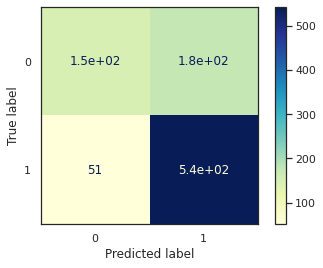

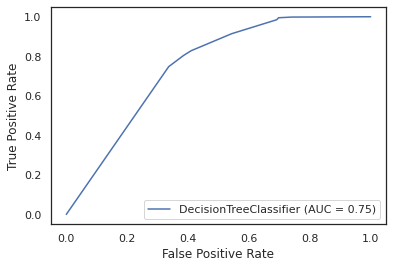

In [ ]:
model_analysis(dt, y_test, y_pred_dt)

accuracy : 76 %
f1 score macro : 70 %
f1 score micro : 76 %
precision score : 75 %
recall score : 69 %
hamming_loss : 24 %
classification_report :

              precision    recall  f1-score   support

           0       0.74      0.48      0.58       324
           1       0.76      0.91      0.83       594

    accuracy                           0.76       918
   macro avg       0.75      0.69      0.70       918
weighted avg       0.75      0.76      0.74       918

jaccard_similarity_score : 76 %
log_loss : 8
zero_one_loss : 24 %
AUC&ROC : 69 %
matthews_corrcoef : 44 %
confusion matrix
ROC and CURVE


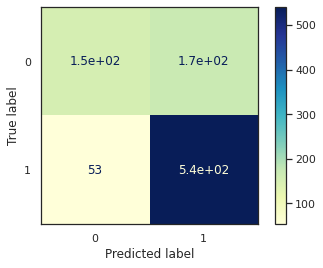

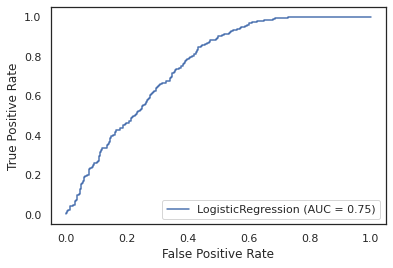

In [ ]:
model_analysis(clf, y_test, y_pred)

accuracy : 77 %
f1 score macro : 72 %
f1 score micro : 77 %
precision score : 77 %
recall score : 70 %
hamming_loss : 23 %
classification_report :

              precision    recall  f1-score   support

           0       0.77      0.49      0.60       324
           1       0.77      0.92      0.84       594

    accuracy                           0.77       918
   macro avg       0.77      0.70      0.72       918
weighted avg       0.77      0.77      0.75       918

jaccard_similarity_score : 77 %
log_loss : 8
zero_one_loss : 23 %
AUC&ROC : 70 %
matthews_corrcoef : 47 %
confusion matrix
ROC and CURVE


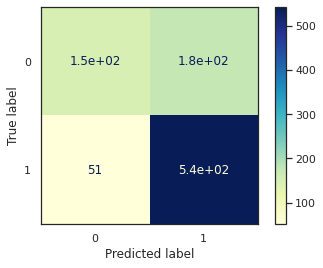

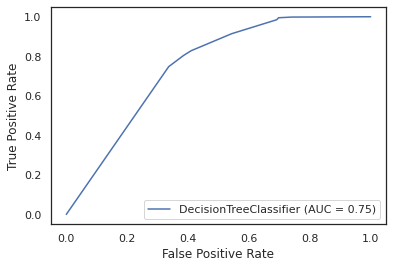

In [ ]:
model_analysis(dt, y_test, gdb_y_pred)

##**Apply Transformation function**

In [ ]:
None in df

False

In [ ]:
unmet.to_excel('bygroup.xlsx')

In [ ]:
changecol=['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Husband_partner_s_age',
 'Total_lifetime_number_of_sex_partners']

In [ ]:
len(changecol)

12

In [ ]:
'None' in unmet.values

False

In [ ]:
unmet['Husband_partner_s_occupation'].unique()

array(['Professional/technical/managerial',
       'Sales/Agricultural/self_employed', 'Other', 'Not working'],
      dtype=object)

In [ ]:
unmet['Respondent_s_occupation'].unique()

array(['Sales/Agricultural/self_employed',
       'Professional/technical/managerial', 'Not working', 'Other'],
      dtype=object)

In [ ]:
sociodemographic=['Respondent_s_current_age',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Total_children_ever_born',
 'Husband_partner_s_age',
 'Age_of_most_recent_child',
 'Age_at_first_cohabitation',
 'Husband_partner_s_education_level']

In [ ]:
economic_factors=['Respondent_s_occupation',
                  'Number_of_trips_in_last_12_months',
                  'Visited_health_facility_last_12_months',
                  'Husband_partner_s_occupation',
                  'Wealth_index_combined',
                  'Covered_by_health_insurance']

In [ ]:
reproductive_factors=['Person_who_usually_decides_on_respondent_s_health_care',
 'Total_lifetime_number_of_sex_partners',
 'Age_at_first_sex',
 'Age_of_respondent_at_1st_birth',
 'Recent_sexual_activity',
 'More_than_once_unions',
 'Births_in_last_five_years',
 'Age_of_most_recent_child']

In [ ]:
planning_factors=['Knowledge_of_ovulatory_cycle',
                  'Contraception_is_woman_s_business_man_should_not_worry',
                  'Women_who_use_contraception_become_promiscuous',
                  'Heard_family_planning_on_radio_last_few_months',
                  'Heard_family_planning_on_TV_last_few_months',
                  'Unmet_need_for_contraception',
                  'Husband_s_desire_for_children',
                  'Type_of_place_of_residence']

In [ ]:
 #ben_cols=unmet.iloc[:, :-1].columns.tolist()
# othercol = Diff(ben_cols, changecol)
#len(othercol)

KeyError: ignored

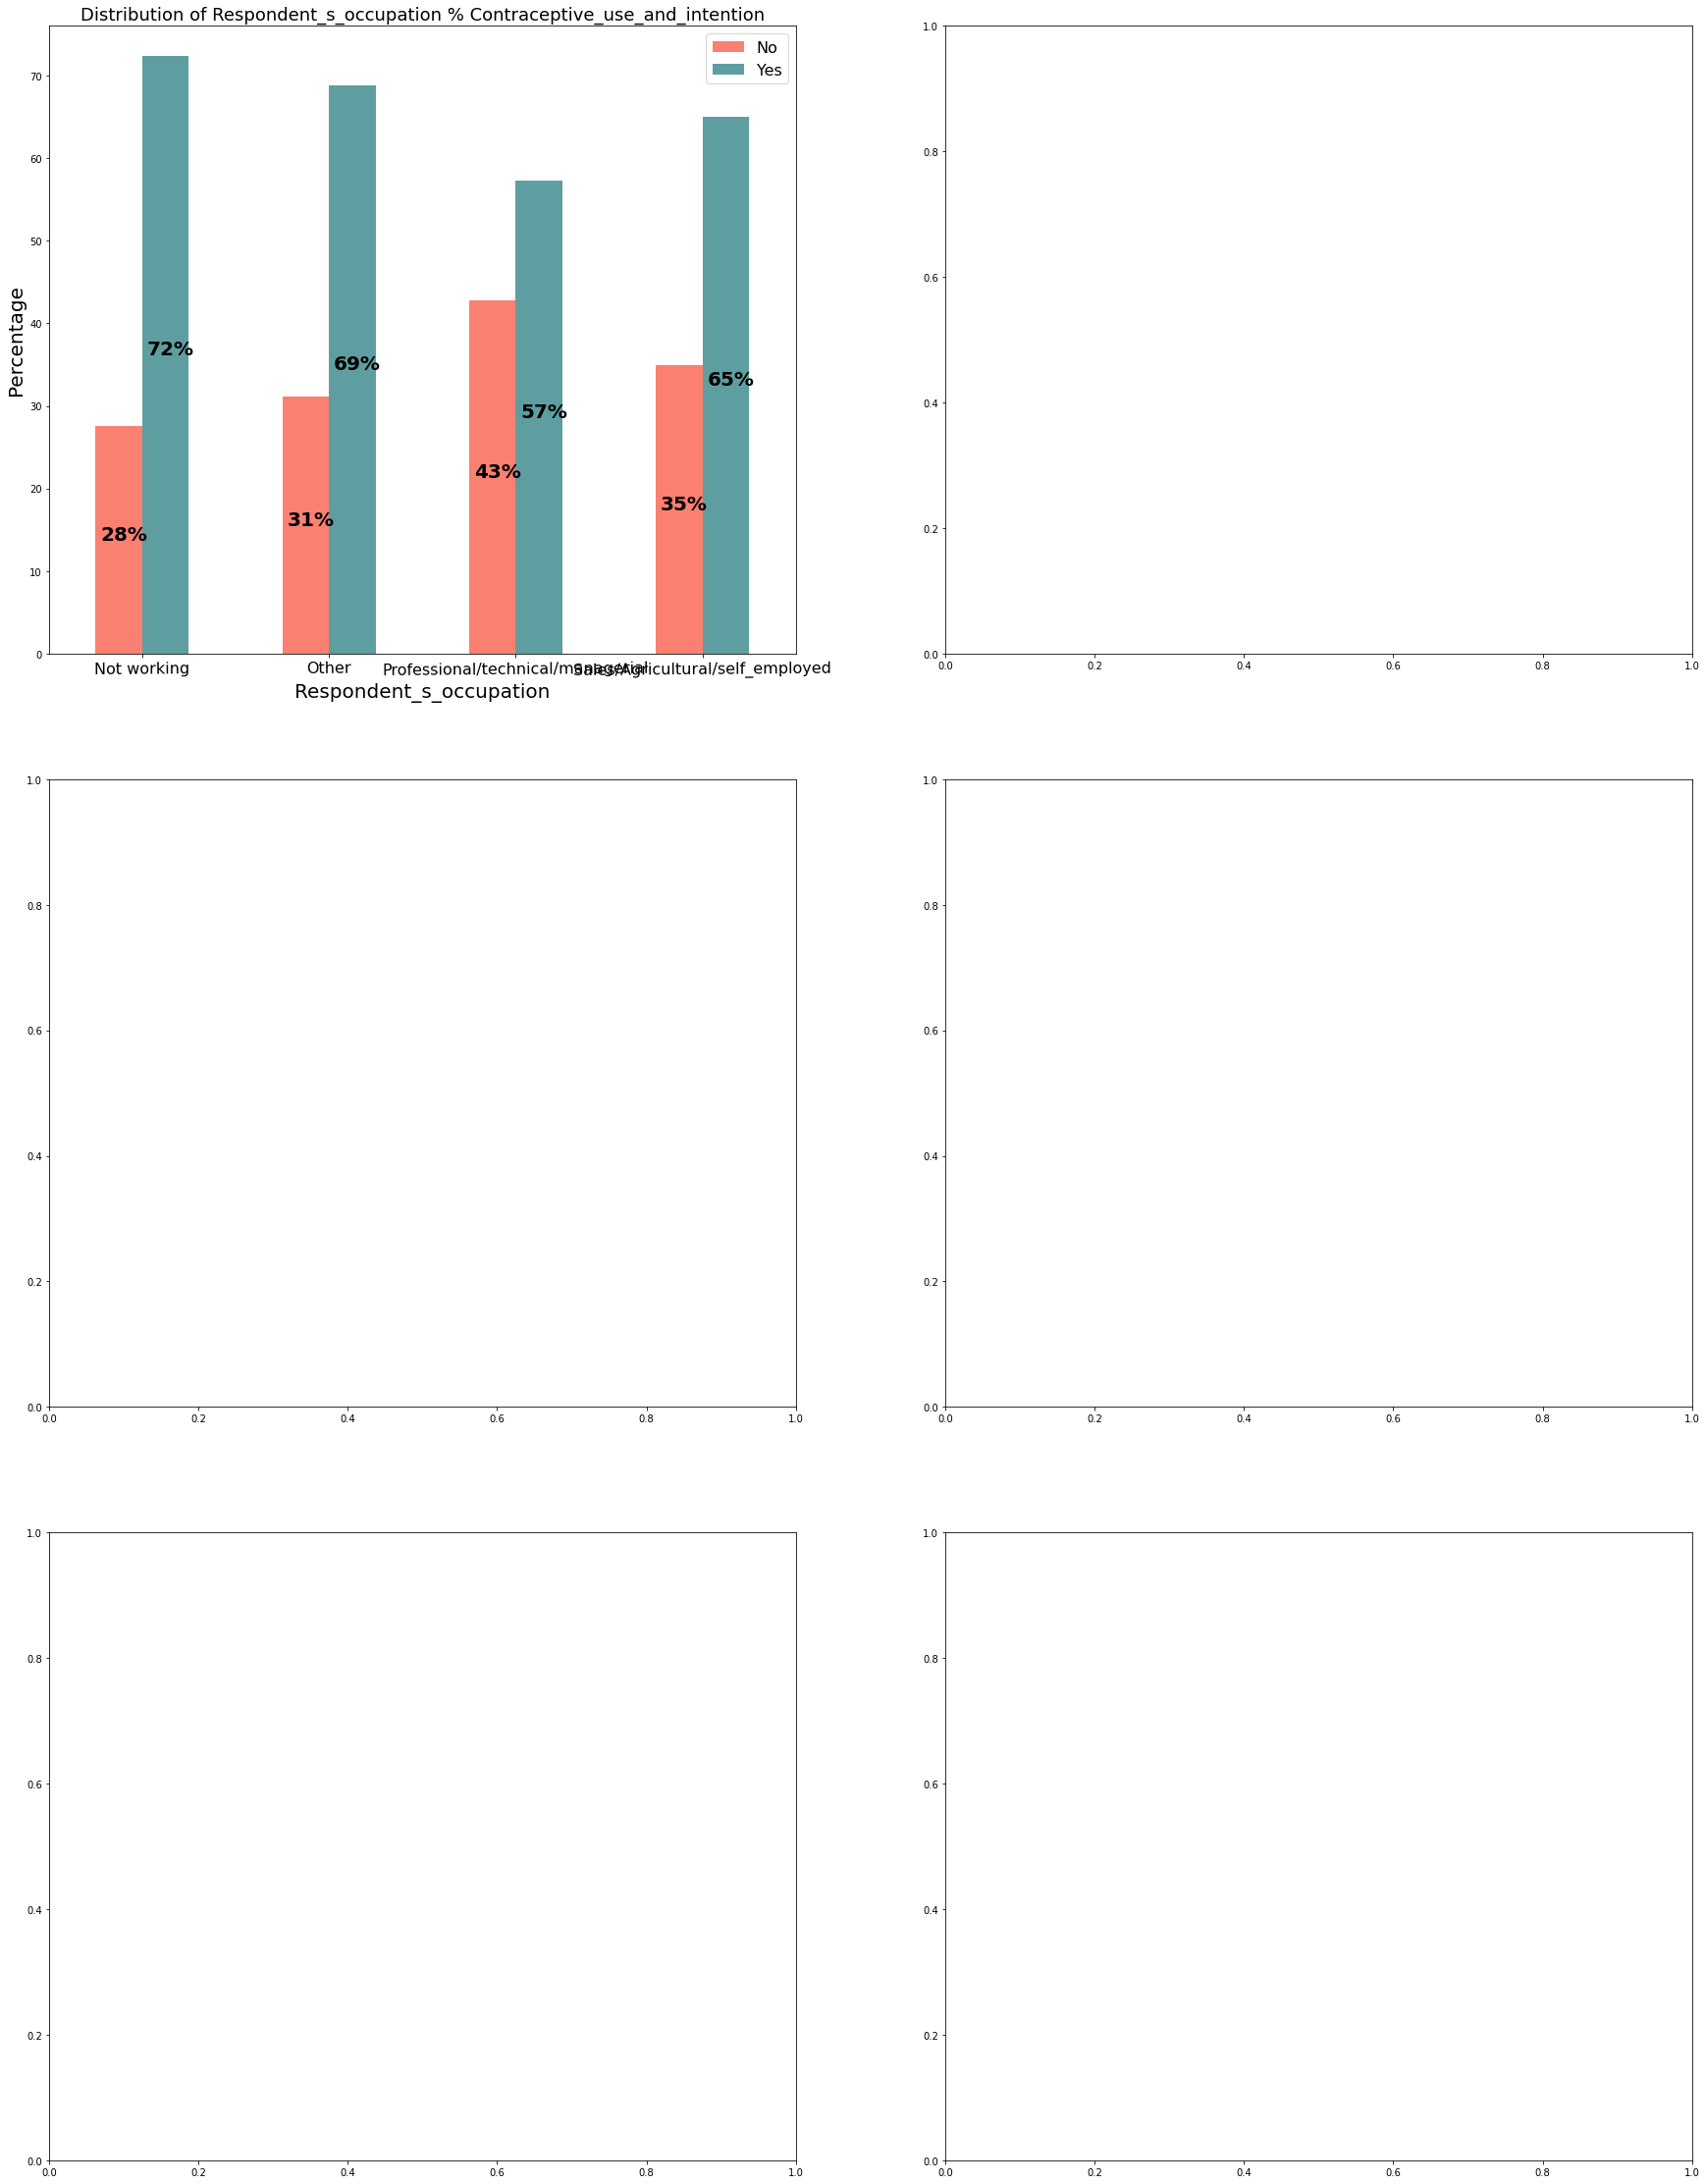

In [ ]:

colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (30,40))

for i,feature in enumerate(economic_factors):
    if i < 3:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 3 and i < 8:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-3,1])
    
    ax.set_title("Distribution of {} % Contraceptive_use_and_intention".format(feature), fontsize = 18)
    ax.set_ylabel("Percentage", fontsize=20)
    ax.set_xlabel("{}".format(feature), fontsize=20)
    ax.legend(["No", "Yes"], fontsize=16)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0.5, fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 5,ncols = 2,figsize = (30,40))

for i,feature in enumerate(sociodemographic):
    if i < 5:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 5 and i < 10:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-5,1])
    
    ax.set_title("Distribution of {} % Contraceptive_use_and_intention".format(feature), fontsize = 18)
    ax.set_ylabel("Percentage", fontsize=20)
    ax.set_xlabel("{}".format(feature), fontsize=20)
    ax.legend(["No", "Yes"], fontsize=16)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0.5, fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 4,ncols = 2,figsize = (30,40))

for i,feature in enumerate(reproductive_factors):
    if i < 4:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 4 and i < 8:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-4,1])
    
    ax.set_title("Distribution of {} % Contraceptive_use_and_intention".format(feature), fontsize = 18)
    ax.set_ylabel("Percentage", fontsize=20)
    ax.set_xlabel("{}".format(feature), fontsize=20)
    ax.legend(["No", "Yes"], fontsize=16)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0.5, fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 4,ncols = 2,figsize = (30,40))

for i,feature in enumerate(planning_factors):
    if i < 4:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 4 and i < 8:
        ax = unmet.groupby([feature,'Contraceptive_use_and_intention']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-4,1])
    
    ax.set_title("Distribution of {} % Contraceptive_use_and_intention".format(feature), fontsize = 18)
    ax.set_ylabel("Percentage", fontsize=20)
    ax.set_xlabel("{}".format(feature), fontsize=20)
    ax.legend(["No", "Yes"], fontsize=16)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0.5, fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# Descriptive Analysis of numeric variables
num_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]
num_cols

In [ ]:
#  Numerical Data
con = ['Respondent_s_current_age',
 'Age_of_respondent_at_1st_birth',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Husband_partner_s_age']

#  plot Numerical Data
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,22))

for i in con:
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'Total_children_ever_born', hue = 'Contraceptive_use_and_intention')
    c = c + 1

In [ ]:
#  Numerical Data
con = ['Number_of_trips_in_last_12_months',
 'Total_lifetime_number_of_sex_partners',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Births_in_last_five_years']

#  plot Numerical Data
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,22))

for i in con:
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1
    print()
    plt.subplot(a, b, c)
    #plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.scatterplot(data = df, x = i, y = 'Total_children_ever_born', hue = 'Contraceptive_use_and_intention')
    c = c + 1

In [ ]:
df.columns.tolist()

In [ ]:
selected_data=['Contraceptive_use_and_intention','Respondent_s_current_age',
 'Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Wealth_index_combined',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Unmet_need_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation',
 'Husband_partner_s_age',
 'Person_who_usually_decides_on_respondent_s_health_care',
 'Total_lifetime_number_of_sex_partners']

In [ ]:
data_selected=df[selected_data]

In [ ]:
# We create a function to generate Pivot table, Chi-square tests & Bivariate BarPlot

categorical_var = ""
  
def my_chisqure_test(data=data_selected,columns=None,significance_level=0.05,figsize=(5,5),heatmap=False):

  result1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values = "Contraceptive_use_and_intention",aggfunc="count",fill_value=0,margins = True)
  result2  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values = "Contraceptive_use_and_intention",aggfunc="count",fill_value=0)
  display(result1)
  
  

  stat, p, dof,s= chi2_contingency(result2) 
  print("p value: " + str(p)) 
  if p < significance_level: 
    print('We reject NULL HYPOTHESIS with a 95% confidence interval') 
    print(f"The two categorical variables are not independent—that is, {categorical_var} is not independent Whether the child is alive or not.")
  else: 
    print('We cannot reject NULL HYPOTHESIS with a 95% confidence interval') 
    print(f"The two categorical variables are independent—that is, {categorical_var} is independent Whether the child is alive or not.")

  # Force the aspect ratio of the blocks to be equal using "square" parameter


  
  plt.figure(figsize=figsize)
  if heatmap:
    ax = sns.heatmap(result1,cmap="YlGnBu", linewidths=.5,
    annot=True ,annot_kws={'size':14} ,fmt=".1f" , cbar=True ,square = True)
    plt.yticks(rotation=0)
  else:
    values = result1.iloc[:-1,:].sort_values(by =('Yes'),ascending=True)
    ax =values.sort_values(by =('Yes'),ascending=True)[[('Yes'),('No')]].plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
    ylab = ax.set_ylabel(f"{categorical_var}")
    xlab = ax.set_xlabel('Number chidren under five years old')
    title = ax.set_title(F"{categorical_var} according to whether the child is alive or not")

    index =0
    for Yes, No ,total in zip(values[('Yes')],values[('No')], values[('All')]):
      if Yes != total and  No != total  :
        ax.text(Yes/2 ,
                index,
                str(np.round((Dead/total)*1000,1)) + "‰",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
                )
        ax.text(No + Yes/2 ,
              index,
              str(np.round((Alive/total)*100,1)) + "‰",
              fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
            )
      elif No == total:
        ax.text(No/2 ,
            index,
            str(np.round((Alive/total)*100,1)) + "‰",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )
      else:
        ax.text(Yes/2 ,
            index,
            str(np.round((Dead/total)*100,1)) + "‰",
            fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )       
  
    
      index+=1
  plt.show()

In [ ]:
unmet['contraception']=unmet['Contraceptive_use_and_intention']

In [ ]:
binary_cols=[col for col in data_selected.columns if data_selected[col].nunique()==2]

In [ ]:
data_selected.columns.tolist()

In [ ]:
cat_cols

In [ ]:
cat=['Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Knowledge_of_ovulatory_cycle',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Unmet_need_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation',
 'Person_who_usually_decides_on_respondent_s_health_care']

In [ ]:
sat=['Respondent_s_current_age',
 'Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Wealth_index_combined',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Unmet_need_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation',
 'Husband_partner_s_age',
 'Person_who_usually_decides_on_respondent_s_health_care',
 'Total_lifetime_number_of_sex_partners']

In [ ]:
unmet.columns.tolist()

In [ ]:
casa=pd.get_dummies(unmet)

In [ ]:
casa.columns.tolist()

In [ ]:
benson=['Number_of_trips_in_last_12_months',
 'Total_children_ever_born',
 'More_than_once_unions',
 'Respondent_s_current_age_+32years',
 'Respondent_s_current_age_18-35',
 'Respondent_s_current_age_<20',
 'Region_Aire Metropolitaine',
 'Region_Artibonite',
 'Region_Centre',
 "Region_Grand'Anse",
 'Region_Nippes',
 'Region_Nord',
 'Region_Nord-Est',
 'Region_Nord-Ouest',
 'Region_Rest-Ouest',
 'Region_Sud',
 'Region_Sud-Est',
 'Type_of_place_of_residence_Rural',
 'Type_of_place_of_residence_Urban',
 'Highest_educational_level_Higher',
 'Highest_educational_level_No education',
 'Highest_educational_level_Primary',
 'Highest_educational_level_Secondary',
 'Religion_Catholic',
 'Religion_No religion',
 'Religion_Other',
 'Religion_Protestant',
 'Religion_Vaudousant',
 'Number_of_household_members_3-5',
 'Number_of_household_members_<3',
 'Number_of_household_members_>5',
 'Number_of_children_5_and_under_in_household_2-4',
 'Number_of_children_5_and_under_in_household_<2',
 'Number_of_children_5_and_under_in_household_>4',
 'Number_of_children_5_and_under_in_household_No_child',
 'Wealth_index_combined_Middle',
 'Wealth_index_combined_Poorer',
 'Wealth_index_combined_Poorest',
 'Wealth_index_combined_Richer',
 'Wealth_index_combined_Richest',
 'Births_in_last_five_years_2-4',
 'Births_in_last_five_years_<2',
 'Births_in_last_five_years_>4',
 'Births_in_last_five_years_No_child',
 'Age_of_respondent_at_1st_birth_20-25',
 'Age_of_respondent_at_1st_birth_<20',
 'Age_of_respondent_at_1st_birth_>5',
 'Knowledge_of_ovulatory_cycle_After period ended',
 'Knowledge_of_ovulatory_cycle_At any time',
 'Knowledge_of_ovulatory_cycle_Before period begins',
 "Knowledge_of_ovulatory_cycle_Don't know",
 'Knowledge_of_ovulatory_cycle_During her period',
 'Knowledge_of_ovulatory_cycle_Middle of the cycle',
 'Knowledge_of_ovulatory_cycle_Other',
 'Age_of_most_recent_child_<18',
 'Age_of_most_recent_child_>18',
 'Age_of_most_recent_child_No_child',
 'Heard_family_planning_on_radio_last_few_months_No',
 'Heard_family_planning_on_radio_last_few_months_Yes',
 'Heard_family_planning_on_TV_last_few_months_No',
 'Heard_family_planning_on_TV_last_few_months_Yes',
 'Visited_health_facility_last_12_months_Yes',
 'Contraception_is_woman_s_business_man_should_not_worry_Agree',
 'Contraception_is_woman_s_business_man_should_not_worry_Disagree',
 "Contraception_is_woman_s_business_man_should_not_worry_Don't know",
 'Women_who_use_contraception_become_promiscuous_Agree',
 'Women_who_use_contraception_become_promiscuous_Disagree',
 "Women_who_use_contraception_become_promiscuous_Don't know",
 'Covered_by_health_insurance_No',
 'Covered_by_health_insurance_Yes',
 'Age_at_first_cohabitation_+32years',
 'Age_at_first_cohabitation_18-35',
 'Age_at_first_cohabitation_<20',
 'Age_at_first_sex_+32years',
 'Age_at_first_sex_18-35',
 'Age_at_first_sex_<20',
 'Recent_sexual_activity_Active in last 4 weeks',
 'Recent_sexual_activity_Not active in last 4 weeks - not postpartum abstinence',
 'Recent_sexual_activity_Not active in last 4 weeks - postpartum abstinence',
 'Husband_s_desire_for_children_Both want same',
 "Husband_s_desire_for_children_Don't know",
 'Husband_s_desire_for_children_Husband wants fewer',
 'Husband_s_desire_for_children_Husband wants more',
 'Unmet_need_for_contraception_Limiting',
 'Unmet_need_for_contraception_No unmet need',
 'Unmet_need_for_contraception_Spacing',
 "Husband_partner_s_education_level_Don't know",
 'Husband_partner_s_education_level_Higher',
 'Husband_partner_s_education_level_No education',
 'Husband_partner_s_education_level_Primary',
 'Husband_partner_s_education_level_Secondary',
 'Husband_partner_s_occupation_Not working',
 'Husband_partner_s_occupation_Other',
 'Husband_partner_s_occupation_Professional/technical/managerial',
 'Husband_partner_s_occupation_Sales/Agricultural/self_employed',
 'Respondent_s_occupation_Not working',
 'Respondent_s_occupation_Other',
 'Respondent_s_occupation_Professional/technical/managerial',
 'Respondent_s_occupation_Sales/Agricultural/self_employed',
 'Husband_partner_s_age_+32years',
 'Husband_partner_s_age_18-35',
 'Husband_partner_s_age_<20',
 'Person_who_usually_decides_on_respondent_s_health_care_Husband/partner alone',
 'Person_who_usually_decides_on_respondent_s_health_care_Respondent alone',
 'Person_who_usually_decides_on_respondent_s_health_care_Respondent and husband/partner',
 'Total_lifetime_number_of_sex_partners_3-5',
 'Total_lifetime_number_of_sex_partners_<3',
 'Total_lifetime_number_of_sex_partners_>5']

In [ ]:
joel=['Respondent_s_current_age',
 'Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Number_of_trips_in_last_12_months',
 'Wealth_index_combined',
 'Births_in_last_five_years',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Total_children_ever_born',
 'Age_of_most_recent_child',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'More_than_once_unions',
 'Age_at_first_cohabitation',
 'Age_at_first_sex',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 'Unmet_need_for_contraception',
 'Husband_partner_s_education_level',
 'Husband_partner_s_occupation',
 'Respondent_s_occupation',
 'Husband_partner_s_age',
 'Person_who_usually_decides_on_respondent_s_health_care',
 'Total_lifetime_number_of_sex_partners']

In [ ]:
categorical_var = ""
  
def my_chisqure(data='data',columns=None,significance_level=0.05,heatmap=False):

  result1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values = 'Visited_health_facility_last_12_months_No',aggfunc="count",fill_value=0)/data_selected.shape[0]
  result2  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values = 'Visited_health_facility_last_12_months_No',aggfunc="count",fill_value=0,margins = True)/data_selected.shape[0]
  display(result2)
  
  

  stat, p, dof,s= chi2_contingency(result1) 
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('We reject NULL HYPOTHESIS') 
    print(f"The two categorical variables are not independent—that is, {categorical_var} is not independent Whether married woman intended to use MCM or not.")
  else: 
    print('We cannot reject NULL HYPOTHESIS') 
    print(f"The two categorical variables are independent—that is, {categorical_var} is independent Whether Whether married woman intended to use MCM or not.")

In [ ]:
for categorical_var in benson:
    my_chisqure(casa,columns=[f"{categorical_var}", 'Contraceptive_use_and_intention_Yes'],significance_level=0.05,heatmap=False)

In [ ]:
# creating mask
mask = np.triu(np.ones_like(df[num_cols].corr()))
 
# display size
plt.figure(figsize=(10,10))
  
# plotting a triangle correlation heatmap
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Reds', mask=mask)
# display title
plt.title('Correlation HeatMap')

**CORRELATION MATRIX**

## **ANALYSIS**

* **The correlation matrix shows that there is :**
    * **high correlation between 'Respondent_s_current_age' and 'Years_since_first_cohabitation' (r=0.82)**

    * **high correlation between 'Respondent_s_current_age' and 'Husband_partner_s_age' (r=0.74)**

    * **high correlation between 'Age_of_respondent_at_1st_birth' and 'Age_at_first_cohabitation' (r=0.74)**

    * **A correlation between 'Years_since_first_cohabitation' and 'Age_of_respondent_at_1st_birth' (r=0.67)**

* **These correlations means they could have an identical impact on target variable;**

    * **We can drop Years_since_first_cohabitation and Husband_partner_s_age, Age_at_first_cohabitation from dataset;**

##**ANALYZE**

In [ ]:
unmet=pd.get_dummies(unmet)
unmet.head()

In [ ]:
# drop Contraceptive_use_and_intention_No
unmetlist={'Contraceptive_use_and_intention_No', 'contraception_No', 'contraception_Yes'}

In [ ]:
unmet = unmet.drop(columns=unmetlist, axis=1)

In [ ]:
unmet.columns.tolist()

In [ ]:
marc=['Total_children_ever_born',
 'More_than_once_unions',
 'Type_of_place_of_residence',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Covered_by_health_insurance',
 'Contraceptive_use_and_intention']

In [ ]:
method=method[marc]

In [ ]:
cols = ['Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Knowledge_of_ovulatory_cycle',
 'Heard_family_planning_on_radio_last_few_months',
 'Heard_family_planning_on_TV_last_few_months',
 'Visited_health_facility_last_12_months',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Covered_by_health_insurance',
 'Recent_sexual_activity',
 'Husband_s_desire_for_children',
 "Husband_partner_s_education_level",
 'Husband_partner_s_occupation',
 'Husband_partner_s_age',
 'Age_at_first_sex',
 'Respondent_s_occupation',
 'Births_in_last_five_years',
 'Age_of_most_recent_child',
 'Age_at_first_cohabitation',
 'Person_who_usually_decides_on_respondent_s_health_care',
 'Contraceptive_use_and_intention']
#
# Encode labels of multiple columns at once
#
method[marc] = method[marc].apply(LabelEncoder().fit_transform)
#
# Print head
#
method.head()

##**BUILDING MODEL II**

##**SPLIT THE DATA**

##**Dealing with unbalanced data**

In [ ]:
# Encode labels of multiple columns at once
#
bootcamp = bootcamp.apply(LabelEncoder().fit_transform)
#
# Print head
#
bootcamp.head()

In [ ]:
X = bootcamp.drop('Contraceptive_use_and_intention', axis=1) # features
y = bootcamp['Contraceptive_use_and_intention'] # target

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X= sc.fit_transform(X)
#y = sc.transform(X)

In [ ]:
# Split data into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= seed)
#print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=50)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print('After OverSampling : the shape of X_train: {}'.format(X_train_smote.shape))
print('After OverSampling : the shape of y_train: {} \n'.format(y_train_smote.shape))
 
print("After OverSampling : counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling : counts of label '0': {}".format(sum(y_train_smote == 0)))

In [ ]:
seed=101
X_train_smote,X_test,y_train_smote,y_test = train_test_split(X,y,test_size =0.30, random_state=seed)

##**BUILDING MODEL I**

In [ ]:
# Let's a machine leraning model that fit the data
import time
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","NaiveBayes"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),BernoulliNB()]
for model in models:
  start = time.time()
  model.fit(X_train_smote,y_train_smote)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  #plot_roc_curve(model,X_test,y_test)

unmethod = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [ ]:
unmethod.sort_values(by='scores', ascending=False)

In [ ]:
for model,name in zip(models[:],model_names[:]):
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test,y_pred))

###**Comment on classifiers**

In [ ]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.25, random_state=101)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])



In [ ]:
bestmodel = find_best_model(X_train_smote, y_train_smote)
bestmodel.sort_values(by='score', ascending=False)

##**ALGORITHM OF SELECTION II**

##**Comment on Classifiers II**

##**ALGORITHM OF SELECTION III**

##**Comment on classifiers III**

##**ALGORITH OF SELECTION IV**

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=seed))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=seed))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=seed))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])

In [ ]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]

In [ ]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=3)

In [ ]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search]
for pipe in grids:
    pipe.fit(X_train_smote, y_train_smote)

In [ ]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))

##**comment on classifiers IV**

##**MODEL BUILDING**

####**LOGISTIC REGRESSION**

In [ ]:
# Create Decision Tree classifer object
clf = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# Train Decision Tree Classifer
clf = clf.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
clfy_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, clfy_pred))

In [ ]:
pd.DataFrame(np.concatenate([clf.intercept_.reshape(-1,1),
                             clf.coef_],axis=1),
             index = ["coef"],
             columns = ["constantes"]+list(X.columns)).T

Plis moun yo avanse an aj, mwens yo gen chans itilize contraception

Plis moun yo fè sex bonè, mwens yo gen chans itilize contraception

###**DECISION TREE CLASSIFIER**

In [ ]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_leaf=1, min_samples_split=2)

# Train Decision Tree Classifer
dt = dt.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

In [ ]:
feature_cols=['Respondent_s_current_age',
 'Age_at_first_cohabitation',
 'More_than_once_unions',
 'Age_at_first_sex',
 'Husband_partner_s_age']

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
#dot_data = StringIO()
#export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
   #special_characters=True,feature_names = feature_cols,class_names=['0','1'])

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('contraception_diabetes_Tree.png')
# Image(graph.create_png())

In [ ]:
def model_analysis(model='model', true_label='y_test',predicted='y_pred'): 
    '''
    return all metrics results
    '''
    print(f"accuracy :", round((metrics.accuracy_score(true_label, predicted)*100)),'%')
    print("f1 score macro :", round(metrics.f1_score(true_label, predicted, average='macro')*100),'%')    
    print("f1 score micro :", round(metrics.f1_score(true_label, predicted, average='micro')*100),'%')
    print("precision score :", round(metrics.precision_score(true_label, predicted, average='macro')*100),'%') 
    print("recall score :", round(metrics.recall_score(true_label, predicted, average='macro')*100),'%')
    print("hamming_loss :", round(metrics.hamming_loss(true_label, predicted)*100),'%')
    print("classification_report :\n")
    print(metrics.classification_report(true_label, predicted))
    print("jaccard_similarity_score :", round(metrics.jaccard_similarity_score(true_label, predicted)*100),'%')
    print("log_loss :", round(metrics.log_loss(true_label, predicted)))
    print("zero_one_loss :", round(metrics.zero_one_loss(true_label, predicted)*100),'%')
    print("AUC&ROC :", round(metrics.roc_auc_score(true_label, predicted)*100),'%')
    print("matthews_corrcoef :", round(metrics.matthews_corrcoef(true_label, predicted)*100),'%')
    print("confusion matrix")
    plot_confusion_matrix(model,X_test,y_test,cmap="YlGnBu")
    print("ROC and CURVE")
    plot_roc_curve(model,X_test,y_test)

In [ ]:
gbm = GradientBoostingClassifier()
# Train Decision Tree Classifer
gbm = gbm.fit(X_train_smote,y_train_smote)

#Predict the response for test dataset
y_pred_gbm = gbm.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gbm))

In [ ]:
model_analysis(gbm, y_test, y_pred_gbm)

In [ ]:
model_analysis(dt, y_test, y_pred_dt)

In [ ]:
DT=[70, 63, 52, 47, 70, 71, 98, 82, 56, 7, 12]

In [ ]:
model_analysis(clf, y_test, clfy_pred)

In [ ]:
df.columns

In [ ]:
# Creating a function for prediction
def predict_contraception(Respondent_s_current_age, Age_at_first_cohabitation, More_than_once_unions, Age_at_first_sex, Husband_partner_s_age):
    woman_age = int(Respondent_s_current_age)
    cohabitation = float(Age_at_first_cohabitation)
    unions = float(More_than_once_unions)
    sex = float(Age_at_first_sex)
    husband_age = float(Husband_partner_s_age)

    x = [[woman_age, cohabitation, unions, sex, husband_age]]
    x = sc.transform(x)

    # return clf.predict(x)

In [ ]:
LR=[70, 65, 52, 46, 72, 71, 98, 82, 60, 5, 10]

In [ ]:
# Input sequence:Respondent_s_current_age, Age_at_first_cohabitation, More_than_once_unions, Age_at_first_sex, Husband_partner_s_age 
prediction = predict_contraception(58, 23, 1, 23, 53)
if prediction:
  print('Great! You need a contraceptive method')
else:
  print("No! You don't need one")

##**SYNTHETIC TABLE**

In [ ]:
synthese = pd.DataFrame({'LR': LR,
                        'DT': DT,}, index=['accuracy', 'precision_score', 'recall_score','f1_macro', 'f1_micro', 'precision_0', 
                                        'recall_0', 'f1_score_0',
                                        'precision_1', 'recall_1', 
                                        'f1_score_1']).T

In [ ]:
synthese

##**CONCLUSION**

##**MODEL III**

##**DATA TRANSFORMATION**

In [ ]:
multi_col = [col for col in df.columns if df[col].nunique()>2]
multi_col

In [ ]:
df[multi_col].describe().T

In [ ]:
# creating mask
mask = np.triu(np.ones_like(df.corr()))
 
# display size
plt.figure(figsize=(10,10))
  
# plotting a triangle correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='Reds', mask=mask)
# display title
plt.title('Correlation HeatMap')

In [ ]:
# Find the average values
df.groupby('Contraceptive_use_and_intention_Yes').mean().T

**INTERPRETATION FOR SELECTION 2**

* **In this second selection amoung classifiers, we set classifers at default parameter**

* **We can see the best model is GradientBoostingClassifier with 80% accuracy**

##**LOGISTIC REGRESSION CLASSIFIER**

#**RANDOM FOREST CLASSIFIER MODEL**

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train_smote,y_train_smote)

rfc_y_pred=rfc.predict(X_test)
# model_analysis(rfc, y_test, rfc_y_pred)

In [ ]:
model_analysis(rfc, y_test, rfc_y_pred)

In [ ]:
df.columns

In [ ]:
feature_imp = pd.Series(rfc.feature_importances_,index=['Respondent_s_current_age', 'Age_at_first_cohabitation', 'More_than_once_unions', 'Age_at_first_sex', 'Husband_partner_s_age']).sort_values(ascending=False)
feature_imp

In [ ]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Key variable')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
X=df[['Respondent_s_current_age', 'Age_at_first_cohabitation','Husband_partner_s_age']]  # Removed feature "sepal length"
y=df['Contraceptive_use_and_intention_Yes']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=5) # 70% training and 30% test

In [ ]:
#Create a Gaussian Classifier
cl=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
cl.fit(X_train,y_train)

# prediction on test set
cly_pred=cl.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, cly_pred))

In [ ]:
model_analysis(cl, y_test, cly_pred)

#**DECISION TREE CLASSIFIER MODEL**

In [ ]:
# print report 
# model_analysis(y_test, gdb_y_pred)

In [ ]:
# print report 
# model_analysis(y_test, grid_dtc_y_pred)

##**SELECTION 0**

In [ ]:
# function to calculate cross-validated AUC
def validation(cv=None, scoring='scoring'):
  score = cross_val_score(clf, X_train_smote, y_train_smote, cv=cv, scoring=scoring).mean()
  return score

In [ ]:
validation(cv=5, scoring='precision')

In [ ]:
validation(cv=5, scoring='accuracy')

In [ ]:
validation(cv=5, scoring='recall')

In [ ]:
df.columns

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Yes', 'No', 'Yes', 'No'],
       ["18-31", "More-32", "18-31", "More-32"]],
  y = [82, 18, 62, 38],
  name = 'Yes',
))

fig.add_trace(go.Bar(
  x = [['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
       ["18-31", "More-32", "18-31", "More-32"]],
  y = [67, 33, 70, 38],
  name = 'No',
))

fig.update_layout(title_text="<b>Churn Distribution of unmet for contraception by husband ager</b>")

fig.show()

In [ ]:
labels = df['Contraceptive_use_and_intention_Yes'].unique()
values = df['Contraceptive_use_and_intention_Yes'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>intention to use contraception</b>")
fig.show()

In [ ]:
labels = df['More_than_once_unions'].unique()
values = df['More_than_once_unions'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>More_than_once_unions Distribution</b>")
fig.show()

* **Let's plot histogram for numeric variable**

#**CONCLUSION AND RECOMMANDATIONS**